<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Zomato Restaurant</b>
 </div>



---

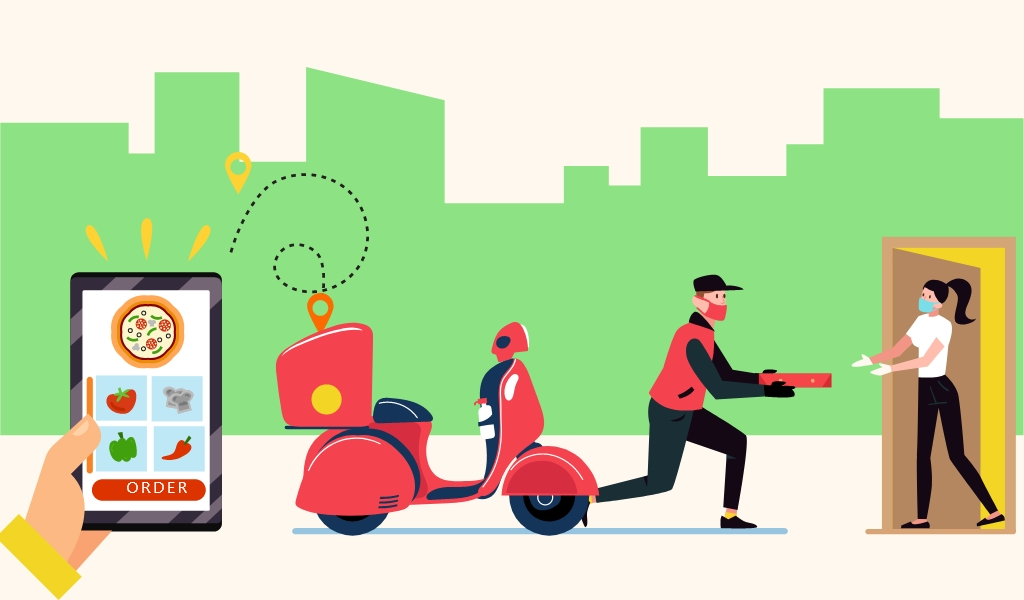

**Project Description**

* Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.

**Data Storage:**

This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:

**• Country code**
**• Country name**

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

**• Restaurant Id:** Unique id of every restaurant across various cities of the world

**• Restaurant Name:** Name of the restaurant

**• Country Code:** Country in which restaurant is located

**• City:** City in which restaurant is located

**• Address:** Address of the restaurant

**• Locality:** Location in the city

**• Locality Verbose:** Detailed description of the locality

**• Longitude:** Longitude coordinate of the restaurant&#39;s location

**• Latitude:** Latitude coordinate of the restaurant&#39;s location

**• Cuisines:** Cuisines offered by the restaurant

**• Average Cost for two:** Cost for two people in different currencies ��
**• Currency:** Currency of the country

**• Has Table booking:** yes/no

**• Has Online delivery:** yes/ no

**• Is delivering:** yes/ no

**• Switch to order menu:** yes/no

**• Price range:** range of price of food

**• Aggregate Rating:** Average rating out of 5

**• Rating color:** depending upon the average rating color

**• Rating text:** text on the basis of rating of rating

**• Votes:** Number of ratings casted by people

**Problem statement :** In this dataset predict 2 things –

**1) Average Cost for two**
**2) Price range**


**Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets**


**Dataset Link-**

•	https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx
•	https://github.com/dsrscientist/dataset4/blob/main/zomato.csv


<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Importing Libaries</b>
 </div>

In [217]:

# Data manipulation and analysis
import pandas as pd
import numpy as np
from collections import Counter

# Data visualization
import matplotlib.pyplot as plt
# Magic command to display plots in Jupyter Notebook
%matplotlib inline
import seaborn as sns

# Missing data visualization
import missingno as msno  # For visualizing missing data patterns

# Statistical functions
from scipy.stats import zscore  # For calculating z-scores
import scipy.stats as stats

# Data preprocessing
from sklearn.preprocessing import PowerTransformer, StandardScaler, LabelEncoder  # For data transformation and scaling

# Multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor  # For detecting multicollinearity

# Imbalanced data handling
from imblearn import under_sampling, over_sampling  # For handling imbalanced datasets
from imblearn.over_sampling import SMOTE  # For oversampling

# Regression Models
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,
    BaggingRegressor, ExtraTreesRegressor
)
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score
)

from sklearn.model_selection import (
    train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
)
# For classifiers
from sklearn.metrics import (
    roc_curve, auc, roc_auc_score, precision_recall_fscore_support,
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
) # For model evaluation metrics

# Machine learning models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier # Ensemble classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import warnings  # For handling warnings and suppressing them
warnings.filterwarnings('ignore')  # Suppressing warnings
# Model serialization
import joblib
import copy

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Fetching the Datasets</b>
 </div>

In [2]:
# First Dataset :country_code data associated country_name
pd.pandas.set_option('display.max_columns', None)
country_code_data = pd.read_excel("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Country-Code.xlsx")
country_code_data

Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States

In [3]:
# Second Dataset : Zomato data
Zomato_data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv", encoding='latin1')
Zomato_data

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karakí_y, ÛÁstanbul   28.977392   
9547                               Koôuyolu, ÛÁstanbul   29.041297   
9548                             Kuruí_eôme, ÛÁstanbul   29.034640   
9549                             Kuruí_eôme, ÛÁstanbul   29.036019   
9550                                    Moda, ÛÁstanbul   29.026016   

       Latitude                          Cuisines  Average Cost for two  \
0     14.565443        French, Japanese, Desserts                  1100   
1     14.553708                          Japanese                  1200   
2     14.581404  Seafood, Asian, Filipino, Indian                  4000   
3     14.585318                   Japanese, Sushi                  1500   
4     14.584450                  Japanese, Korean                  1500   
...         ...                               ...                   ...   
9546  41.022793                           Turkish                    80   
9547  41.009847   World Cuisine, Patisserie, Cafe                   105   
9548  41.055817            Italian, World Cuisine                   170   
9549  41.057979                   Restaurant Cafe                   120   
9550  40.984776      

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">
An In-Depth Examination of the Dataset</b>
 </div>

**Analyzing the dataframes leads me to the conclusion that:-**

**Zomato_data:**

**Restaurant ID:** Unique identifier for each restaurant.

**Restaurant Name:** Name of the restaurant.

**Country Code:** Common column for merging with country_code_data.

**City:** City in which the restaurant is located.

**Address:** Address of the restaurant.

**Locality:** Location in the city.

**Locality Verbose:** Detailed description of the locality.

**Longitude:** Longitude coordinate of the restaurant's location.

**Latitude:** Latitude coordinate of the restaurant's location.

**Cuisines:** Types of cuisines offered by the restaurant.

**Average Cost for two:** Cost for two people in the restaurant's currency.

**Currency:** Currency of the country where the restaurant is located.

**Has Table booking:** Whether the restaurant has table booking (yes/no).

**Has Online delivery:** Whether the restaurant offers online delivery (yes/no).

**Is delivering now:** Whether the restaurant is currently delivering (yes/no).

**Switch to order menu:** Option to switch to the order menu (yes/no).

**Price range:** Range of prices for food.

**Aggregate rating:** Average rating out of 5.

**Rating color:** Color code based on the average rating.

**Rating text:** Textual representation of the rating.

**Votes:** Number of ratings casted by people.

**country_code_data:**

**Country Code:** Common column for merging with Zomato_data.

**Country:** Name of the country corresponding to the country code.


**Based on these columns, the common column for merging is "Country Code," and it seems suitable for merging the two datasets as per the instructions.**

**Objective:-**

* The primary objectives of this analysis are to predict two key aspects:

* **Average Cost for Two:** Determine the average cost for two people at different restaurants, taking into account various currencies and countries.

**Obsrvation:** **Regression Problem: Predicting Average Cost for Two**

* Since the target variable is a continuous numerical value, regression models are suitables in such scenarios.The objective of this regression task is to predict the average cost for two people at restaurants based on various features. The "Average Cost for Two" is a continuous numerical variable, and our goal is to develop a model that accurately estimates this cost, considering the diverse features of each restaurant.

* **Price Range:** Predict the price range of food at different restaurants, providing an indication of the overall affordability.

**Obsrvation:** **Classification Problem: Predicting Restaurant Price Range**


* "Price Range" values (1, 2, 3, 4), it appears to be a multiclass classification problem. The goal of this classification task is to predict the price range of restaurants based on various features. The "Price Range" is a categorical variable with four classes (1, 2, 3, 4), indicating different levels of pricing for restaurants.




**To achieve these objectives, the project involves merging the two datasets using the pandas merge operation (pd.merge(df1, df2)) based on the common variable, Country Code. This merging process combines the information from both datasets, allowing for a comprehensive analysis that considers both the restaurant details and country-specific information**

* I  will perform a comprehensive analysis to validate our assumptions regarding both target variables.

**In this project phase, I am rigorously validating our assumptions about the target variables. Through a detailed analysis, including statistical measures and dataset validation, I ensure our chosen target variables align with the data characteristics for reliable predictive modeling. This validation is vital for building effective models.**

**Checking the country_code_date:-**

In [4]:
country_code_data.duplicated().sum()

0

In [5]:
country_code_data.dtypes

Country Code     int64
Country         object
dtype: object

In [6]:
country_code_data.isna().sum()

Country Code    0
Country         0
dtype: int64

**Checking the zomato_data:-**

In [7]:
Zomato_data.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

In [8]:
Zomato_data.tail()

Restaurant ID           Restaurant Name  Country Code       City  \
9546        5915730              NamlÛ± Gurme           208  ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208  ÛÁstanbul   
9548        5915807                     Huqqa           208  ÛÁstanbul   
9549        5916112              Aôôk Kahve           208  ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208  ÛÁstanbul   

                                                Address     Locality  \
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...     Karakí_y   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...    Koôuyolu   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...  Kuruí_eôme   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...  Kuruí_eôme   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...         Moda   

            Locality Verbose  Longitude   Latitude  \
9546     Karakí_y, ÛÁstanbul  28.977392  41.022793   
9547    Koôuyolu, ÛÁstanbul  29.041297  41.009847   
9548  Kuruí_eôme, ÛÁstanbul  29.034640  41.055817   
9549  Kuruí_eôme, ÛÁstanbul  29.036019  41.057979   
9550         Moda, ÛÁstanbul  29.026016  40.984776   

                             Cuisines  Average Cost for two          Currency  \
9546                          Turkish                    80  Turkish Lira(TL)   
9547  World Cuisine, Patisserie, Cafe                   105  Turkish Lira(TL)   
9548           Italian, World Cuisine                   170  Turkish Lira(TL)   
9549                  Restaurant Cafe                   120  Turkish Lira(TL)   
9550                             Cafe                    55  Turkish Lira(TL)   

     Has Table booking Has Online delivery Is delivering now  \
9546                No                  No                No   
9547                No                  No                No   
9548                No                  No                No   
9549                No                  No                No   
9550                No                  No                No   

     Switch to order menu  Price range  Aggregate rating Rating color  \
9546                   No            3               4.1        Green   
9547                   No            3               4.2        Green   
9548                   No            4               3.7       Yellow   
9549                   No            4               4.0        Green   
9550                   No            2               4.0        Green   

     Rating text  Votes  
9546   Very Good    788  
9547   Very Good   1034  
9548        Good    661  
9549   Very Good    901  
9550   Very Good    591

In [9]:
Zomato_data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [10]:
Zomato_data['Country Code'].value_counts()

1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

In [11]:
Zomato_data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

**Prior to combining the data, were preliminary searches conductedas follow:-**

* The common identifier linking Zomato_data and country_code_data is the "Country Code" column.

* Both Zomato_data and country_code_data maintain a consistent int64 datatype for the "Country Code" column.

* Notably, the Zomato_data dataframe exhibits an absence of null values except column 'Cuisines'.


<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Let's merge these dataframes:</b>
 </div>

In [12]:
# Merge dataframes on 'Country Code'
df = pd.merge(Zomato_data, country_code_data, how='left', on='Country Code')

In [13]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes      Country  
0   Excellent    314  Phillipines  
1   Excellent    591  Phillipines  
2   Very Good    270  Phillipines  
3   Excellent    365  Phillipines  
4   Excellent    229  Phillipines

In [14]:
df.tail()

Restaurant ID           Restaurant Name  Country Code       City  \
9546        5915730              NamlÛ± Gurme           208  ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208  ÛÁstanbul   
9548        5915807                     Huqqa           208  ÛÁstanbul   
9549        5916112              Aôôk Kahve           208  ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208  ÛÁstanbul   

                                                Address     Locality  \
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...     Karakí_y   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...    Koôuyolu   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...  Kuruí_eôme   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...  Kuruí_eôme   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...         Moda   

            Locality Verbose  Longitude   Latitude  \
9546     Karakí_y, ÛÁstanbul  28.977392  41.022793   
9547    Koôuyolu, ÛÁstanbul  29.041297  41.009847   
9548  Kuruí_eôme, ÛÁstanbul  29.034640  41.055817   
9549  Kuruí_eôme, ÛÁstanbul  29.036019  41.057979   
9550         Moda, ÛÁstanbul  29.026016  40.984776   

                             Cuisines  Average Cost for two          Currency  \
9546                          Turkish                    80  Turkish Lira(TL)   
9547  World Cuisine, Patisserie, Cafe                   105  Turkish Lira(TL)   
9548           Italian, World Cuisine                   170  Turkish Lira(TL)   
9549                  Restaurant Cafe                   120  Turkish Lira(TL)   
9550                             Cafe                    55  Turkish Lira(TL)   

     Has Table booking Has Online delivery Is delivering now  \
9546                No                  No                No   
9547                No                  No                No   
9548                No                  No                No   
9549                No                  No                No   
9550                No                  No                No   

     Switch to order menu  Price range  Aggregate rating Rating color  \
9546                   No            3               4.1        Green   
9547                   No            3               4.2        Green   
9548                   No            4               3.7       Yellow   
9549                   No            4               4.0        Green   
9550                   No            2               4.0        Green   

     Rating text  Votes Country  
9546   Very Good    788  Turkey  
9547   Very Good   1034  Turkey  
9548        Good    661  Turkey  
9549   Very Good    901  Turkey  
9550   Very Good    591  Turkey

In [15]:
df.sample()

Restaurant ID Restaurant Name  Country Code       City  \
7979       18384135       Keventers             1  New Delhi   

                                                Address  \
7979  Level 2, Food Capital, Worldmark 1, Hospitalit...   

                   Locality                  Locality Verbose  Longitude  \
7979  Worldmark 1, Aerocity  Worldmark 1, Aerocity, New Delhi  77.121795   

       Latitude   Cuisines  Average Cost for two            Currency  \
7979  28.550347  Beverages                   400  Indian Rupees(Rs.)   

     Has Table booking Has Online delivery Is delivering now  \
7979                No                  No                No   

     Switch to order menu  Price range  Aggregate rating Rating color  \
7979                   No            1               3.1       Orange   

     Rating text  Votes Country  
7979     Average      5   India

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Exploratory Data Analysis (EDA)</b>
 </div>

In [16]:
df.shape

(9551, 22)

In [17]:
print("The DataFrame has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

The DataFrame has 9551 rows and 22 columns.


In [18]:
df.columns.to_list()

['Restaurant ID',
 'Restaurant Name',
 'Country Code',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes',
 'Country']

In [19]:
column_groups = df.columns.to_series().groupby(df.dtypes).groups
column_counts = df.dtypes.value_counts()

for data_type, columns in column_groups.items():
    formatted_data_type = str(data_type).upper()
    print(f"\033[1mData Type:\033[0m {formatted_data_type}, \033[1mCount:\033[0m {column_counts[data_type]}")
    for col in columns:
        print(f"  - {col}")

Data Type: INT64, Count: 5
  - Restaurant ID
  - Country Code
  - Average Cost for two
  - Price range
  - Votes
Data Type: FLOAT64, Count: 3
  - Longitude
  - Latitude
  - Aggregate rating
Data Type: OBJECT, Count: 14
  - Restaurant Name
  - City
  - Address
  - Locality
  - Locality Verbose
  - Cuisines
  - Currency
  - Has Table booking
  - Has Online delivery
  - Is delivering now
  - Switch to order menu
  - Rating color
  - Rating text
  - Country


**Observations:**

> **INT64 Data Type:**
> **Columns:** Restaurant ID, Country Code, Average Cost for two, Price range, Votes.
> * These columns mainly consist of numerical identifiers and ratings.

> **FLOAT64 Data Type:**
> **Columns:** Longitude, Latitude, Aggregate rating.
> * These columns store numerical values, possibly representing geographic coordinates and restaurant ratings.

> **OBJECT Data Type:**
> **Columns:** Restaurant Name, City, Address, Locality, Locality Verbose, Cuisines, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Rating color, Rating text, Country.
> * These columns contain textual and categorical information about the restaurants, including names, addresses, and operational details.

> **Overall, the dataset exhibits a diverse range of data types, suggesting a mix of numerical and categorical features. The INT64 and FLOAT64 columns are likely to play a role in numerical analyses, while the OBJECT columns contain valuable categorical information for a comprehensive understanding of the dataset.**







**DataFrame Information Display**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**Observations:**

> **Data Types:**
> * The dataset contains a mix of data types, including float64, int64, and object.
> *The numerical columns include float64 (3 columns) and int64 (5 columns).
> *The object data type is prevalent, indicating categorical or textual information.

> **Null Values:**
> * "Cuisines" column has some missing values (non-null count is less than the total entries).

> **Numerical Columns:**
> * Columns like "Longitude," "Latitude," "Average Cost for two," "Price range," "Aggregate rating," and "Votes" are numerical in nature.

> **Categorical Columns:**
> * Various columns such as "Restaurant Name," "City," "Address," "Locality," "Locality Verbose," "Cuisines," "Currency," "Has Table booking," "Has Online delivery," "Is delivering now," "Switch to order menu," "Rating color," "Rating text," and "Country" are categorical or textual.

> **Non-Null Counts:**
> * Most columns have non-null counts equal to the total entries (9551), indicating a lack of missing values in those columns.
Memory Usage:

> **The dataset consumes approximately 1.7 MB of memory, suggesting a relatively lightweight dataset for analysis.
In summary, the dataset appears well-structured with a diverse range of data types. The presence of a few missing values in the "Cuisines" column should be addressed during preprocessing. The dataset's memory usage is reasonable, making it suitable for analysis without significant memory constraints.**

### Let's examine the dataset's statistical information:

In [21]:
# For numerical columns exclusively
df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

**Observations:**

> **Restaurant ID:**
> * Shape: The distribution of Restaurant ID appears uniform, indicating a wide range of unique identifiers.
> * Skewness: No significant skewness is observed, suggesting a balanced distribution.
> * Spread of Data: The data is spread across the entire range of IDs without any apparent concentration.
> * Outliers: No apparent outliers are detected.

> **Country Code:**
> * Shape: The distribution of Country Code is diverse, reflecting the presence of restaurants from various countries.
> * Skewness: Slight positive skewness may indicate a higher concentration of restaurants from certain countries.
> * Spread of Data: The data is spread across multiple countries, with varying frequencies.
> * Outliers: No outliers are evident.

> **Geographic Coordinates (Longitude and Latitude):**
> * Shape: The distribution of Longitude and Latitude suggests a wide geographic coverage.
> * Skewness: Skewness may be observed due to the concentration of restaurants in specific regions.
> * Spread of Data: The data covers a broad geographical span.
> * Outliers: Outliers may be present, especially at extreme values.

> **Average Cost for Two:**
> * Shape: The distribution of Average Cost for Two is right-skewed, indicating a concentration of lower values.
> * Skewness: Positive skewness suggests a higher frequency of lower cost values.
> * Spread of Data: The spread is wide, with a notable concentration at lower cost values.
> * Outliers: Presence of outliers, especially at higher cost values.>

> **Price Range:**
> * Shape: The distribution of Price Range is left-skewed, with a higher concentration towards lower values.
> * Skewness: Negative skewness indicates a prevalence of lower price range values.
> * Spread of Data: Most restaurants fall into lower price ranges (1 or 2).
> * Outliers: Potential outliers may exist at higher price range values.

> **Aggregate Rating:**
> * Shape: The distribution of Aggregate Rating appears roughly symmetric.
> * Skewness: Minimal skewness is observed, suggesting a balanced distribution.
> * Spread of Data: Ratings are spread across the range with a moderate concentration around the mean.
> * Outliers: Outliers may be present, especially at extreme rating values.

> **Votes:**
> * Shape: The distribution of Votes is highly right-skewed, indicating a concentration of lower vote counts.
> * Skewness: Strong positive skewness suggests a higher frequency of lower vote counts.
> * Spread of Data: The spread is wide, with a concentration at lower vote counts.
> * Outliers: Presence of outliers, especially at higher vote counts.

In [22]:
# For the categorical columns exclusively
df.describe(include=['object'])

Restaurant Name       City                     Address  \
count              9551       9551                        9551   
unique             7446        141                        8918   
top     Cafe Coffee Day  New Delhi  Dilli Haat, INA, New Delhi   
freq                 83       5473                          11   

               Locality            Locality Verbose      Cuisines  \
count              9551                        9551          9542   
unique             1208                        1265          1825   
top     Connaught Place  Connaught Place, New Delhi  North Indian   
freq                122                         122           936   

                  Currency Has Table booking Has Online delivery  \
count                 9551              9551                9551   
unique                  12                 2                   2   
top     Indian Rupees(Rs.)                No                  No   
freq                  8652              8393                7100   

       Is delivering now Switch to order menu Rating color Rating text Country  
count               9551                 9551         9551        9551    9551  
unique                 2                    1            6           6      15  
top                   No                   No       Orange     Average   India  
freq                9517                 9551         3737        3737    8652

**Observations:**

> **Restaurant Name:**
> * Count: There are 9551 unique restaurants.
> * Unique: Out of these, 7446 have distinct names.
> * Top: The most frequent restaurant name is "Cafe Coffee Day," occurring 83 times.
> * Frequency: Multiple restaurant names have varying frequencies.

> **City:**
> * Count: There are 9551 entries in the "City" column.
> * Unique: 141 unique cities are represented.
> * Top: The most frequent city is "New Delhi," appearing 5473 times.
> * Frequency: Certain cities have high occurrences.

> **Address:**
> * Count: There are 9551 unique addresses.
> * Unique: 8918 addresses are distinct.
> * Top: The top address is "Dilli Haat, INA, New Delhi," occurring 11 times.
> * Frequency: Some addresses have repeated occurrences.

> **Locality:**
> * Count: 9551 entries in the "Locality" column.
> * Unique: 1208 unique localities are represented.
> * Top: "Connaught Place" is the most frequent locality, appearing 122 times.
> * Frequency: Certain localities have high occurrences.

> **Locality Verbose:**
> * Count: 9551 unique entries.
> * Unique: 1265 entries are distinct.
> * Top: "Connaught Place, New Delhi" is the most frequent, occurring 122 times.
> * Frequency: Some entries have repeated occurrences.

> **Cuisines:**
> * Count: 9542 entries in the "Cuisines" column.
> * Unique: There are 1825 distinct cuisines.
> * Top: "North Indian" is the most frequent cuisine, appearing 936 times.
> * Frequency: Certain cuisines are prevalent.

> **Currency:**
> * Count: 9551 entries.
> * Unique: 12 different currencies are represented.
> * Top: "Indian Rupees(Rs.)" is the most frequent currency, occurring 8652 times.
> * Frequency: A dominant currency is observed.

> **Has Table Booking:**
> * Count: 9551 entries.
> * Unique: 2 unique values, "Yes" and "No."
> * Top: "No" is the most frequent, appearing 8393 times.
> * Frequency: A high frequency of "No" indicates fewer table bookings.

> **Has Online Delivery:**
> * Count: 9551 entries.
> * Unique: 2 unique values, "Yes" and "No."
> * Top: "No" is the most frequent, occurring 7100 times.
> * Frequency: A high frequency of "No" suggests less availability of online delivery.

> **Is Delivering Now:**
> * Count: 9551 entries.
> * Unique: 2 unique values, "Yes" and "No."
> * Top: "No" is the most frequent, occurring 9517 times.
> * Frequency: A high frequency of "No" indicates a lack of current delivery.

> **Switch to Order Menu:**
> * Count: 9551 entries.
> * Unique: 1 unique value, "No."
> * Top: "No" is the only value present.
> * Frequency: All entries are "No," suggesting a consistent pattern.

> **Rating Color:**
> * Count: 9551 entries.
> * Unique: 6 unique colors.
> * Top: "Orange" is the most frequent, occurring 3737 times.
> * Frequency: Certain rating colors dominate.

> **Rating Text:**
> * Count: 9551 entries.
> * Unique: 6 unique rating texts.
> * Top: "Average" is the most frequent, occurring 3737 times.
> * Frequency: Certain rating texts are prevalent.

> **Country:**
> * Count: 9551 entries.
> * Unique: 15 unique countries.
> * Top: "India" is the most frequent, appearing 8652 times.
> * Frequency: Dominance of "India" as the country of occurrence.

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Checking Duplicate & Null Values</b>
 </div>

In [23]:
df.duplicated().sum()

0

In [24]:
df.isin(['NaN', 'Nan', 'nan', 'NA', ' ', '_', '0']).any().sum()

0

In [25]:
# Checking the Null Values
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

### Let's address the missing value in column : 'Cuisines'

In [26]:
# Fill with most frequent value: is typically used for categorical (discrete) data, such as strings or categories.
df["Cuisines"] = df["Cuisines"].fillna(df["Cuisines"].mode()[0])
print(df["Cuisines"].mode())

0    North Indian
Name: Cuisines, dtype: object


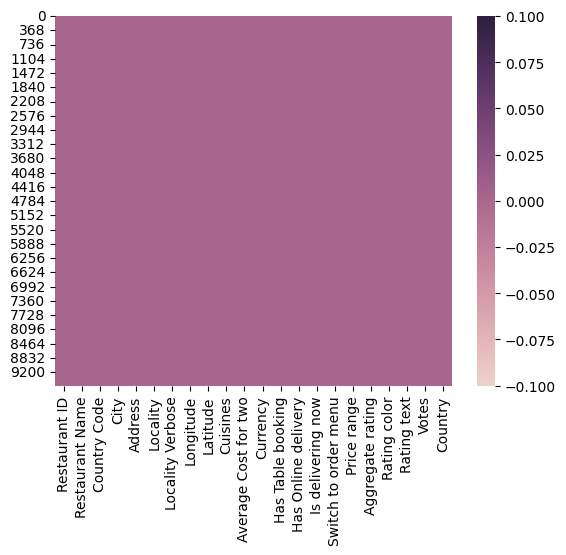

In [27]:
sns.heatmap(df.isnull(), cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

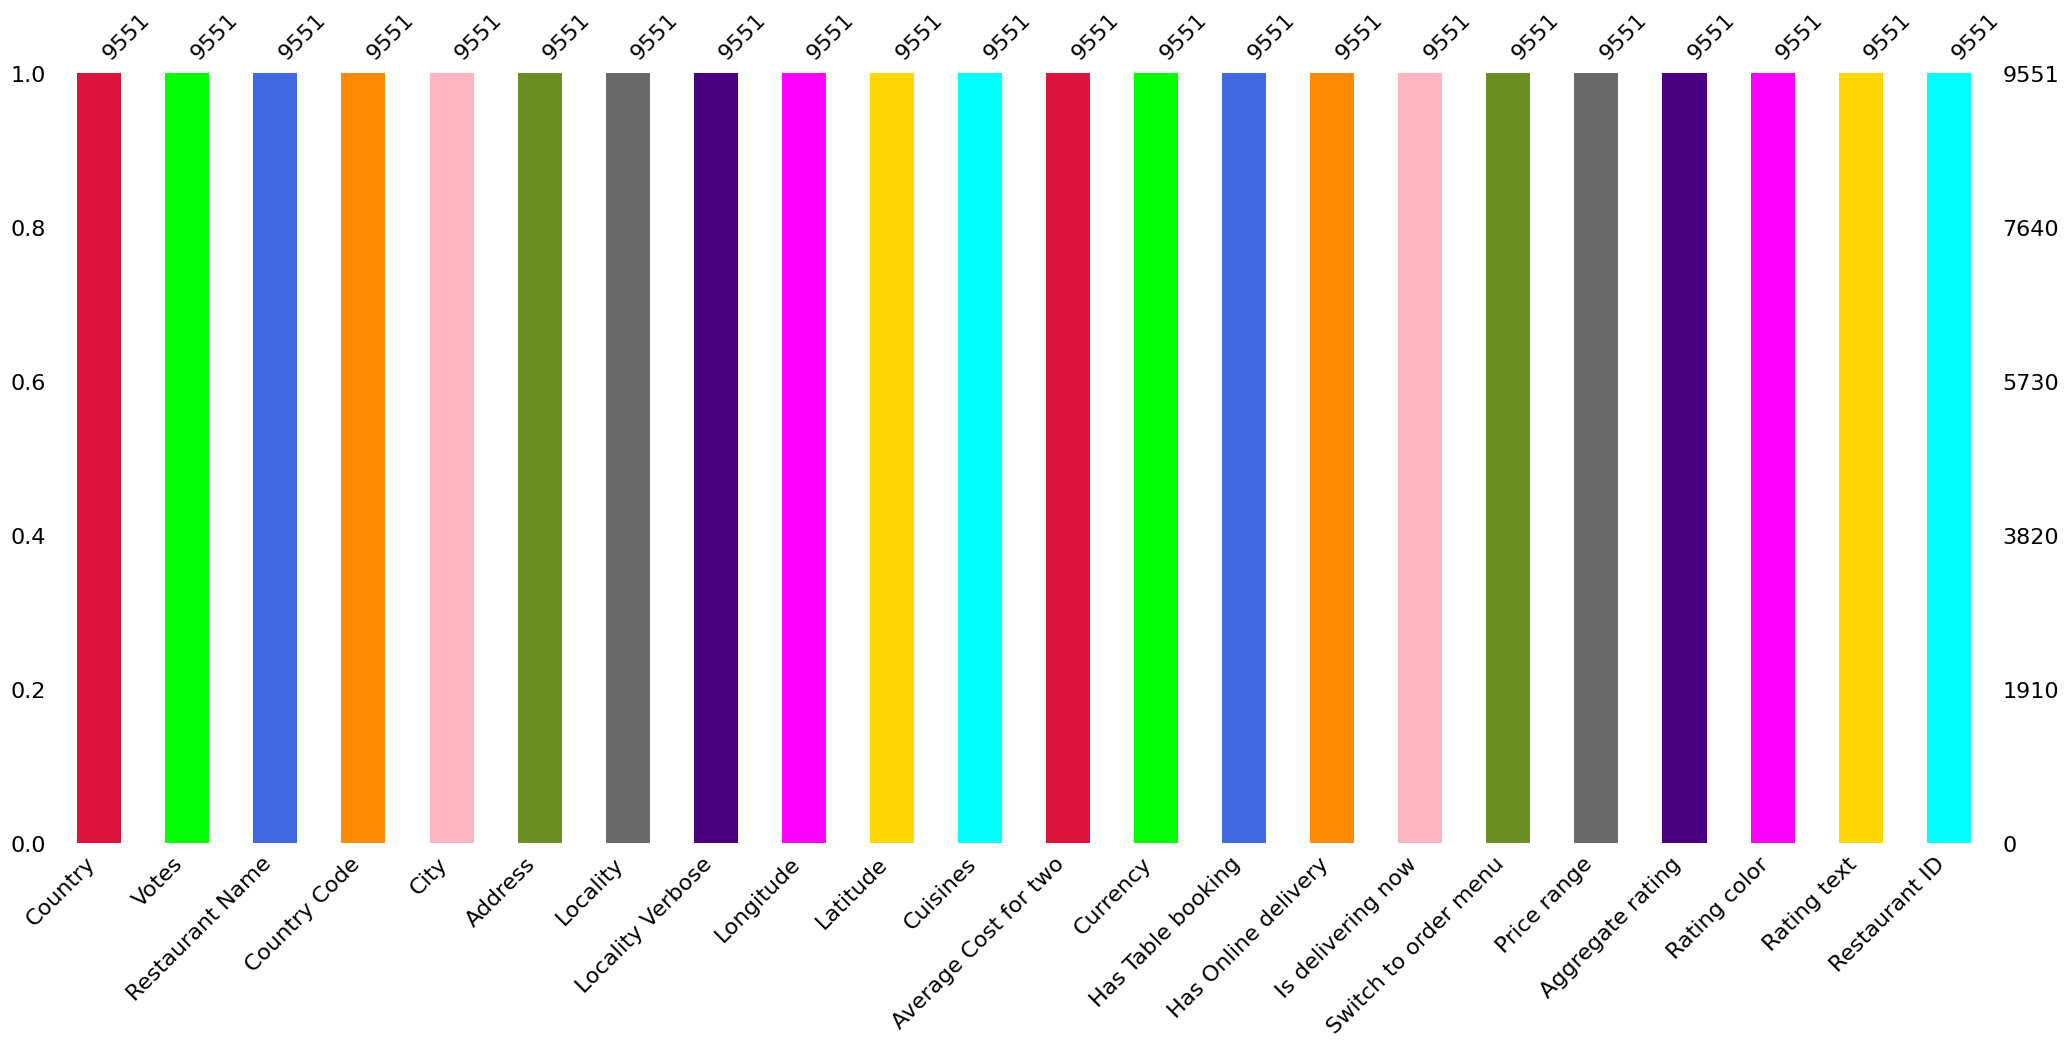

In [28]:
figsize=(10,8)
msno.bar(df, color=['crimson', 'lime', 'royalblue', 'darkorange', 'lightpink', 'olivedrab', 'dimgray', 'indigo', 'magenta', 'gold', 'aqua'], sort='descending')
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**Observations:**

> **Non-Null Counts:**

> * All columns have complete non-null counts (9551 entries), indicating that missing values have been successfully handled.

> **Data Types:**

**The DataFrame encompasses three data types:**

> * float64 (3 columns): Longitude, Latitude, and Aggregate rating.

> * int64 (5 columns): Restaurant ID, Country Code, Average Cost for two, Price range, and Votes.

> * object (14 columns): Restaurant Name, City, Address, Locality, Locality Verbose, Cuisines, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Rating color, Rating text, and Country.

> **Memory Usage:**
> * The DataFrame memory usage remains reasonable (1.7+ MB), reflecting efficient handling of missing values.
Column Characteristics:

> **Numerical Columns (int64 and float64):**
> * Restaurant ID, Country Code, Average Cost for two, Price range, and Votes are numerical columns.
Longitude, Latitude, and Aggregate rating are float64 columns representing geographic coordinates and ratings.

> **Categorical Columns (object):**
> * Restaurant Name, City, Address, Locality, Locality Verbose, Cuisines, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Rating color, Rating text, and Country are categorical or textual columns.

**let's explore the value counts for each column**

In [30]:
# Checking Unique values of all the columns in our dataframe
for col in df.columns.values:
    print("Number of unique values of  \033[1m{} : {}\033[0m ".format(col,df[col].nunique()))

Number of unique values of  Restaurant ID : 9551 
Number of unique values of  Restaurant Name : 7446 
Number of unique values of  Country Code : 15 
Number of unique values of  City : 141 
Number of unique values of  Address : 8918 
Number of unique values of  Locality : 1208 
Number of unique values of  Locality Verbose : 1265 
Number of unique values of  Longitude : 8120 
Number of unique values of  Latitude : 8677 
Number of unique values of  Cuisines : 1825 
Number of unique values of  Average Cost for two : 140 
Number of unique values of  Currency : 12 
Number of unique values of  Has Table booking : 2 
Number of unique values of  Has Online delivery : 2 
Number of unique values of  Is delivering now : 2 
Number of unique values of  Switch to order menu : 1 
Number of unique values of  Price range : 4 
Number of unique values of  Aggregate rating : 33 
Number of unique values of  Rating color : 6 
Number of unique values of  Rating text : 6 
Number of unique values of  Votes : 10

**Observations:**

> **'Restaurant ID':**
* All values are unique, indicating each restaurant has a distinct ID.

> **'Restaurant Name':**
* The dataset includes 7446 unique restaurant names.
Cafe Coffee Day appears most frequently (83 times).

> **'Country Code':**
* Most restaurants (8652) are in Country Code 1 (presumably India).
* Other country codes have varying counts, with the United States having 434 restaurants.

> **'City':**
* New Delhi has the highest representation with 5473 restaurants.
* There are a total of 141 unique cities in the dataset.

> **'Address':**
* Dilli Haat, INA, New Delhi, has the highest occurrence (11 times) among addresses.

> **'Locality':**
* Connaught Place is the most common locality, appearing 122 times.
* There are 1208 unique localities in the dataset.

> **'Locality Verbose':**
* Connaught Place, New Delhi, is the most common verbose locality (122 occurrences).
* There are 1265 unique verbose localities.

> **'Longitude' and 'Latitude':**
* Some restaurants have a longitude and latitude of 0.000000, possibly indicating missing or inaccurate location data.
* There are 8120 unique longitude values and 8677 unique latitude values.

> **'Cuisines':**
* The dataset includes 1825 unique cuisine types.
* North Indian is the most common cuisine (945 occurrences).

> **'Average Cost for two':**
* The average cost for two people varies, with values ranging from 0 to 8000.
* The most common values are 500, 300, 400, and 200.

> **'Currency':**
* Indian Rupees (Rs.) is the dominant currency (8652 occurrences).
* Other currencies have varying counts.
'Has Table booking', 'Has Online delivery', 'Is
> **delivering now', 'Switch to order menu':**
* These columns mostly have binary values ('Yes' or 'No').
* 'Switch to order menu' is consistently 'No' for all restaurants.

> **'Price range':**
* The majority of restaurants have a price range of 1 (4444 occurrences).
* Other price ranges (2, 3, 4) have varying counts.

> **'Aggregate rating', 'Rating color', 'Rating text':**
* The aggregate rating has a range from 0.0 to 4.9, with various occurrences.
* 'Rating color' and 'Rating text' provide a qualitative representation of the ratings.

> **'Votes':**
* The number of votes varies, with some restaurants having 0 votes.
* The highest number of votes is 10934.

> **'Country':**
* India has the highest representation with 8652 restaurants.
* Other countries have varying counts, with the United States having 434 restaurants.

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Assessing dataset's categorical and numerical columns</b>
 </div>

In [31]:
# Checking for categorical columns
categorical_cols = [i for i in df.dtypes.index if df.dtypes[i] == "object"]
print("\033[1mLength of Categorical Columns:\033[0m",len(categorical_cols),"\033[1mCategorical Columns:\033[0m", categorical_cols)
print("\n")

# Checking for numerical columns
numerical_cols = [i for i in df.dtypes.index if df.dtypes[i] != "object"]
print("\033[1mLength of Numercal Columns:\033[0m",len(numerical_cols), "\033[1mNumerical Columns:\033[0m ", numerical_cols)

Length of Categorical Columns: 14 Categorical Columns: ['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text', 'Country']


Length of Numercal Columns: 8 Numerical Columns:  ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Data Visualization</b>
 </div>

**Univariant Analysis:-**

In [32]:
df['Restaurant ID'].value_counts()

6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64

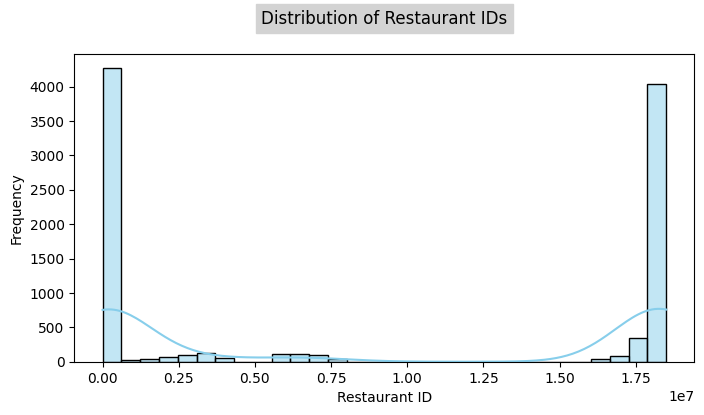

In [33]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Restaurant ID'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Restaurant IDs', backgroundcolor='Lightgray', y=1.07)
plt.xlabel('Restaurant ID')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

* The 'Restaurant ID' column appears to have unique values for each row, as indicated by the value counts. Each ID appears only once in the dataset.

* This suggests that each row corresponds to a distinct restaurant, and there are no duplicate restaurant IDs in the dataset.

* The total number of unique 'Restaurant ID' values is 9551, which is consistent with the length of the DataFrame.

* If 'Restaurant ID' is used as an identifier for each restaurant and does not carry any meaningful information for predicting the target variable, it might not be a valuable feature for modeling. In such cases, it can be considered more as an index or identifier rather than a feature with predictive power.

**Hence, I plan to exclude it in subsequent steps.**

In [34]:
df['Country Code'].value_counts()

1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

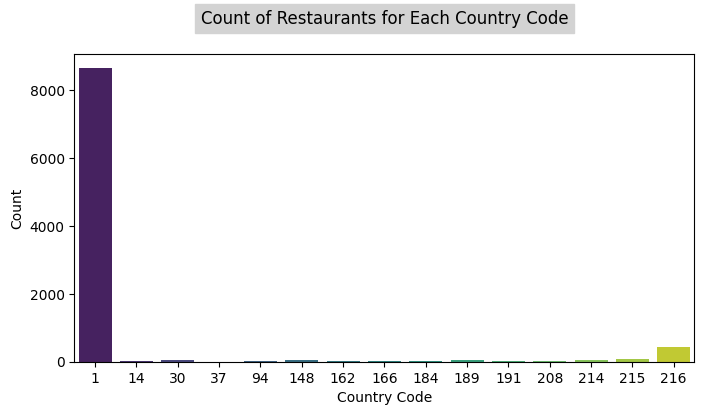

In [35]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Country Code', data=df, palette='viridis')
plt.title('Count of Restaurants for Each Country Code', backgroundcolor='Lightgray', y=1.07)
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.grid(False)
plt.show()

* The 'Country Code' column exhibits varying counts for different countries.

* The most frequently occurring country has a code of 1, appearing 8652 times in the dataset. Other countries have less representation, with codes such as 216 occurring 434 times, 215 appearing 80 times, and so on.

* The distribution of country codes suggests a substantial concentration in a particular country (code 1), while other countries have fewer occurrences.

In [36]:
df['Longitude'].value_counts()

0.000000     498
77.353663     19
77.230412     12
77.088688     10
77.251426      9
            ... 
77.227294      1
77.225420      1
77.230347      1
77.230578      1
29.026016      1
Name: Longitude, Length: 8120, dtype: int64

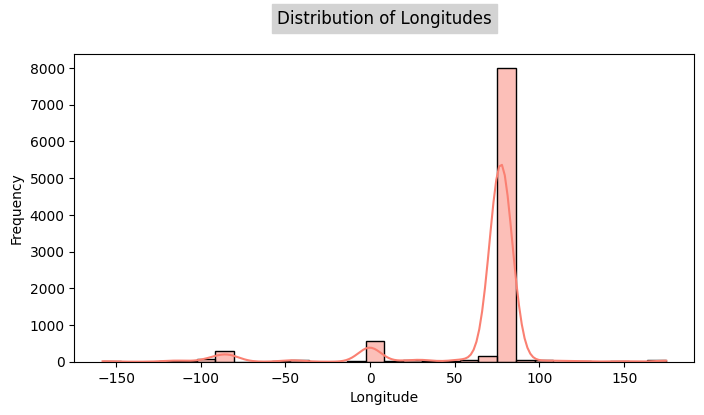

In [37]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Longitude'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Longitudes', backgroundcolor='Lightgray', y=1.07)
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

* The negative skewness indicates that the distribution of longitude values is skewed to the left, with a longer left tail.

* It suggests that there are more extreme lower values (toward the western longitudes) than higher values (toward the eastern longitudes).

* The 'Longitude' column in the dataset has a variety of values. The most frequent longitude is 0.000000, which occurs 498 times. Additionally, there are other unique longitude values, such as 77.353663 (appearing 19 times), 77.230412 (appearing 12 times), 77.088688 (appearing 10 times), and 77.251426 (appearing 9 times). The dataset contains a total of 8120 unique longitude values, indicating a diverse set of geographic locations represented in the 'Longitude' column.

In [38]:
df['Latitude'].value_counts()

0.000000     498
28.574309     16
28.551456      9
28.574300      9
28.597103      8
            ... 
28.645175      1
28.646194      1
28.648280      1
28.643514      1
40.984776      1
Name: Latitude, Length: 8677, dtype: int64

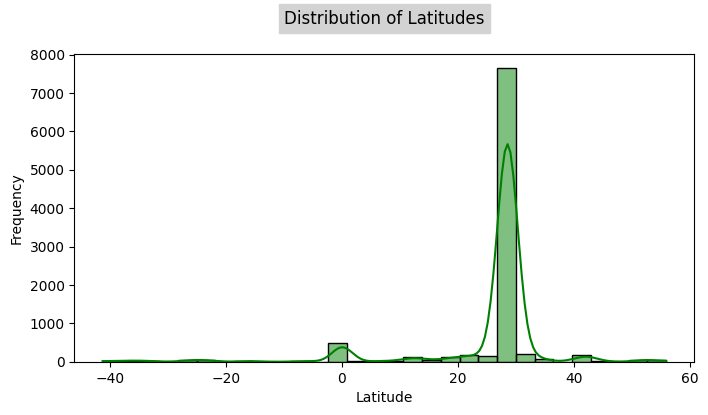

In [39]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Latitude'], bins=30, kde=True, color='green')
plt.title('Distribution of Latitudes', backgroundcolor='Lightgray', y=1.07)
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

* The negative skewness indicates that the distribution of latitude values is skewed to the left, with a longer left tail.

* It suggests that there are more extreme lower values (toward the southern latitudes) than higher values (toward the northern latitudes).

* The 'Latitude' column in the dataset has a variety of values. The most frequent latitude is 0.000000, which occurs 498 times. Additionally, there are other unique latitude values, such as 28.574309 (appearing 16 times), 28.551456 (appearing 9 times), 28.574300 (appearing 9 times), and 28.597103 (appearing 8 times). The dataset contains a total of 8677 unique latitude values, indicating a diverse set of geographic locations represented in the 'Latitude' column.

In [40]:
df['Average Cost for two'].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: Average Cost for two, Length: 140, dtype: int64

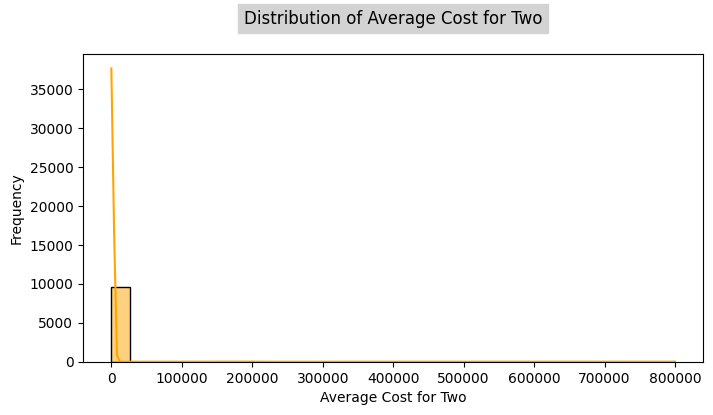

In [41]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Average Cost for two'], bins=30, kde=True, color='orange')
plt.title('Distribution of Average Cost for Two', backgroundcolor='Lightgray', y=1.07)
plt.xlabel('Average Cost for Two')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

* The highly positive skewness value indicates that the distribution of the 'Average Cost for two' values is heavily skewed to the right, with an extended right tail.

* This suggests that there are more extreme higher values (potentially outliers or very high costs) than lower values.

* The 'Average Cost for two' column in the dataset has a diverse range of values. The most frequent average cost is 500, occurring 900 times. Additionally, there are other common cost values such as 300 (897 occurrences), 400 (857 occurrences), 200 (687 occurrences), and 600 (652 occurrences). The dataset contains a total of 140 unique average cost values, indicating a wide variation in the cost of dining for two people. Notably, there are also higher cost values such as 8000, 2350, 150,000, 70,000, and 545, highlighting the presence of outliers or restaurants with significantly higher average costs.

In [42]:
df['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

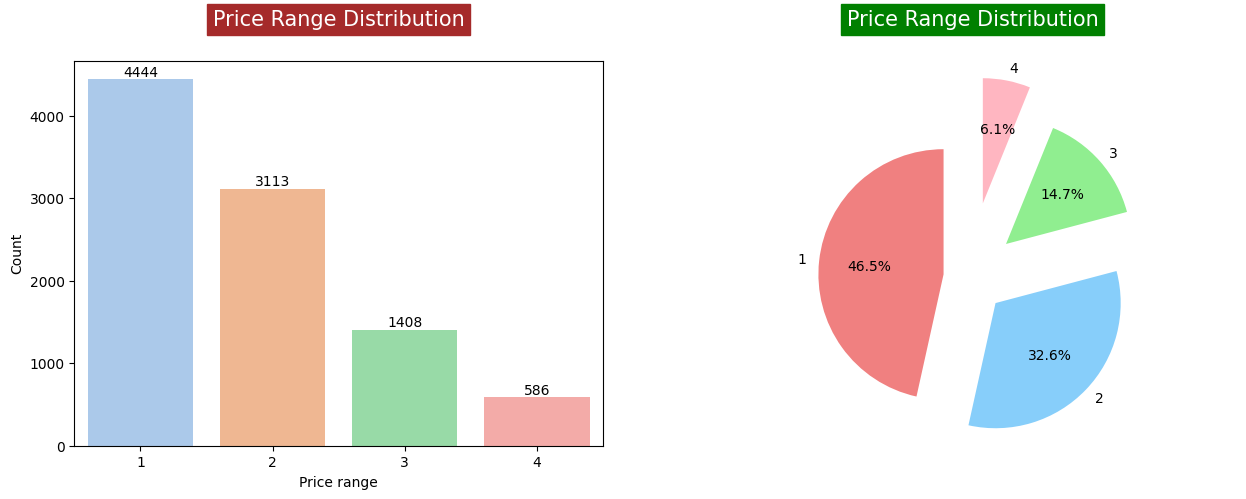

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x="Price range", data=df, palette='pastel', ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)

ax1.set(xlabel="Price range", ylabel="Count")
ax1.set_title("Price Range Distribution", fontsize=15, backgroundcolor='brown', color='white', y=1.07)

price_range_counts = df["Price range"].value_counts()
colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightpink']
explode = [0.2, 0.3, 0.4, 0.6]
ax2.pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax2.axis('equal')

ax2.set_title("Price Range Distribution", fontsize=15, backgroundcolor='green', color='white', y=1.07)

plt.show()

* The 'Price range' column in the dataset has a distribution of values. The most frequent price range is labeled as 1 and occurs 4444 times. Additionally, there are other price ranges, such as 2 (occurring 3113 times), 3 (occurring 1408 times), and 4 (occurring 586 times).

* This distribution provides insights into the prevalence of different price categories among the restaurants in the dataset, with a majority falling into the lower-priced categories (1 and 2) and fewer in the higher-priced categories (3 and 4).

In [44]:
df['Aggregate rating'].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

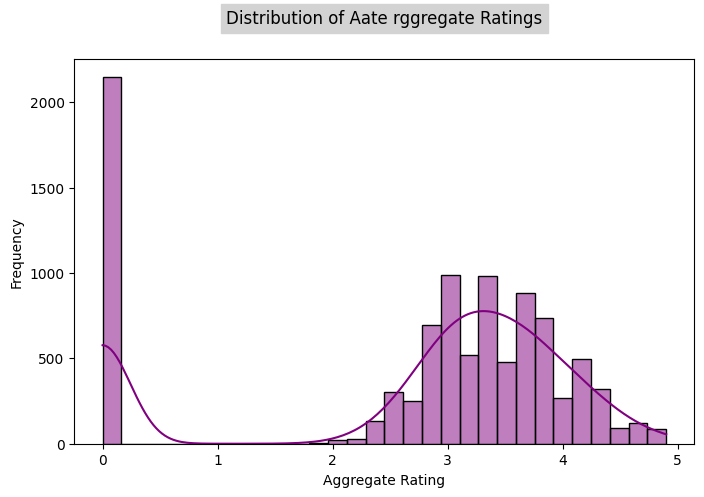

In [45]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=30, kde=True, color='purple')
plt.title('Distribution of Aate rggregate Ratings', backgroundcolor='Lightgray', y=1.07)
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

* The 'Aggregate rating' column in the dataset has a distribution of values.

* The most frequently occurring aggregate rating is 0.0, appearing 2148 times. Additionally, there are various other rating values, such as 3.2 (522 occurrences), 3.1 (519 occurrences), 3.4 (498 occurrences), 3.3 (483 occurrences), and so on.

* The distribution reflects the diversity of aggregate ratings for the restaurants, ranging from 0.0 to higher values. The data suggests that there are a substantial number of restaurants with lower ratings, with a tapering count as ratings increase, and fewer restaurants with higher ratings.

In [46]:
df['Votes'].value_counts()

0      1094
1       483
2       327
3       244
4       207
       ... 
615       1
538       1
823       1
650       1
901       1
Name: Votes, Length: 1012, dtype: int64

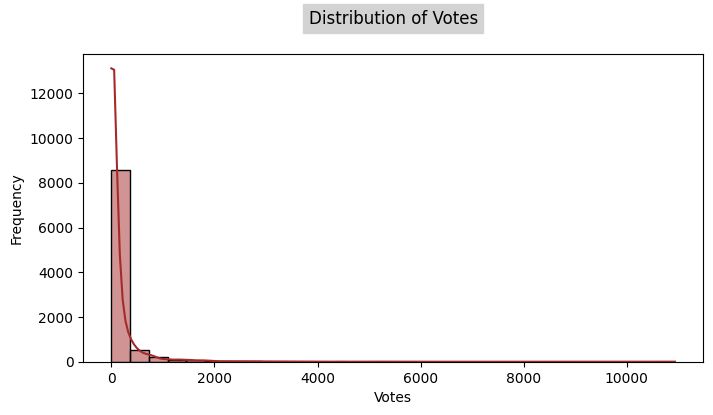

In [47]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Votes'], bins=30, kde=True, color='brown')
plt.title('Distribution of Votes', backgroundcolor='Lightgray', y=1.07)
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

* The highly positive skewness value indicates that the distribution of 'Votes' values is heavily skewed to the right, with an extended right tail.

* This suggests that there are more extreme higher values (potentially outliers or restaurants with a significantly higher number of votes) than lower values.

* The 'Votes' column in the dataset exhibits a diverse range of values. The most frequent number of votes is 0, occurring 1094 times.

*  Additionally, there are other counts of votes, such as 1 (483 occurrences), 2 (327 occurrences), 3 (244 occurrences), and 4 (207 occurrences).

* The dataset contains a total of 1012 unique vote counts, indicating a wide variation in the number of votes received by restaurants.

* It's notable that the distribution is right-skewed, with a higher concentration of lower vote counts and fewer occurrences of higher vote counts.

Univariant Analysis for categorical column:-

In [48]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

Restaurant Name
['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A\x81ô\x81ôk Kahve' "Walter's Coffee Roastery"]
--------------------------------------------------
City
['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Brasí_lia'
 'Rio de Janeiro' 'Sí£o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Miller' 'Monroe' 'Montville'
 'Ojo Caliente' 'Orlando' 'Palm Cove' 'Paynesville' 'Penola' 'Pensacola'
 'Phillip Island' 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii'
 'Savannah' 'Singapore' 'Sio

In [49]:
df['Restaurant Name'].value_counts()

Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64

<Figure size 800x400 with 0 Axes>

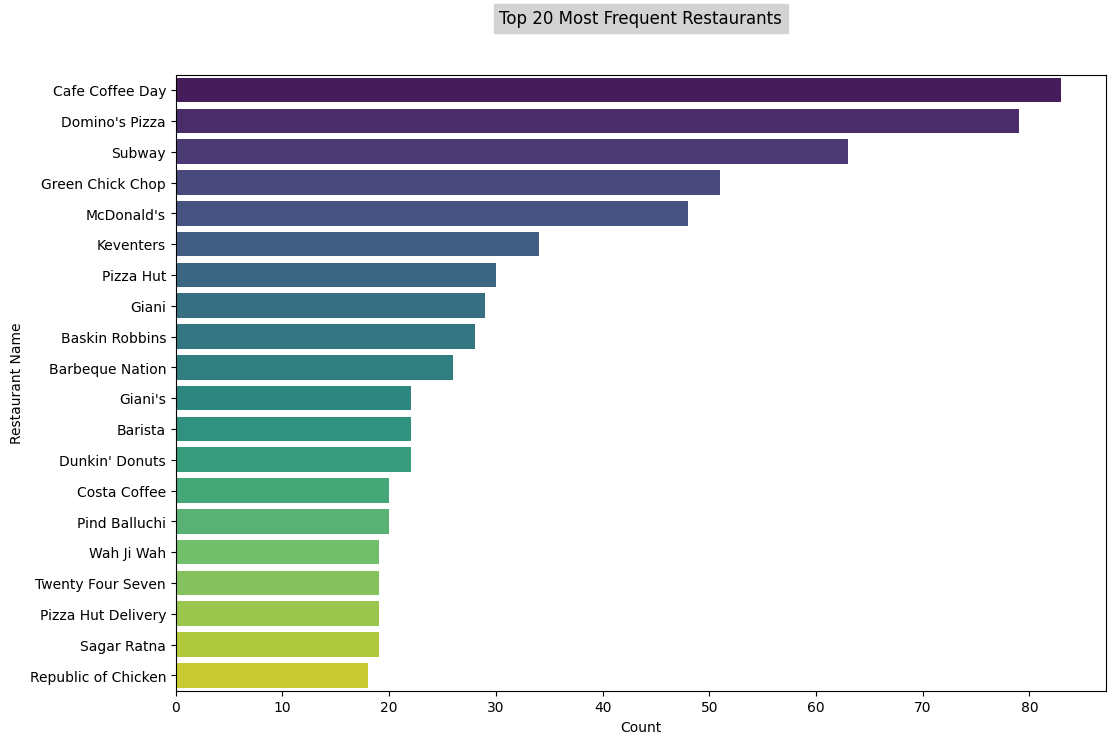

In [50]:
plt.figure(figsize=(8, 4))
# Set the font to a commonly available font
plt.rcParams['font.family'] = 'DejaVu Sans'

# Get the top N most frequent 'Restaurant Name' values
top_restaurants = df['Restaurant Name'].value_counts().nlargest(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette='viridis')


plt.xlabel('Count')
plt.ylabel('Restaurant Name')
plt.title('Top 20 Most Frequent Restaurants', backgroundcolor='Lightgray', y=1.07)

# Show the plot
plt.show()

* The 'Restaurant Name' column in the dataset has a diverse set of restaurant names.

* The most frequently occurring restaurant name is "Cafe Coffee Day," which appears 83 times. Similarly, other popular restaurant names include "Domino's Pizza" (79 occurrences), "Subway" (63 occurrences), "Green Chick Chop" (51 occurrences), and "McDonald's" (48 occurrences).

* The dataset encompasses a total of 7446 unique restaurant names, indicating a rich variety of establishments. The distribution reflects varying levels of popularity among different restaurant names, with some being more prevalent than others.

In [51]:
df['City'].value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

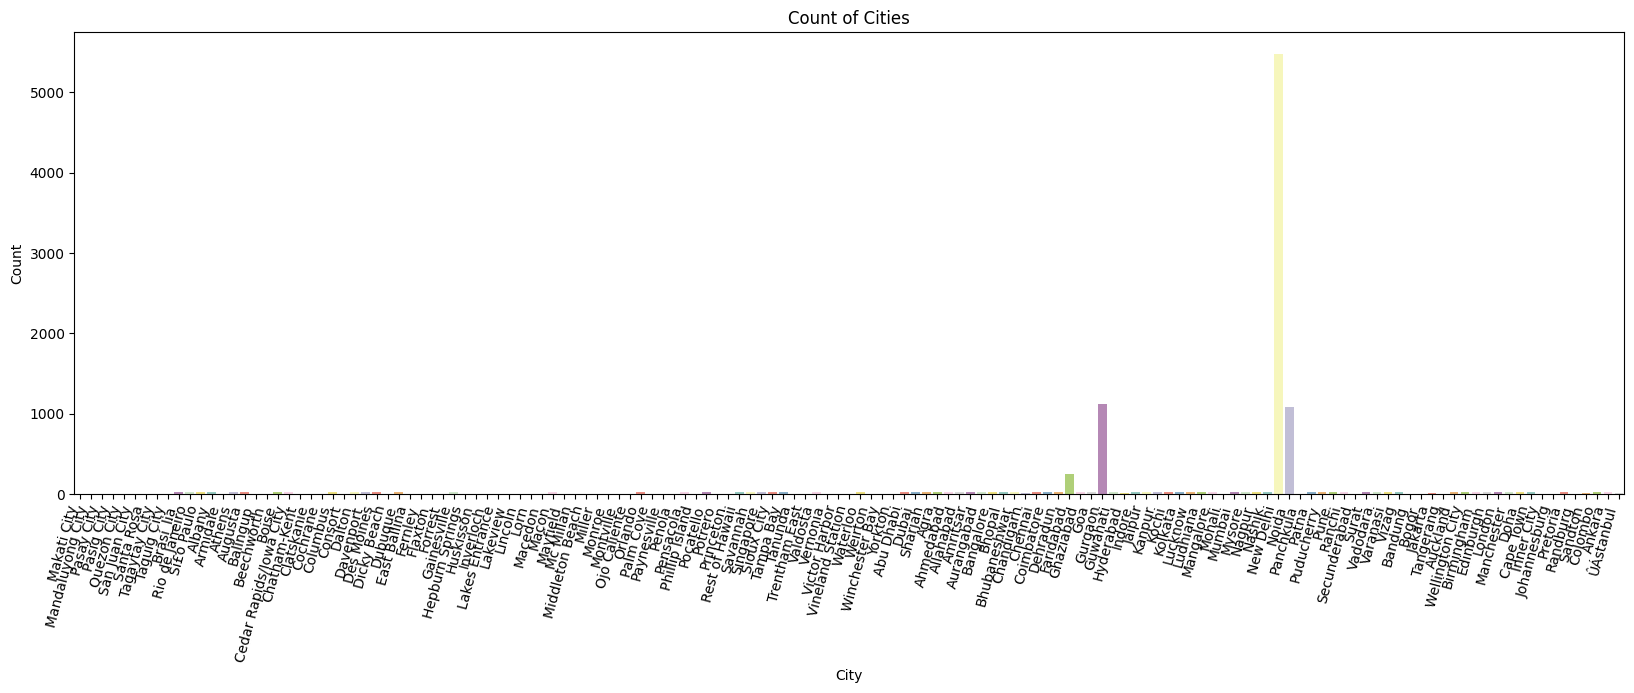

In [52]:
plt.figure(figsize=(20, 6))
sns.countplot(x='City', data=df, palette='Set3')
plt.title('Count of Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=75, ha='right')
plt.show()

* The 'City' column in the dataset exhibits a distribution of restaurant locations.

* The most frequently occurring city is "New Delhi," with 5473 restaurants located there. Additionally, there are other cities with varying counts, such as "Gurgaon" (1118 restaurants), "Noida" (1080 restaurants), "Faridabad" (251 restaurants), and "Ghaziabad" (25 restaurants).

* The dataset comprises a total of 141 unique cities, indicating a diverse representation of restaurant locations.

* The distribution provides insights into the concentration of restaurants in different cities, with New Delhi having the highest number and others having varying levels of restaurant presence.

In [53]:
df['Address'].value_counts()

Dilli Haat, INA, New Delhi                                                               11
Sector 41, Noida                                                                         11
Greater Kailash (GK) 1, New Delhi                                                        10
The Imperial, Janpath, New Delhi                                                          9
Cyber Hub, DLF Cyber City, Gurgaon                                                        8
                                                                                         ..
23-24, Defence Colony Market, Defence Colony, New Delhi                                   1
28, Main Market, Defence Colony, New Delhi                                                1
Daryaganj, New Delhi                                                                      1
Ground Floor, E-23, Netaji Subhash Marg, Opposite Golcha Cinema, Daryaganj, New Delhi     1
CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B, KadÛ±kí_y, ÛÁstanbul             

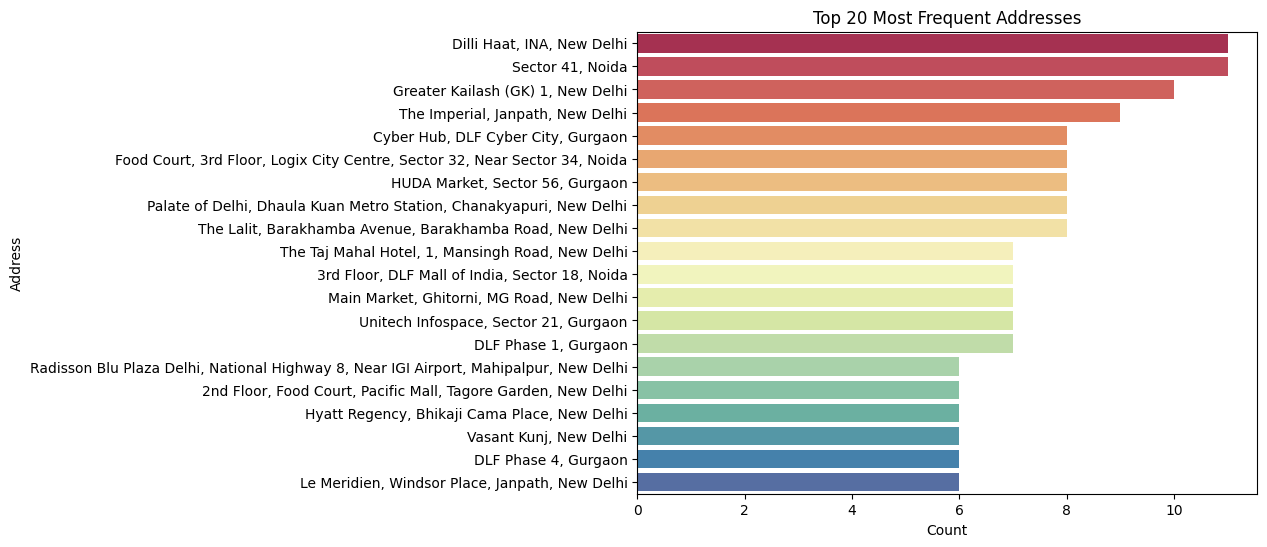

In [54]:
#Set the font to a commonly available font
plt.rcParams['font.family'] = 'DejaVu Sans'

# Get the top N most frequent 'Address' values
top_addresses = df['Address'].value_counts().nlargest(20)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_addresses.values, y=top_addresses.index, palette='Spectral')

plt.xlabel('Count')
plt.ylabel('Address')
plt.title('Top 20 Most Frequent Addresses')

plt.show()

* The 'Location' column in the dataset contains a variety of restaurant locations. Some locations have multiple entries, suggesting that they host several restaurants. For example:

> * "Dilli Haat, INA, New Delhi" has 11 restaurants.
> * "Sector 41, Noida" also has 11 restaurants.
> * "Greater Kailash (GK) 1, New Delhi" has 10 restaurants.
> * "The Imperial, Janpath, New Delhi" has 9 restaurants.
> * "Cyber Hub, DLF Cyber City, Gurgaon" has 8 restaurants.

* Additionally, there are various other unique locations, each with a different count of associated restaurants.

* The dataset provides a comprehensive representation of restaurant locations, ranging from specific addresses to broader areas like markets and commercial hubs. The entries encompass a diverse set of locations, reflecting the varied geography of the restaurant data.

In [55]:
df['Locality'].value_counts()

Connaught Place                                122
Rajouri Garden                                  99
Shahdara                                        87
Defence Colony                                  86
Malviya Nagar                                   85
                                              ... 
Lemon Tree Premier, Sector 29                    1
Omaxe Celebration Mall, Sohna Road, Gurgaon      1
Park Inn, Sector 15, Gurgaon                     1
Plaza Mall, MG Road                              1
Moda                                             1
Name: Locality, Length: 1208, dtype: int64

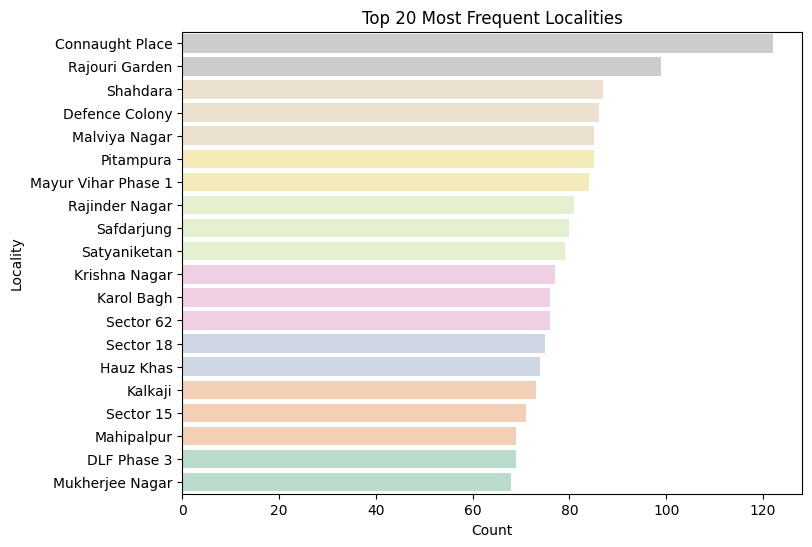

In [56]:
# Set the font to a commonly available sans-serif font
plt.rcParams['font.family'] = 'sans-serif'

# Get the top N most frequent 'Locality' values
top_localities = df['Locality'].value_counts().nlargest(20)

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=top_localities.values, y=top_localities.index, palette='Pastel2_r')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Locality')
plt.title('Top 20 Most Frequent Localities')

# Show the plot
plt.show()

* The 'Locality' column in the dataset provides information about specific localities or neighborhoods where restaurants are situated.

* The most frequently occurring locality is "Connaught Place" with 122 restaurants. Other notable localities include "Rajouri Garden" with 99 restaurants, "Shahdara" with 87 restaurants, "Defence Colony" with 86 restaurants, and "Malviya Nagar" with 85 restaurants.

* The dataset comprises a total of 1208 unique localities, indicating a diverse representation of neighborhoods where restaurants are located.

* This distribution offers insights into the popularity and concentration of restaurants across different localities, with some areas hosting a higher number of establishments compared to others.

In [57]:
df['Locality Verbose'].value_counts()

Connaught Place, New Delhi                    122
Rajouri Garden, New Delhi                      99
Shahdara, New Delhi                            87
Defence Colony, New Delhi                      86
Pitampura, New Delhi                           85
                                             ... 
Ramada Gurgaon Central, Sector 44, Gurgaon      1
Sector 5, Gurgaon                               1
Sector 53, Gurgaon                              1
The Claremont, MG Road, Gurgaon                 1
Moda, ÛÁstanbul                                 1
Name: Locality Verbose, Length: 1265, dtype: int64

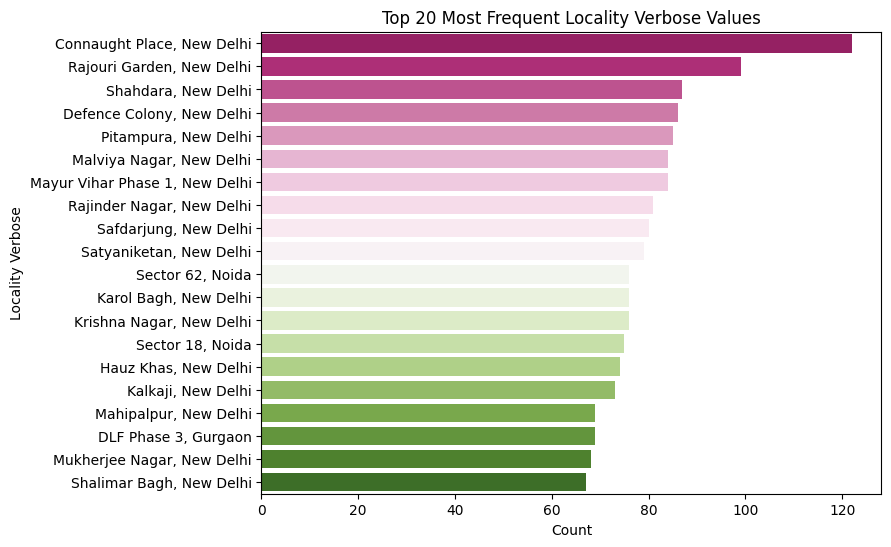

In [58]:
# Set the font to a commonly available sans-serif font
plt.rcParams['font.family'] = 'sans-serif'

# Get the top N most frequent 'Locality Verbose' values
top_localities_verbose = df['Locality Verbose'].value_counts().nlargest(20)

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=top_localities_verbose.values, y=top_localities_verbose.index, palette='PiYG')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Locality Verbose')
plt.title('Top 20 Most Frequent Locality Verbose Values')

# Show the plot
plt.show()

* The 'Locality Verbose' column in the dataset provides detailed information about specific localities or neighborhoods along with their corresponding cities.

* The most frequently occurring locality is "Connaught Place, New Delhi" with 122 restaurants. Other notable localities include "Rajouri Garden, New Delhi" with 99 restaurants, "Shahdara, New Delhi" with 87 restaurants, "Defence Colony, New Delhi" with 86 restaurants, and "Pitampura, New Delhi" with 85 restaurants.

* The dataset comprises a total of 1265 unique locality descriptions, indicating a comprehensive representation of neighborhoods in various cities where restaurants are situated.

* This detailed information offers insights into the specific locations of restaurants and allows for a more granular analysis of their distribution across different areas.

In [59]:
df['Cuisines'].value_counts()

North Indian                                             945
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

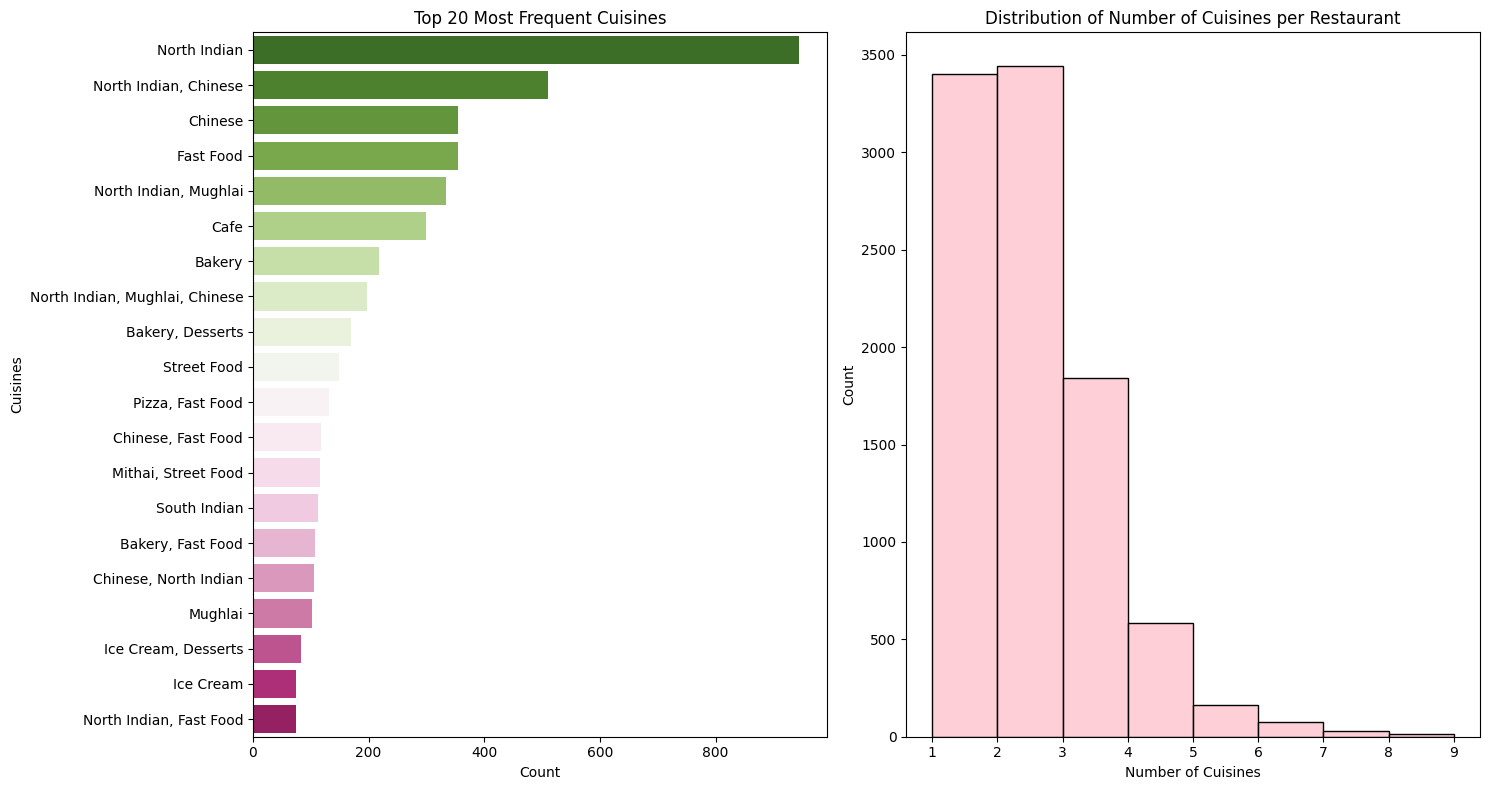

In [60]:
# Set the font to a commonly available sans-serif font
plt.rcParams['font.family'] = 'sans-serif'

# Get the top N most frequent 'Cuisines' values
top_cuisines = df['Cuisines'].value_counts().nlargest(20)

# Plot the bar chart for top N most frequent cuisines
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='PiYG_r')
plt.xlabel('Count')
plt.ylabel('Cuisines')
plt.title('Top 20 Most Frequent Cuisines')

# Count the number of cuisines per restaurant
cuisines_count = df['Cuisines'].str.split(',').apply(lambda x: len(x) if x[0] != 'NOT_AVAILABLE' else 0)

# Plot the distribution of the number of cuisines per restaurant
plt.subplot(1, 2, 2)
sns.histplot(cuisines_count, bins=range(1, cuisines_count.max() + 2), kde=False, color='Pink')
plt.xlabel('Number of Cuisines')
plt.ylabel('Count')
plt.title('Distribution of Number of Cuisines per Restaurant')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

* The 'Cuisines' column in the dataset provides information about the types of cuisines offered by restaurants.

* The most frequently occurring cuisine type is "North Indian" with 945 restaurants. Additionally, other popular combinations include "North Indian, Chinese" (511 occurrences), "Chinese" (354 occurrences), and "Fast Food" (354 occurrences).

* The dataset encompasses a total of 1825 unique combinations of cuisines, showcasing a diverse range of culinary offerings.

* This distribution offers insights into the prevalence of different cuisines among the restaurants, with some cuisines being more common and others representing unique or less frequently encountered combinations.

In [61]:
df['Currency'].value_counts()

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

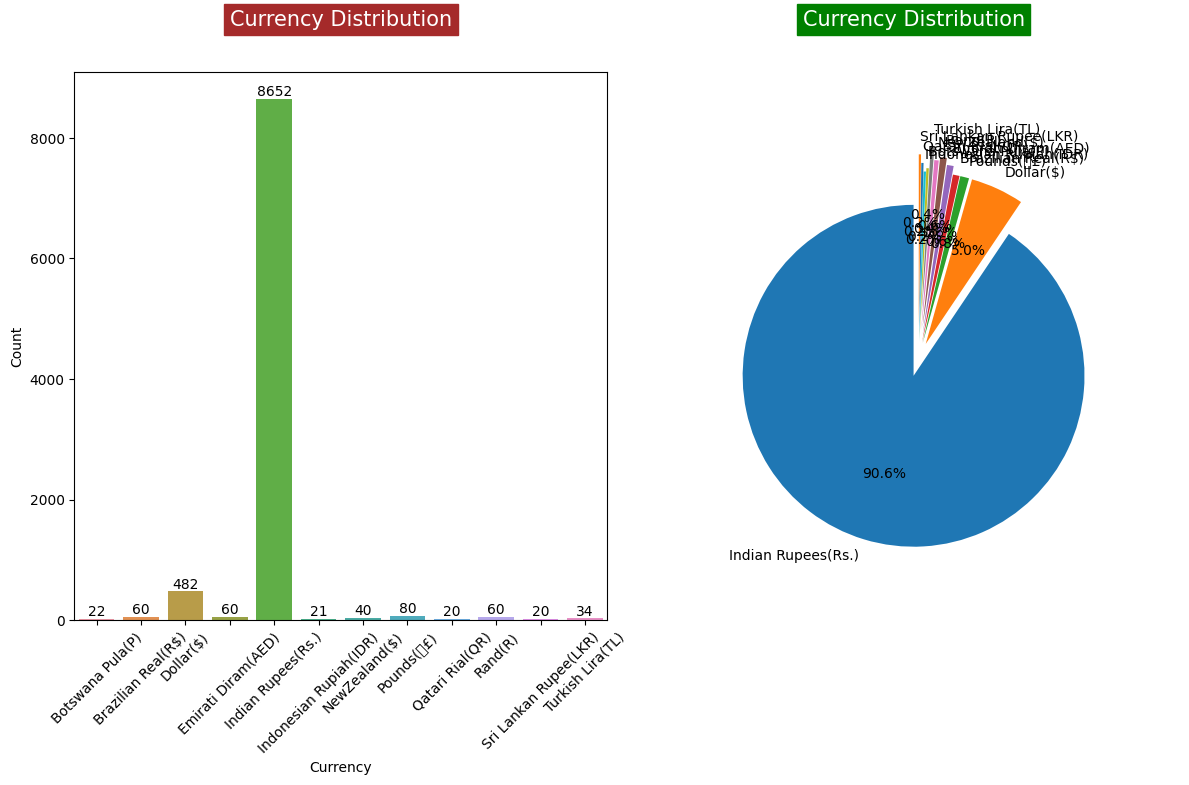

In [62]:
# Count plot for the 'Currency' variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
sns.set_palette('OrRd_r')

# Set font family directly within plt
plt.rcParams['font.family'] = 'DejaVu Sans'

sns.countplot(x="Currency", data=df, ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)

ax1.set(xlabel="Currency", ylabel="Count")
ax1.set_title("Currency Distribution", fontsize=15, backgroundcolor='brown', color='white', y=1.07)
ax1.tick_params(axis='x', rotation=45)
currency_counts = df["Currency"].value_counts()

# Adjust 'explode' for 16 elements
explode = (0.1, 0.1, 0.1, 0.1, 0.15, 0.19, 0.17, 0.25, 0.12, 0.1, 0.15, 0.2)
ax2.pie(currency_counts, labels=currency_counts.index, autopct='%1.1f%%', explode=explode, startangle=90)
ax2.axis('equal')

ax2.set_title("Currency Distribution", fontsize=15, backgroundcolor='green', color='white', y=1.07)
plt.tight_layout()
plt.show()

* The 'Currency' column in the dataset provides information about the currencies in which restaurant costs are denominated.

* The most frequently occurring currency is "Indian Rupees (Rs.)" with 8652 restaurants. Additionally, there are other currencies represented, such as "Dollar " (482 occurrences), "Pounds (£)" (80 occurrences), "Brazilian Real (R$)" (60 occurrences), "Emirati Dirham (AED)" (60 occurrences), "Rand (R)" (60 occurrences), and several others.

* The dataset encompasses a total of 12 unique currencies, indicating that restaurants in the dataset use a variety of currencies to denote their costs. This information provides insights into the international representation of restaurant costs and the currencies commonly used in the dataset.

In [63]:
df['Has Table booking'].value_counts()

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

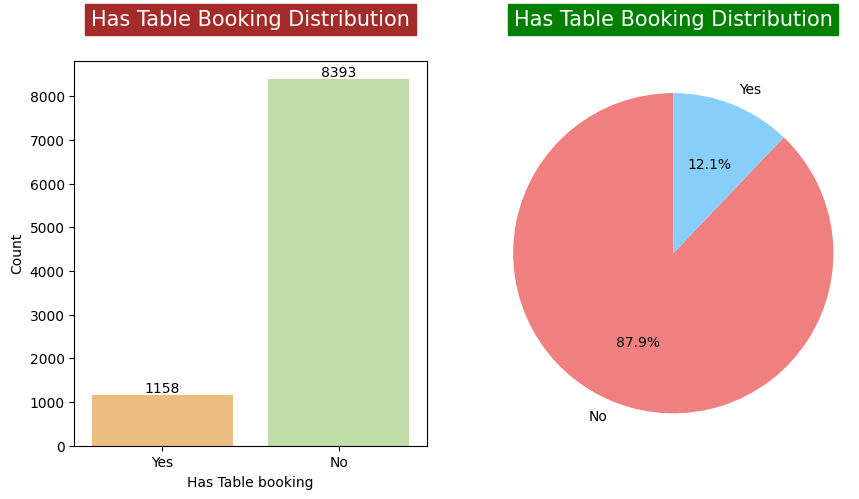

In [64]:
# Count plot for the 'Has Table booking' variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x="Has Table booking", data=df, palette='Spectral', ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)

ax1.set(xlabel="Has Table booking", ylabel="Count")
ax1.set_title("Has Table Booking Distribution", fontsize=15, backgroundcolor='brown', color='white', y=1.07)

has_table_booking_counts = df["Has Table booking"].value_counts()
colors = ['lightcoral', 'lightskyblue']
ax2.pie(has_table_booking_counts, labels=has_table_booking_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.axis('equal')

ax2.set_title("Has Table Booking Distribution", fontsize=15, backgroundcolor='green', color='white', y=1.07)

plt.show()

* The 'Has Table booking' column in the dataset indicates whether restaurants have a table booking option.

* The data shows that 8393 restaurants do not offer a table booking option, while 1158 restaurants do provide the option for customers to book a table in advance.

* This binary representation provides insights into the prevalence of table booking facilities among the restaurants in the dataset, with a majority not offering this service.

In [65]:
df['Has Online delivery'].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

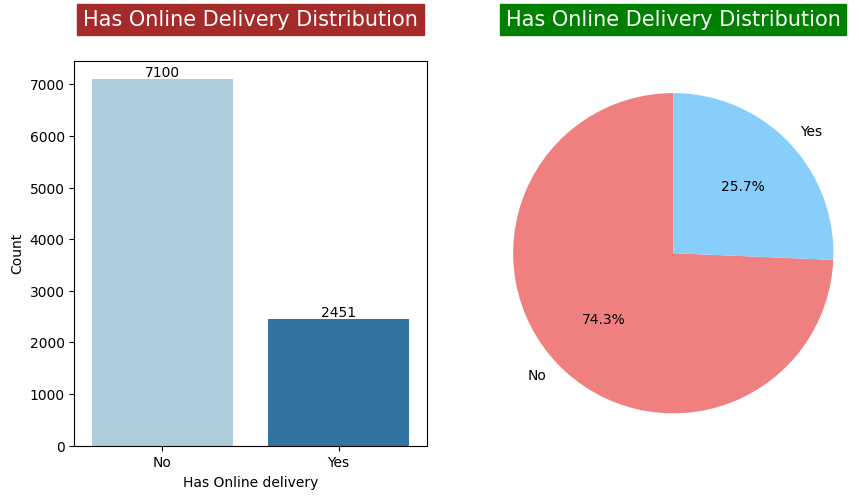

In [66]:
# Count plot for the 'Has Online delivery' variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x="Has Online delivery", data=df, palette='Paired', ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)

ax1.set(xlabel="Has Online delivery", ylabel="Count")
ax1.set_title("Has Online Delivery Distribution", fontsize=15, backgroundcolor='brown', color='white', y=1.07)

has_online_delivery_counts = df["Has Online delivery"].value_counts()
colors = ['lightcoral', 'lightskyblue']
ax2.pie(has_online_delivery_counts, labels=has_online_delivery_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.axis('equal')

ax2.set_title("Has Online Delivery Distribution", fontsize=15, backgroundcolor='green', color='white', y=1.07)

plt.show()

* The 'Has Online delivery' column in the dataset indicates whether restaurants offer online delivery services.

* The data shows that 7100 restaurants do not provide online delivery, while 2451 restaurants offer this service.

* This binary representation provides insights into the distribution of online delivery services among the restaurants in the dataset, with a substantial number of restaurants not offering this option and a notable proportion providing online delivery services.

In [67]:
df['Is delivering now'].value_counts()

No     9517
Yes      34
Name: Is delivering now, dtype: int64

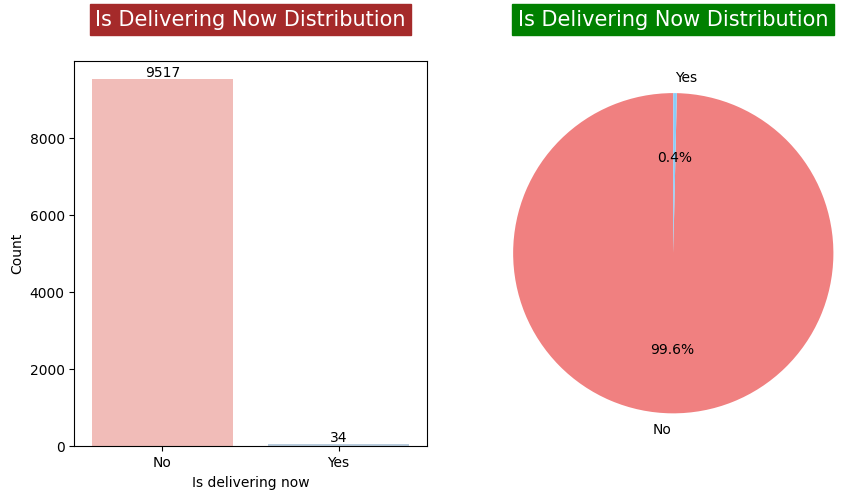

In [68]:
# Count plot for the 'Is delivering now' variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x="Is delivering now", data=df, palette='Pastel1', ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)

ax1.set(xlabel="Is delivering now", ylabel="Count")
ax1.set_title("Is Delivering Now Distribution", fontsize=15, backgroundcolor='brown', color='white', y=1.07)

is_delivering_now_counts = df["Is delivering now"].value_counts()
colors = ['lightcoral', 'lightskyblue']
ax2.pie(is_delivering_now_counts, labels=is_delivering_now_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.axis('equal')

ax2.set_title("Is Delivering Now Distribution", fontsize=15, backgroundcolor='green', color='white', y=1.07)

plt.show()

* The 'Is delivering now' column in the dataset indicates whether restaurants are currently offering delivery services.

* The data shows that 9517 restaurants are not delivering at the moment, while only 34 restaurants are currently providing delivery services.

* This binary representation provides insights into the current availability of delivery services among the restaurants in the dataset, with the majority not offering delivery at the time of data collection.

In [69]:
df['Switch to order menu'].value_counts()

No    9551
Name: Switch to order menu, dtype: int64

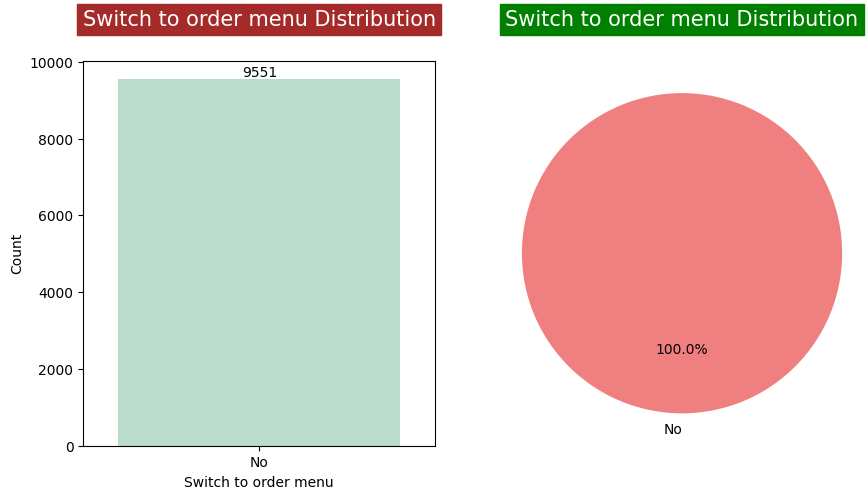

In [70]:
# Count plot for the 'Is delivering now' variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x="Switch to order menu", data=df, palette='Pastel2', ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)

ax1.set(xlabel="Switch to order menu", ylabel="Count")
ax1.set_title("Switch to order menu Distribution", fontsize=15, backgroundcolor='brown', color='white', y=1.07)

switch_to_order_menu_counts = df["Switch to order menu"].value_counts()
colors = ['lightcoral']
ax2.pie(switch_to_order_menu_counts, labels=switch_to_order_menu_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.axis('equal')

ax2.set_title("Switch to order menu Distribution", fontsize=15, backgroundcolor='green', color='white', y=1.07)

plt.show()

* The 'Switch to order menu' column in the dataset has a single value, "No," for all entries. This suggests that the "Switch to order menu" feature is not applicable or is not activated for any of the restaurants in the dataset.

In [71]:
df['Rating color'].value_counts()

Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: Rating color, dtype: int64

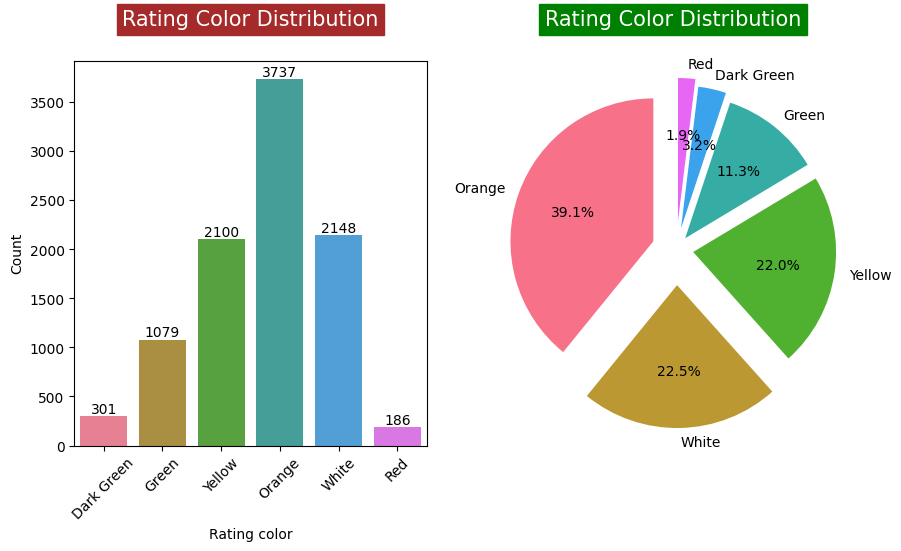

In [72]:
# Count plot for the 'Rating color' variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x="Rating color", data=df, palette=sns.color_palette("husl", 6), ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)

ax1.set(xlabel="Rating color", ylabel="Count")
ax1.tick_params(axis='x', rotation=45)
ax1.set_title("Rating Color Distribution", fontsize=15, backgroundcolor='brown', color='white', y=1.07)

rating_color_counts = df["Rating color"].value_counts()
colors = sns.color_palette("husl", 6)
explode=[0.17, 0.25, 0.12, 0.1, 0.15, 0.2]
ax2.pie(rating_color_counts, labels=rating_color_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax2.axis('equal')

ax2.set_title("Rating Color Distribution", fontsize=15, backgroundcolor='green', color='white', y=1.07)

plt.show()


* The 'Rating color' column in the dataset provides information about the color-coding of restaurant ratings. The distribution of rating colors is as follows:

* Orange: 3737 restaurants
* White: 2148 restaurants
* Yellow: 2100 restaurants
* Green: 1079 restaurants
* Dark Green: 301 restaurants
* Red: 186 restaurants

* This distribution illustrates the prevalence of different rating colors assigned to restaurants, with orange being the most common, followed by white, yellow, green, dark green, and red. The color-coding likely corresponds to different rating ranges, with each color representing a specific category or level of rating.







In [73]:
df['Rating text'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

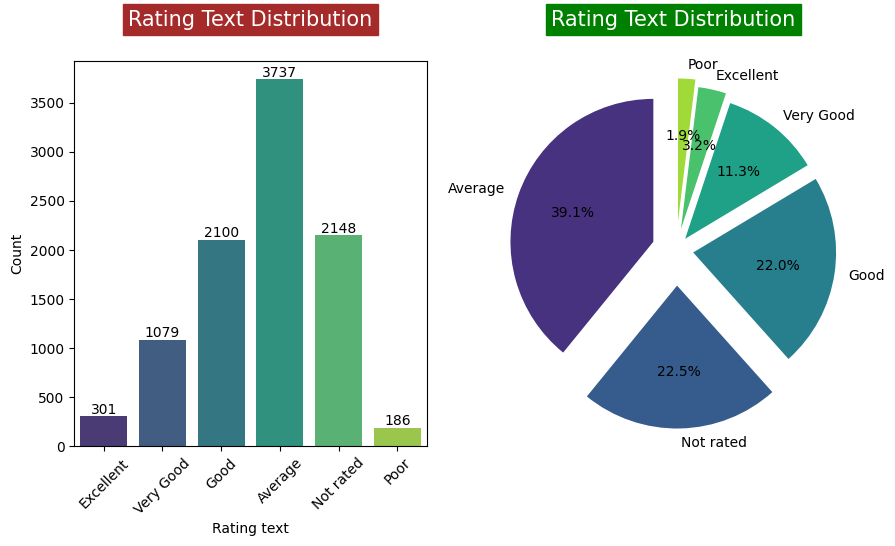

In [74]:
# Count plot for the 'Rating text' variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(x="Rating text", data=df, palette=sns.color_palette("viridis", len(df["Rating text"].unique())), ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)

ax1.set(xlabel="Rating text", ylabel="Count")
ax1.tick_params(axis='x', rotation=45)
ax1.set_title("Rating Text Distribution", fontsize=15, backgroundcolor='brown', color='white', y=1.07)

rating_text_counts = df["Rating text"].value_counts()
colors = sns.color_palette("viridis", len(df["Rating text"].unique()))
explode=[0.17, 0.25, 0.12, 0.1, 0.15, 0.2]
ax2.pie(rating_text_counts, labels=rating_text_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax2.axis('equal')

ax2.set_title("Rating Text Distribution", fontsize=15, backgroundcolor='green', color='white', y=1.07)

plt.show()

* The 'Rating text' column in the dataset provides textual descriptions corresponding to the color-coded restaurant ratings.

* The distribution of rating texts is as follows:

* Average: 3737 restaurants
* Not rated: 2148 restaurants
* Good: 2100 restaurants
* Very Good: 1079 restaurants
* Excellent: 301 restaurants
* Poor: 186 restaurants

* This distribution offers a textual representation of the rating categories assigned to restaurants, with each category describing the perceived quality of the restaurant.

* The categories range from "Average" and "Not rated" to "Good," "Very Good," "Excellent," and "Poor."

In [75]:
df['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

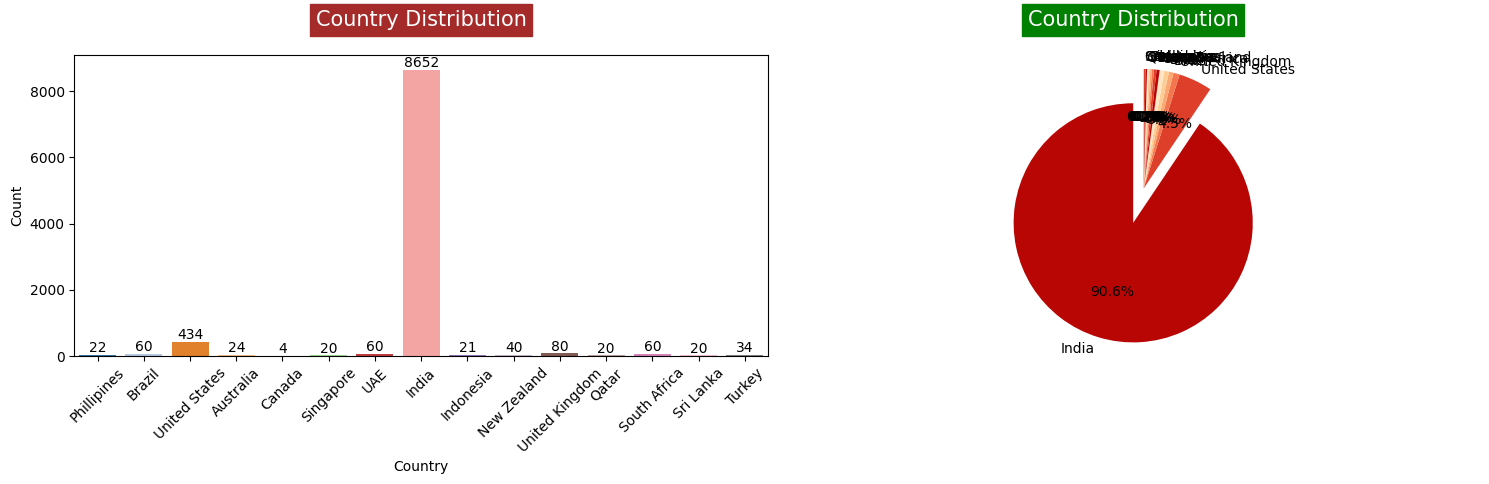

In [76]:
# Count plot for the 'Country' variable
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.set_palette('tab20')
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'

sns.countplot(x="Country", data=df, ax=ax1)
for i in ax1.containers:
    ax1.bar_label(i)

ax1.set(xlabel="Country", ylabel="Count")
ax1.set_title("Country Distribution", fontsize=15, backgroundcolor='brown', color='white', y=1.07)
ax1.tick_params(axis='x', rotation=45)
country_counts = df["Country"].value_counts()

# Calculate explode values based on the percentage of each country
explode = [0.3 if count == country_counts.max() else 0 for count in country_counts]
ax2.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', explode=explode, startangle=90)
ax2.axis('equal')

ax2.set_title("Country Distribution", fontsize=15, backgroundcolor='green', color='white', y=1.07)
plt.tight_layout()
plt.show()

* The data reflects a diverse geographical distribution of restaurants, with the majority located in India (8652 restaurants). Other countries represented in the dataset include the United States (434 restaurants), the United Kingdom (80 restaurants), Brazil (60 restaurants), the UAE (United Arab Emirates, 60 restaurants), South Africa (60 restaurants), New Zealand (40 restaurants), Turkey (34 restaurants), Australia (24 restaurants), the Philippines (22 restaurants), Indonesia (21 restaurants), Singapore (20 restaurants), Qatar (20 restaurants), Sri Lanka (20 restaurants), and Canada (4 restaurants).

* This comprehensive distribution highlights the international scope of the dataset, showcasing a variety of culinary offerings across different countries.

**Bivariant Analysis:-**

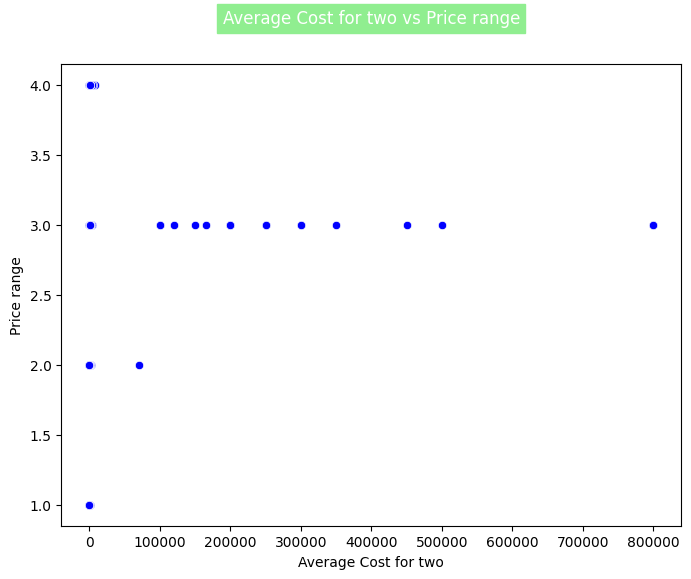

In [77]:
# Bivariate analysis for 'Average Cost for two' vs 'Price range'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average Cost for two', y='Price range', data=df, color='blue')
plt.title('Average Cost for two vs Price range', backgroundcolor='Lightgreen', color='white', y=1.07)
plt.xlabel('Average Cost for two')
plt.ylabel('Price range')
plt.show()

* This correlation suggests that the average cost for two and the price range are not strongly dependent on each other.

* The positive correlation is very weak, suggesting that there is only a minimal tendency for the average cost for two to increase as the price range increases, and vice versa.

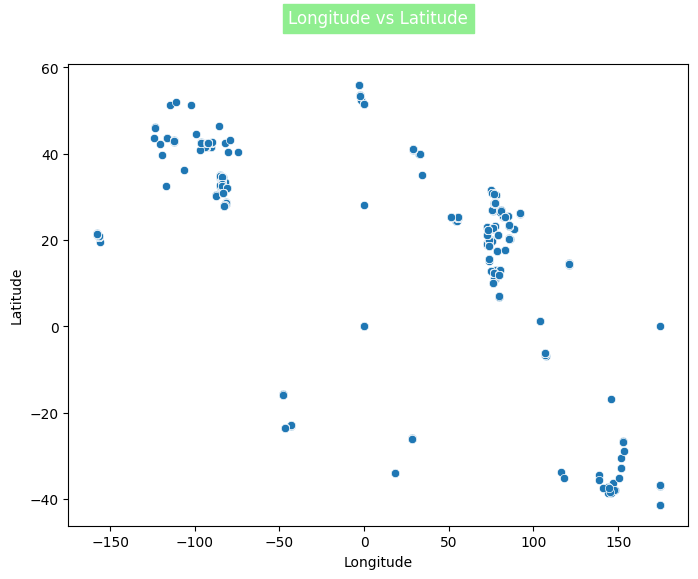

In [78]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Longitude', y='Latitude', data=df)
plt.title('Longitude vs Latitude', backgroundcolor='Lightgreen', color='white', y=1.07)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

* The positive correlation is very weak, suggesting that there is only a minimal tendency for longitude and latitude to increase or decrease together.

* The weak positive correlation may be indicative of some directional tendency, but it's not sufficient to make precise predictions about one variable based on the othe

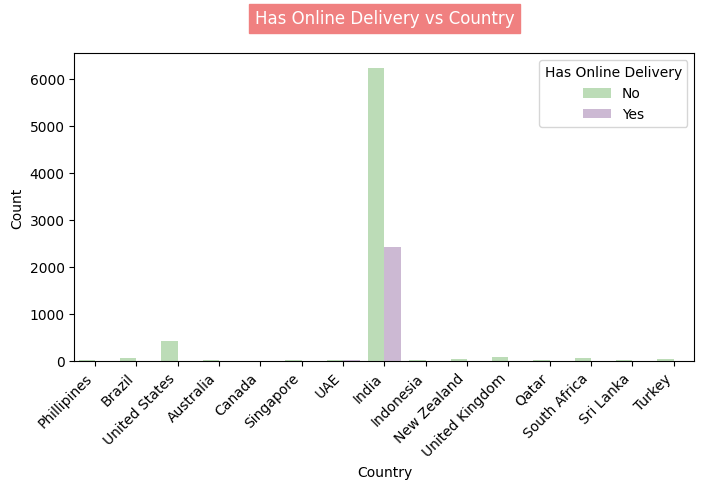

In [79]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Country', hue='Has Online delivery', data=df, palette='PRGn_r')
plt.title('Has Online Delivery vs Country', backgroundcolor='Lightcoral', color='white', y=1.07)
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Has Online Delivery', loc='upper right', labels=['No', 'Yes'])
plt.show()

* India has the highest count for both "No" and "Yes" values in the 'Has Online Delivery' column compared to other countries.

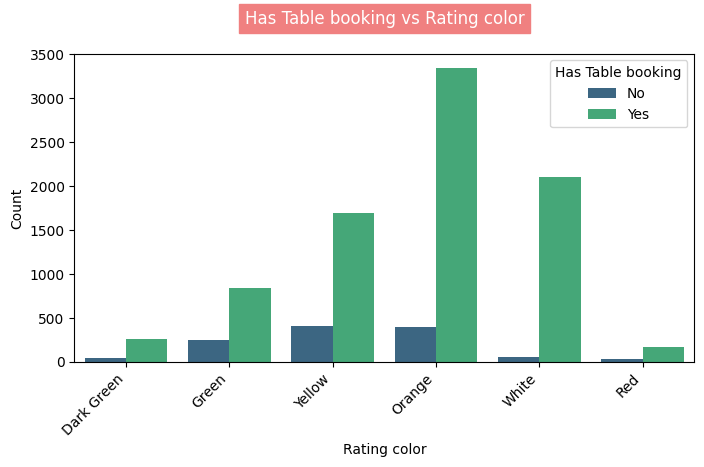

In [80]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Rating color', hue='Has Table booking', data=df, palette='viridis')
plt.title('Has Table booking vs Rating color', backgroundcolor='Lightcoral', color='white', y=1.07)
plt.xlabel('Rating color')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Has Table booking', loc='upper right', labels=['No', 'Yes'])
plt.show()

* People who have assigned the color rating "Orange" are more inclined to book tables at restaurants, followed by those who chose "White" and "Yellow" ratings.

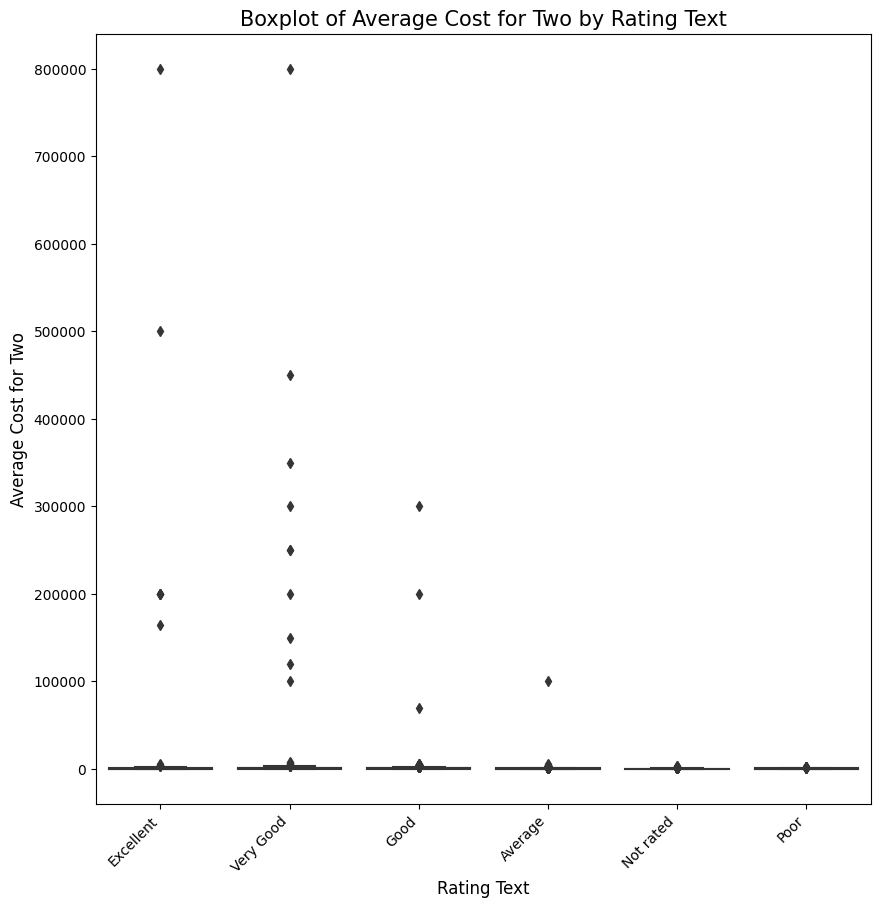

In [81]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df["Rating text"], y=df["Average Cost for two"], palette='viridis')

# Adding labels and title
plt.xlabel('Rating Text', fontsize=12)
plt.ylabel('Average Cost for Two', fontsize=12)
plt.title('Boxplot of Average Cost for Two by Rating Text', fontsize=15)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


The plot indicates that there is a correlation between the rating of a restaurant and the corresponding cost of service.

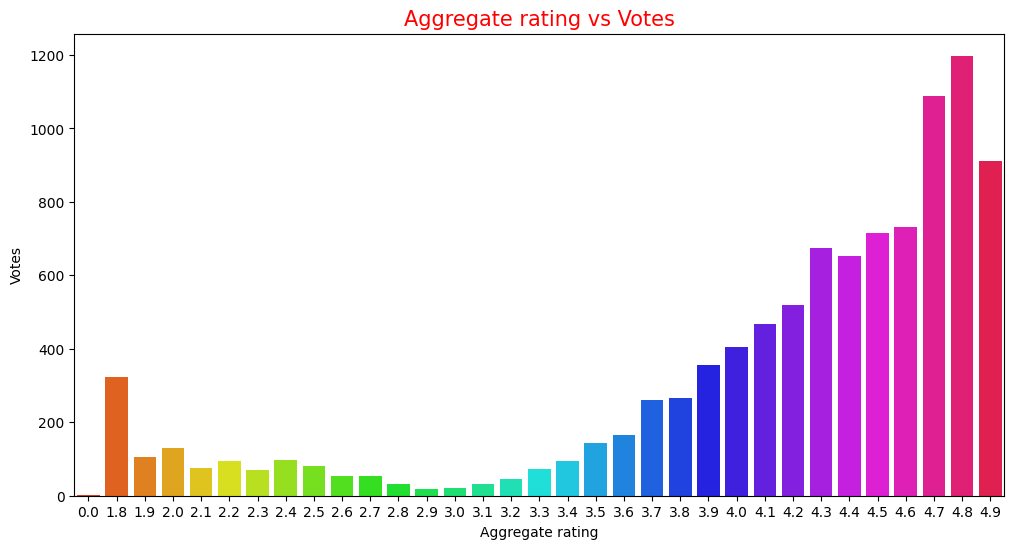

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Aggregate rating', y='Votes', data=df, palette='hsv', ci=None)
plt.title('Aggregate rating vs Votes', size=15, color='red')
plt.xlabel('Aggregate rating')
plt.ylabel('Votes')
plt.show()

 * Aggregate rating and votes indicates that as the number of votes increases, the aggregate rating tends to be higher. This suggests that popular or well-reviewed items are likely to attract more votes.

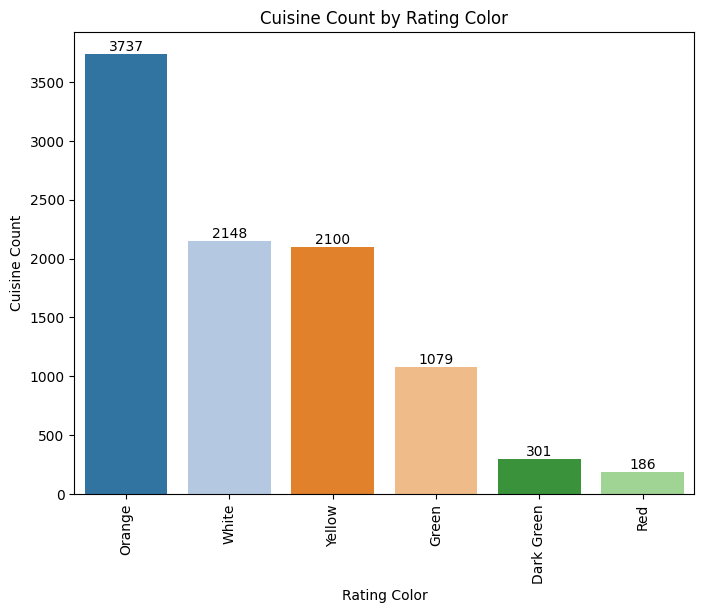

In [83]:
cuisine_rating_counts = df.groupby(['Rating color', 'Cuisines']).size().reset_index(name='Counts')
sorted_cuisine_rating_counts = cuisine_rating_counts.groupby('Rating color').sum().sort_values(by='Counts', ascending=False)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sorted_cuisine_rating_counts.index, y='Counts', data=sorted_cuisine_rating_counts)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Rating Color')
plt.ylabel('Cuisine Count')
plt.xticks(rotation=90)
plt.title('Cuisine Count by Rating Color')
plt.show()


**The distribution of cuisines based on different rating colors on Zomato is as follows:**

* Cuisines associated with the Orange rating color dominate the platform, with an impressive count of 3737.

* Following closely, White-rated cuisines secure a substantial presence with 2148 offerings.

* Yellow-rated cuisines also hold a strong position, boasting a count of 2100.

* Green-rated cuisines exhibit a notable presence with 1079 offerings.

* Cuisines associated with the Dark Green rating color, representing a higher level of excellence, stand at 301.

* Completing the spectrum, Red-rated cuisines, reflecting a lower rating, have a count of 186.

* This breakdown provides insights into the popularity and perceived quality of cuisines across different rating categories on Zomato.

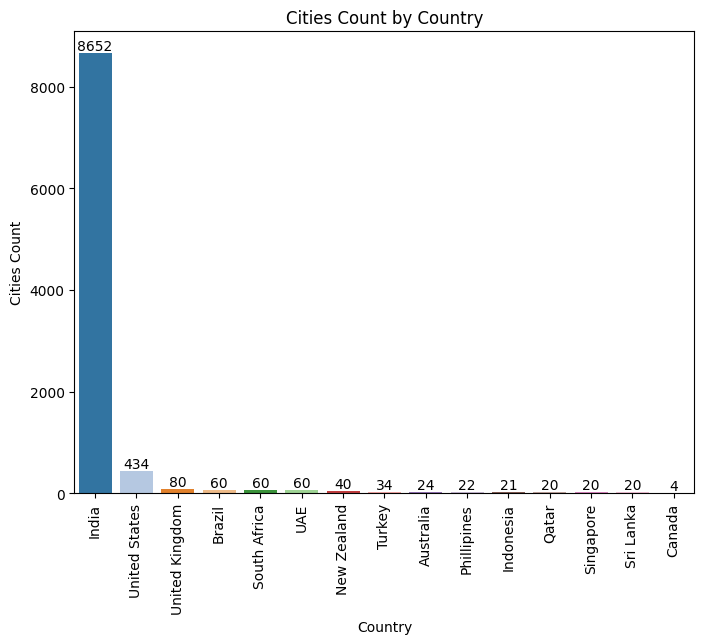

In [84]:
city_counts = df.groupby(['Country', 'City']).size().reset_index(name='Counts')
sorted_city_counts = city_counts.groupby('Country').sum().sort_values(by='Counts', ascending=False)

plt.figure(figsize=(8, 6))
ax=sns.barplot(x=sorted_city_counts.index, y='Counts', data=sorted_city_counts)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Country')
plt.ylabel('Cities Count')
plt.xticks(rotation=90)
plt.title('Cities Count by Country')
plt.show()

* Zomato showcases a diverse global presence with a significant concentration of listed restaurants in various countries. India leads the pack with an impressive 8652 restaurants, underscoring its robust culinary landscape.

* In the United States, Zomato features 434 restaurants, while the United Kingdom follows closely with 80 establishments.

* Further enriching its international footprint, Zomato lists 60 restaurants each in Brazil, South Africa, and the UAE. New Zealand contributes 40 restaurants, Turkey 34, and Australia 24, highlighting the platform's reach across continents.

* Moreover, several countries, including the Philippines, Indonesia, Qatar, Singapore, and Sri Lanka, are represented with 22 to 20 listed restaurants. Canada rounds off the global spectrum with 4 restaurants. This varied distribution reinforces Zomato's commitment to providing a comprehensive culinary experience worldwide.

In [85]:
df['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [86]:
['India', 'United States', 'United Kingdom', 'Brazil', 'UAE', 'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines', 'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada']

['India',
 'United States',
 'United Kingdom',
 'Brazil',
 'UAE',
 'South Africa',
 'New Zealand',
 'Turkey',
 'Australia',
 'Phillipines',
 'Indonesia',
 'Singapore',
 'Qatar',
 'Sri Lanka',
 'Canada']

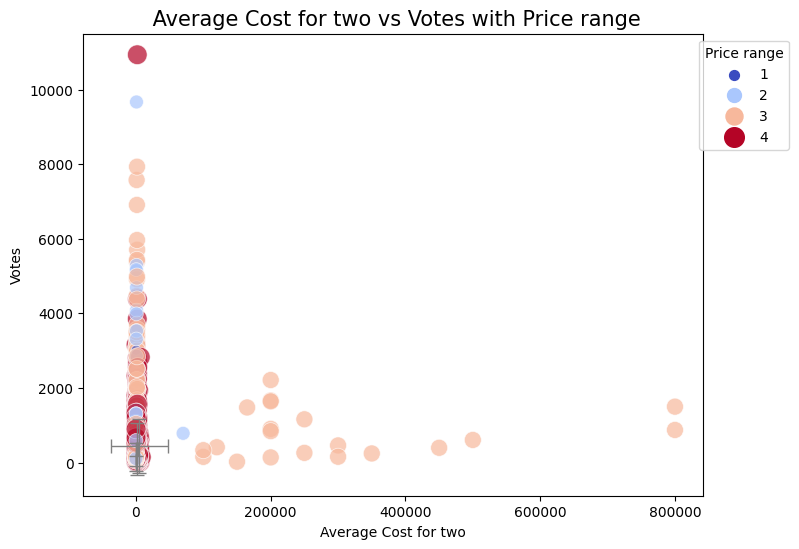

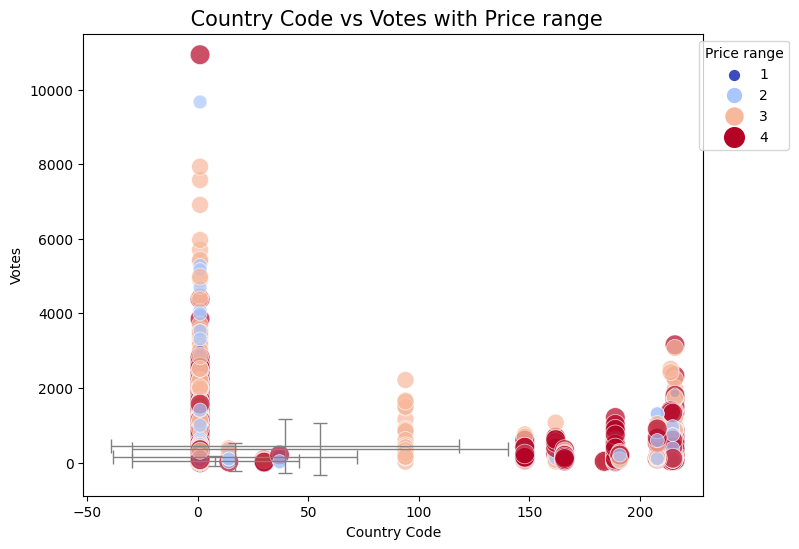

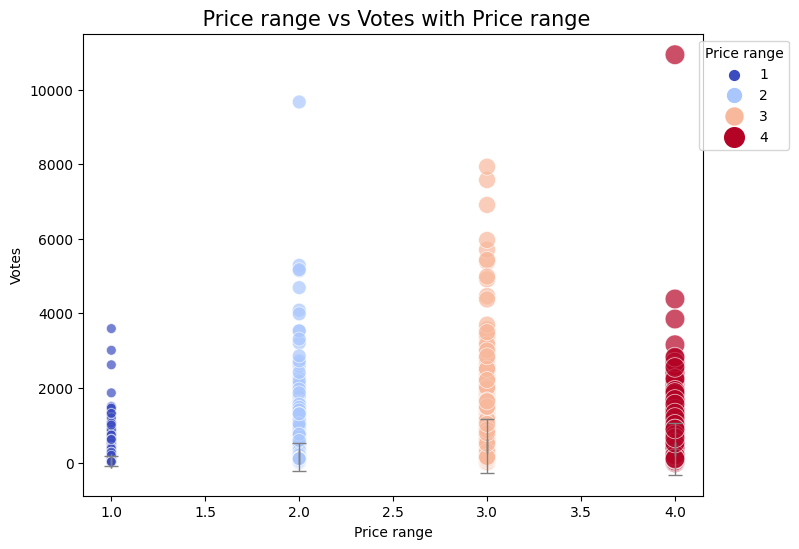

In [87]:
numerical_columns = ['Average Cost for two', 'Country Code', 'Price range']

# Scatter plot between numerical columns and 'Votes' with error bars
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=col, y='Votes', hue='Price range', palette='coolwarm', size='Price range', sizes=(50, 200), alpha=0.7)

    # Add error bars (standard deviation)
    for price_range, group in df.groupby('Price range'):
        x_mean = group[col].mean()
        y_mean = group['Votes'].mean()
        x_std = group[col].std()
        y_std = group['Votes'].std()

        plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='none', ecolor='gray', elinewidth=1, capsize=5)

    plt.title(f' {col} vs Votes with Price range', size=15)
    plt.xlabel(col)
    plt.ylabel('Votes')
    plt.legend(title='Price range', loc='upper right', bbox_to_anchor=(1.15, 1))
    plt.show()

* The relationship is very weak, and the average cost for two is not a strong predictor of the number of votes a restaurant receives.

* The country code play a more significant role in influencing the number of votes a restaurant gets. The weak correlation suggests that regional or cultural differences captured by the country code may have a subtle influence on voting patterns.

* There is a tendency for higher-priced restaurants to attract more votes, but the relationship is not extremely strong.

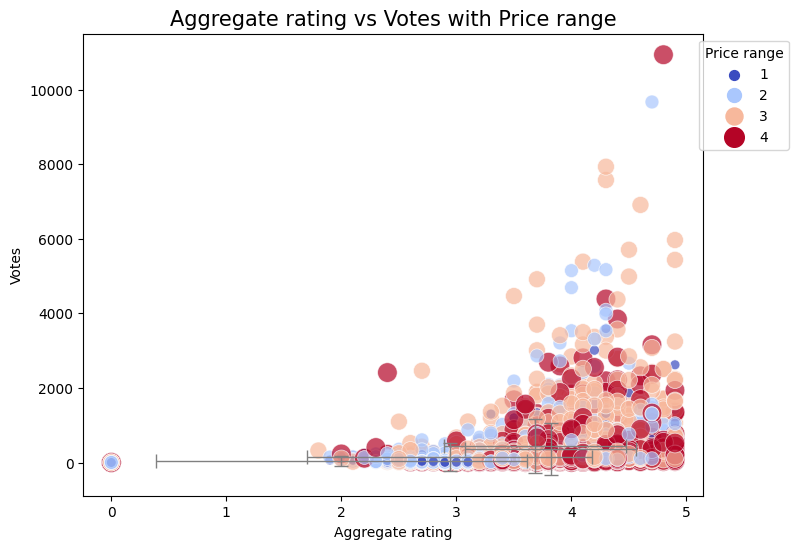

In [88]:
# Scatter plot between 'Aggregate rating' and 'Votes' with error bars
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Aggregate rating', y='Votes', hue='Price range', palette='coolwarm', size='Price range', sizes=(50, 200), alpha=0.7)

# Add error bars (standard deviation)
for price_range, group in df.groupby('Price range'):
    x_mean = group['Aggregate rating'].mean()
    y_mean = group['Votes'].mean()
    x_std = group['Aggregate rating'].std()
    y_std = group['Votes'].std()

    plt.errorbar(x_mean, y_mean, xerr=x_std, yerr=y_std, fmt='none', ecolor='gray', elinewidth=1, capsize=5)

plt.title('Aggregate rating vs Votes with Price range', size=15)
plt.xlabel('Aggregate rating')
plt.ylabel('Votes')
plt.legend(title='Price range', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

* A moderate positive correlation between aggregate ratings and vote wiith price range.  This suggests that restaurants with higher aggregate ratings and vote tend to have a higher price range.

In [89]:

def get_ratingdist(df, country):
    agg = df[df['Country'] == country]['Aggregate rating']
    print(agg)
    fig = plt.figure(figsize=(8, 6))
    plt.title(f'Distribution of Aggregate rating in {country.upper()}')
    plt.xlabel('Aggregate rating')
    plt.ylabel('Count of Aggregate rating')
    plt.grid(False)
    sns.histplot(data=agg, palette='hsv')
    plt.show()

In [90]:
def get_restdist(df, country):
    ratings = df[df['Country'] == country]['Rating text'].unique()
    ratings_count = np.zeros(len(ratings))

    for i in range(len(ratings)):
        ratings_count[i] = df[df['Country'] == country].groupby('Rating text').count().loc[ratings[i]]['Restaurant ID']

    sort_indices = np.argsort(ratings_count)[::-1]
    ratings = ratings[sort_indices]
    ratings_count = ratings_count[sort_indices]

    total_rest = len(df[df['Country'] == country])
    ratings_dist = (ratings_count / total_rest) * 100
    ratings_dist = np.round(ratings_dist, decimals=2)

    fig = plt.figure(figsize=(8, 6))
    plt.title(f'% Distribution of Restaurants Based on Ratings {country.upper()}')
    plt.xlabel('% Distribution of Restaurants')
    plt.ylabel('Ratings')
    ax = sns.barplot(x=ratings, y=ratings_dist, palette='ocean')
    ax.bar_label(ax.containers[0])
    plt.show()


### USA Ratings

82     3.3
83     3.3
84     3.4
85     3.4
86     3.4
      ... 
558    3.7
559    3.5
560    3.9
561    3.9
562    3.2
Name: Aggregate rating, Length: 434, dtype: float64


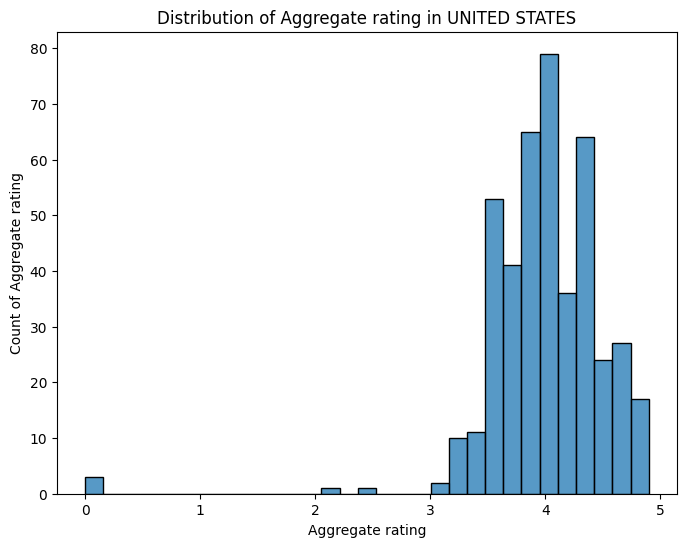

In [91]:
get_ratingdist(df, 'United States')



In the USA, customers predominantly provide ratings for food falling within the Average to Excellent range, with fewer ratings for poor restaurants. This could suggest either a tendency among people in the USA to avoid negative ratings or that the majority of restaurants in the USA offer high-quality food. Note: This observation may also be influenced by a lack of sufficient data points for the USA.

### % Distribution of Resteraunts based on ratings in USA

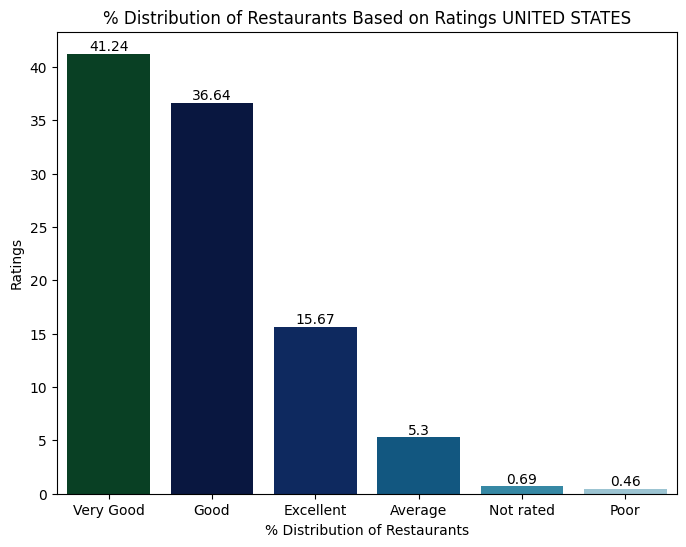

In [92]:
get_restdist(df, 'United States')

From this graph, it's evident that 42.51% of restaurants in the USA are rated as 'Very Good.' A significant portion of the distribution consists of ratings classified as 'Very Good,' 'Good,' or 'Excellent.'

### India Ratings

624     3.9
625     3.5
626     3.6
627     4.0
628     4.2
       ... 
9271    3.6
9272    3.7
9273    4.3
9274    3.8
9275    4.4
Name: Aggregate rating, Length: 8652, dtype: float64


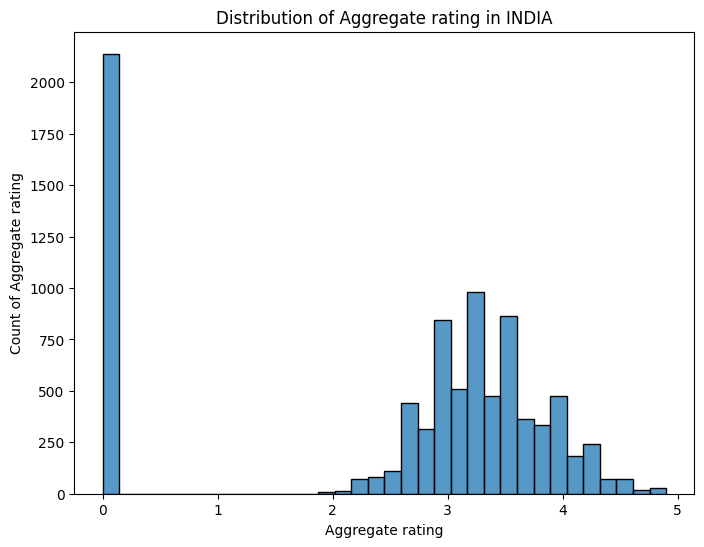

In [93]:
get_ratingdist(df, 'India')

Here, we notice that in India, individuals typically provide ratings when the food falls within the Average to Excellent range. Interestingly, there is a significant penalty for poor food or service. This differs significantly from the behavior of customers in the USA. Several factors could contribute to this:

People in India might be more sensitive to the quality of food and service.
Major restaurants in India may struggle to deliver high-quality food.
In India, customers may be inclined to rate poorly to take advantage of free exchanges or cashback offers.
Note: The dataset for India contains a much larger number of data points compared to the USA.

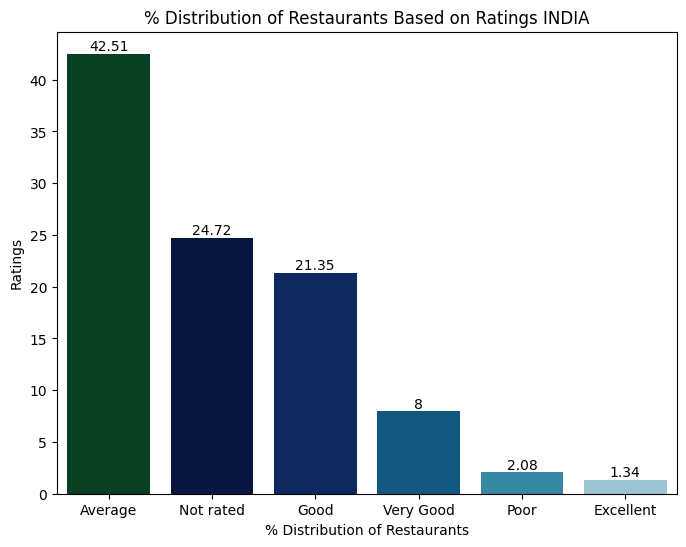

In [94]:
get_restdist(df, 'India')

In this observation, it's noticeable that Indian consumers are not as generous with ratings, with 24.72% of restaurants receiving no rating (although this might be attributed to the large dataset compared to the USA). This trend could also be indicative of the fact that a significant portion of Indian restaurants might not consistently provide good food.

### Top 10 Cuisines in India

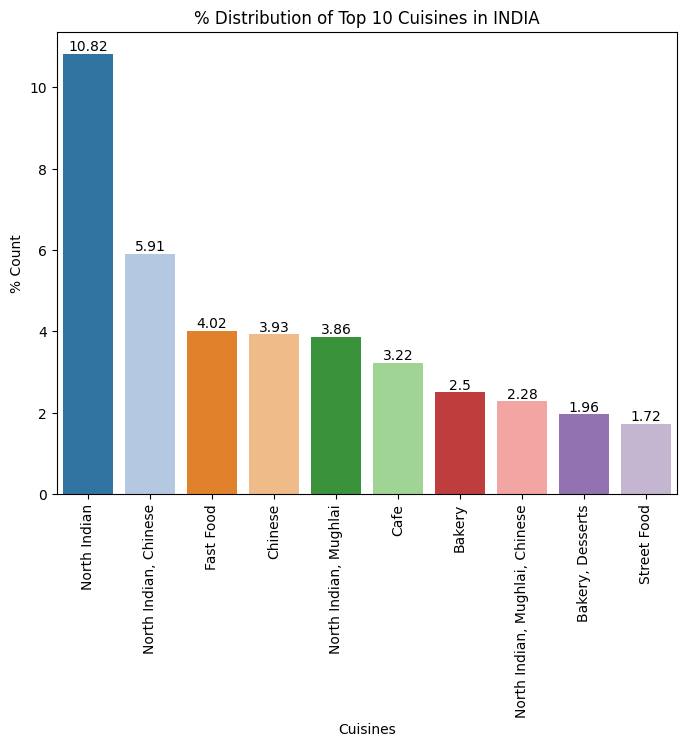

In [95]:
def get_cuisines(df, country):

    df_country = df[df['Country'] == country]
    top_10 = df_country['Cuisines'].value_counts().nlargest(10)
    total = len(df_country)
    cuisine_type = np.array(top_10.keys())
    cuisine_count = np.array(top_10.values)

    cuisine_count = (cuisine_count / total) * 100
    cuisine_count = np.round(cuisine_count, decimals=2)

    fig = plt.figure(figsize=(8, 6))
    plt.title(f'% Distribution of Top 10 Cuisines in {country.upper()}')
    plt.xlabel('Cuisines')
    plt.ylabel('% Count')
    plt.xticks(rotation=90)
    ax = sns.barplot(x=cuisine_type, y=cuisine_count)
    ax.bar_label(ax.containers[0])
    plt.show()

get_cuisines(df,'India')

Certainly, North Indian cuisine appears to dominate the market. However, it's crucial to consider that this observation might be influenced by a higher concentration of data from North Indian states. Let's validate this assumption.

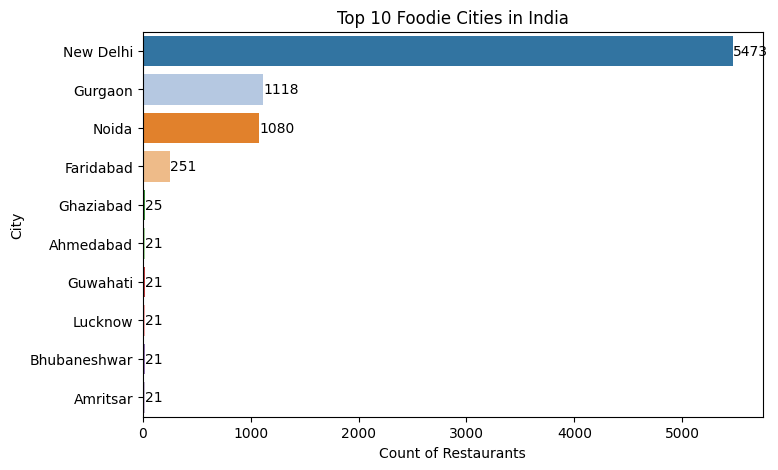

In [96]:
# Filter the DataFrame for India
df_india = df[df['Country'] == 'India']

# Get the top 10 cities in India
top_10_cities = df_india['City'].value_counts().nlargest(10)

# Plotting
fig = plt.figure(figsize=(8, 5))
plt.title('Top 10 Foodie Cities in India')
plt.xlabel('Count of Restaurants')
plt.ylabel('City')
ax = sns.barplot(x=top_10_cities.values, y=top_10_cities.index)
ax.bar_label(ax.containers[0])
plt.show()

It's evident that a majority of restaurants are situated in the Delhi-NCR region, thereby validating the prevalence of North Indian cuisine.

### Top 10 Cuisines in USA

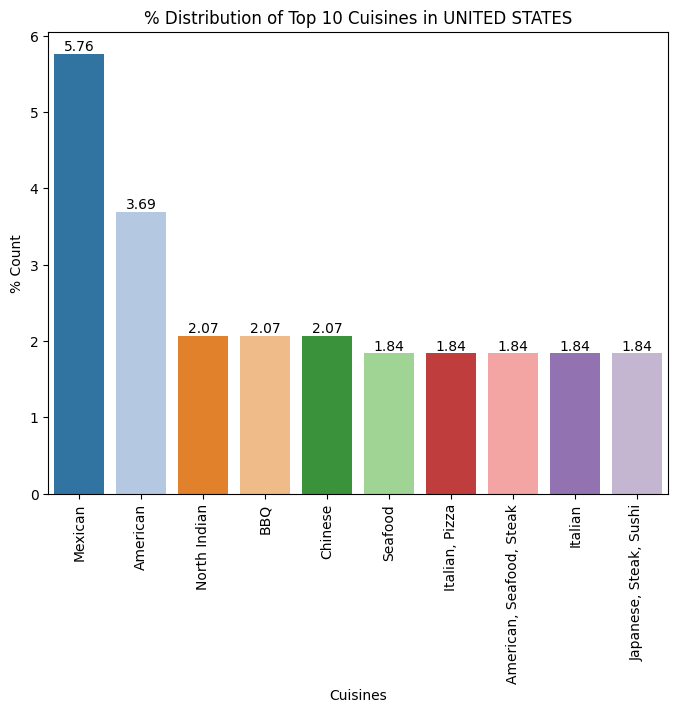

In [97]:
get_cuisines(df,'United States')


Mexican cuisine stands out as the most popular choice among people in the USA, although there isn't a significant contrast in the popularity of other cuisines such as American and Chinese.

### Which country has the cheaper food?

In [98]:
def convert_to_dollar(value, currency):
    # Dictionary of currency conversion rates with respect to Dollar
    conversion_rates = {
        'Botswana Pula(P)': 0.092,
        'Brazilian Real(R$)': 0.192,
        'Dollar($)': 1.0,
        'Emirati Diram(AED)': 0.272,
        'Indian Rupees(Rs.)': 0.014,
        'NewZealand($)': 0.706,
        'Pounds(\x8c£)': 1.38,
        'Qatari Rial(QR)': 0.27,
        'Rand(R)': 0.068,
        'Sri Lankan Rupee(LKR)': 0.0053,
        'Turkish Lira(TL)': 0.12
    }

    # Convert the value to Dollar
    if currency in conversion_rates:
        value_in_dollar = value * conversion_rates[currency]
        return value_in_dollar
    else:
        return None



In [99]:

df['Average Cost for two ($)'] = df.apply(lambda x: convert_to_dollar(x['Average Cost for two'], x['Currency']), axis=1)

# Display the modified DataFrame
#print(df[['Average Cost for two', 'Currency', 'Average Cost for two ($)']])

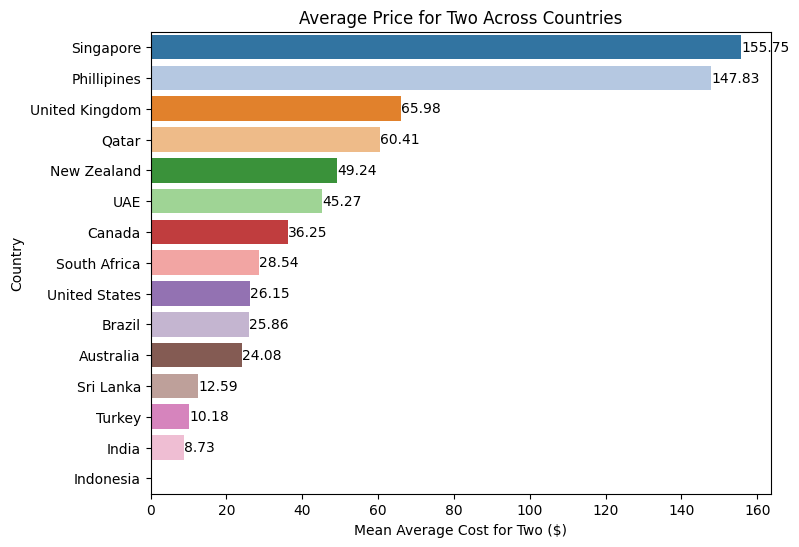

In [100]:
fig = plt.figure(figsize=(8, 6))
plt.title('Average Price for Two Across Countries')
plt.xlabel('Mean Average Cost for Two ($)')
plt.ylabel('Country')

# Assuming 'Average Cost for two' and 'Country' columns are present in the DataFrame df
avg_cost_df = df.groupby('Country').mean()['Average Cost for two ($)']
avg_cost_df = avg_cost_df.sort_values(ascending=False)
avg_cost_df = avg_cost_df.round(2)

ax = sns.barplot(x=avg_cost_df.values, y=avg_cost_df.index)
ax.bar_label(ax.containers[0])
plt.show()


In examining the "Average Cost for Two" in dollars, it becomes evident that Singapore offers the most expensive food among all countries, while India tends to provide the most affordable options.

### Distibution of Avg Cost for Two across all Price range

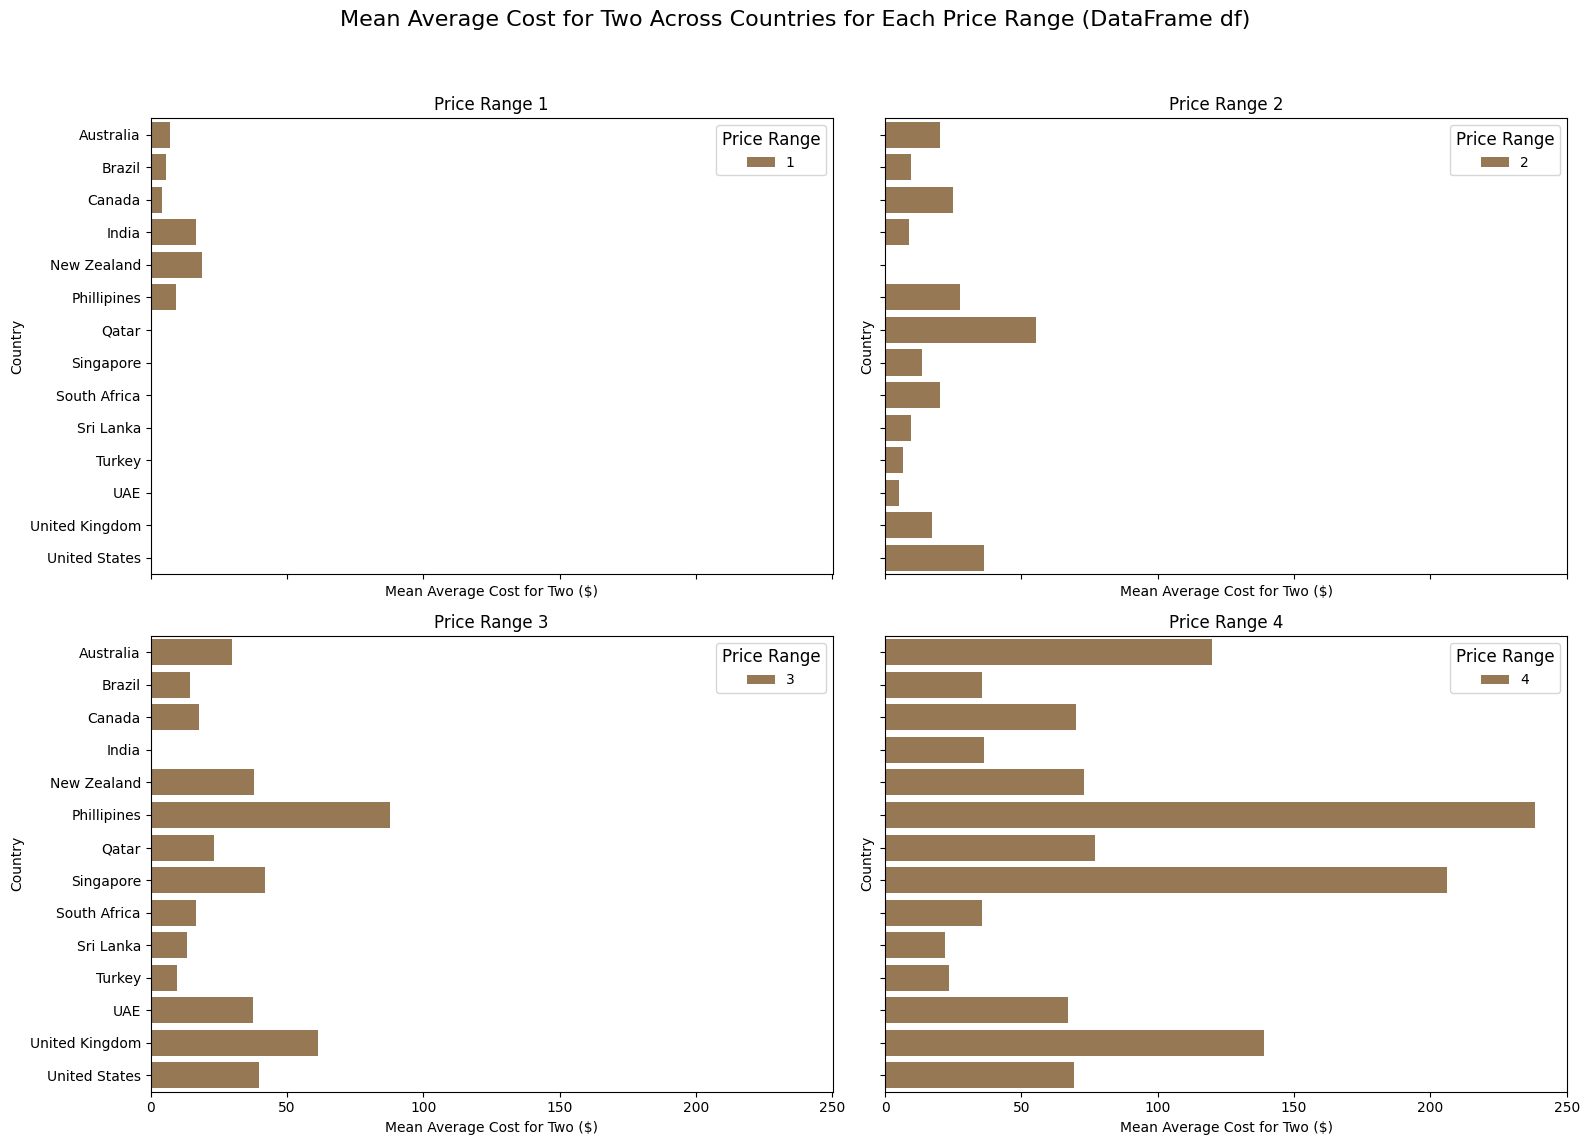

In [101]:
grouped_data_df = df.groupby(['Country', 'Price range'])['Average Cost for two ($)'].mean().reset_index()

# Get the unique price range values
price_ranges_df = sorted(grouped_data_df['Price range'].unique())

# Create the subplots for each price range
fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)

# Flatten the axes for easier indexing
axs = axs.ravel()

# Create the partitioned bar plots for each price range value
for i, price_range in enumerate(price_ranges_df):
    filtered_data_df = grouped_data_df[grouped_data_df['Price range'] == price_range]
    percentage = filtered_data_df['Average Cost for two ($)'].sum() / grouped_data_df[grouped_data_df['Price range'] == price_range]['Average Cost for two ($)'].sum() * 100

    sns.barplot(x='Average Cost for two ($)', y='Country', data=filtered_data_df, hue='Price range', palette='cubehelix', ax=axs[i])
    axs[i].set_title(f'Price Range {price_range}')
    axs[i].legend(title='Price Range', title_fontsize='large')
    axs[i].set_xlabel('Mean Average Cost for Two ($)')
    axs[i].set_ylabel('Country')

plt.suptitle('Mean Average Cost for Two Across Countries for Each Price Range (DataFrame df)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Across various regions, 40% of restaurants predominantly belong to the more economical Price Range 1, while 32%, 14%, and 6% fall into Price Ranges 2, 3, and 4, respectively. This is mainly attributed to the dominance of Indian restaurants in the dataset, exhibiting a similar distribution. Interestingly, the Philippines, the UK, and Singapore showcase a prevalence of higher food prices (Price Range 4), while Indonesia, Turkey, and Sri Lanka tend to have lower prices (Price Range 2).

### Top 10 Expensive Restaurants in India

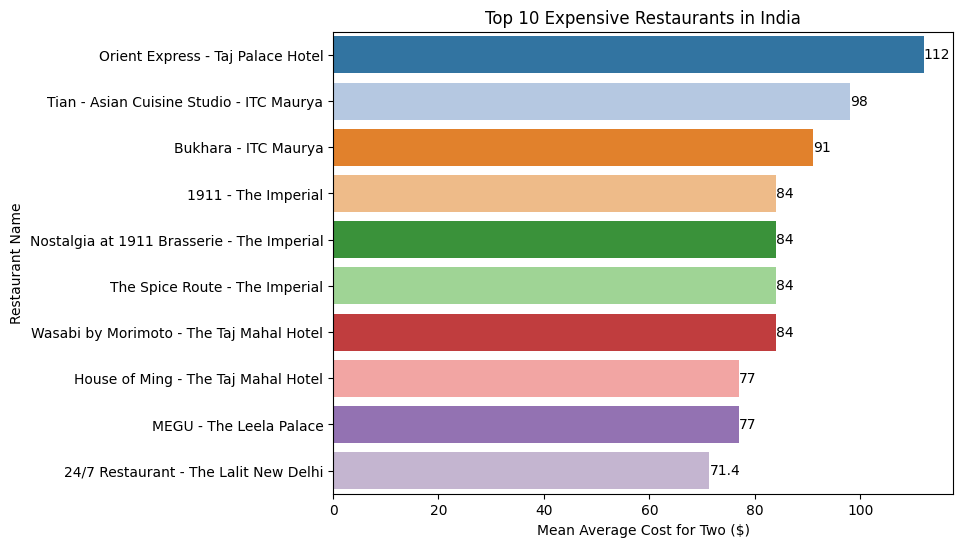

In [102]:
def get_expensive(df, country):
    top_10 = df[df['Country'] == country].groupby('Restaurant Name').max()['Average Cost for two ($)'].nlargest(10)
    names = top_10.index
    cost = top_10.values
    fig = plt.figure(figsize=(8, 6))
    plt.title(f'Top 10 Expensive Restaurants in {country}')
    plt.xlabel('Mean Average Cost for Two ($)')
    plt.ylabel('Restaurant Name')
    ax = sns.barplot(x=cost, y=names)
    ax.bar_label(ax.containers[0])
    plt.show()

get_expensive(df, 'India')

### Top 10 rating Restaraunts:-

In [103]:
df.drop(['Average Cost for two ($)'], axis=1,  inplace = True)

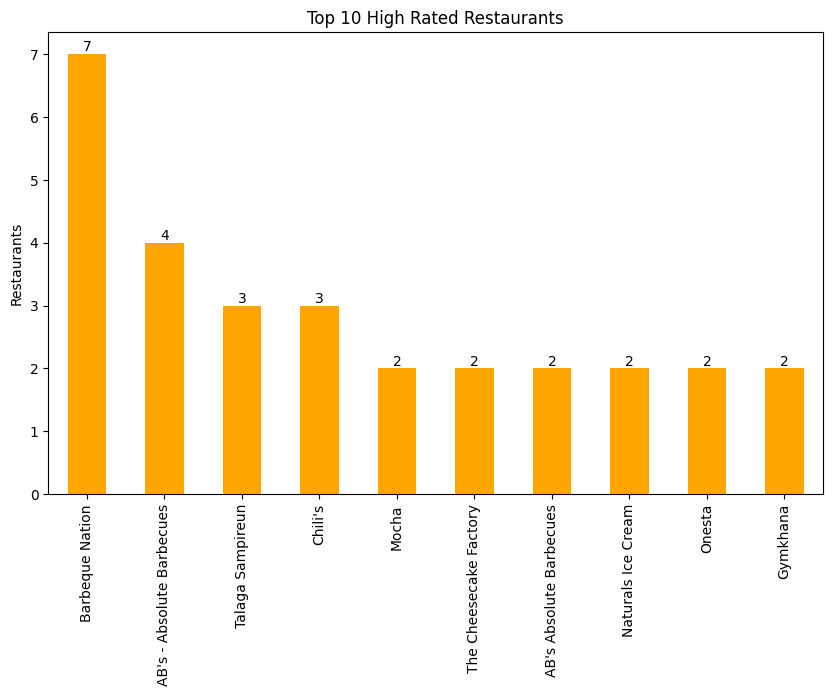

In [104]:
plt.figure(figsize=(10, 6))
r1 = df.loc[df['Aggregate rating'] > 4.5, 'Restaurant Name']
top_r1 = r1.value_counts().head(10)

top_r1.plot(kind='bar', color='orange')

for i, v in enumerate(top_r1):
    plt.text(i, v + 0, str(round(v, 2)), ha='center', va='bottom', color='black')

plt.ylabel("Restaurants")
plt.title("Top 10 High Rated Restaurants")
plt.show()


Barbeque Nation stands out as the highest-rated restaurant among the top 10.

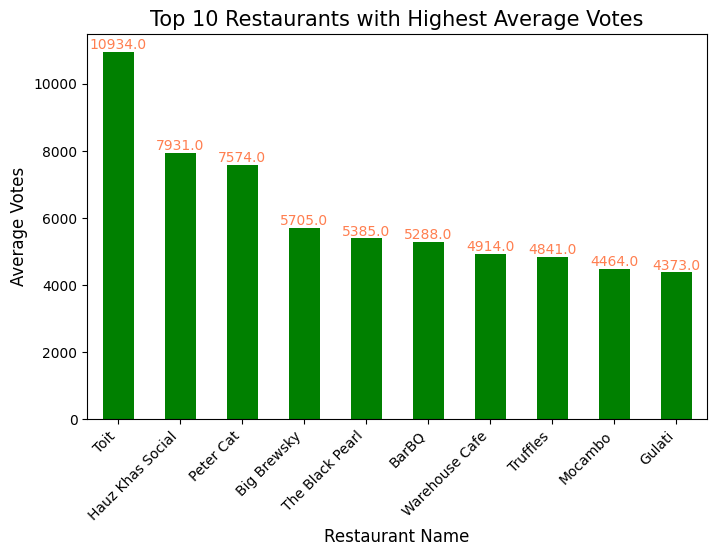

In [105]:

top_10_votes = df.groupby('Restaurant Name').mean()['Votes'].sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 5))
ax = top_10_votes.plot(kind='bar', color='green')

# Adding labels and title
ax.set_title('Top 10 Restaurants with Highest Average Votes', fontsize=15)
ax.set_xlabel('Restaurant Name', fontsize=12)
ax.set_ylabel('Average Votes', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding data labels on top of each bar
for i, v in enumerate(top_10_votes):
    ax.text(i, v + 5, str(round(v, 2)), ha='center', va='bottom', color='coral')

# Display the plot
plt.show()

Among the top 10 restaurants based on votes, Toit has garnered the highest number of votes.

**Multivariant Analysis:-**

<Figure size 500x500 with 0 Axes>

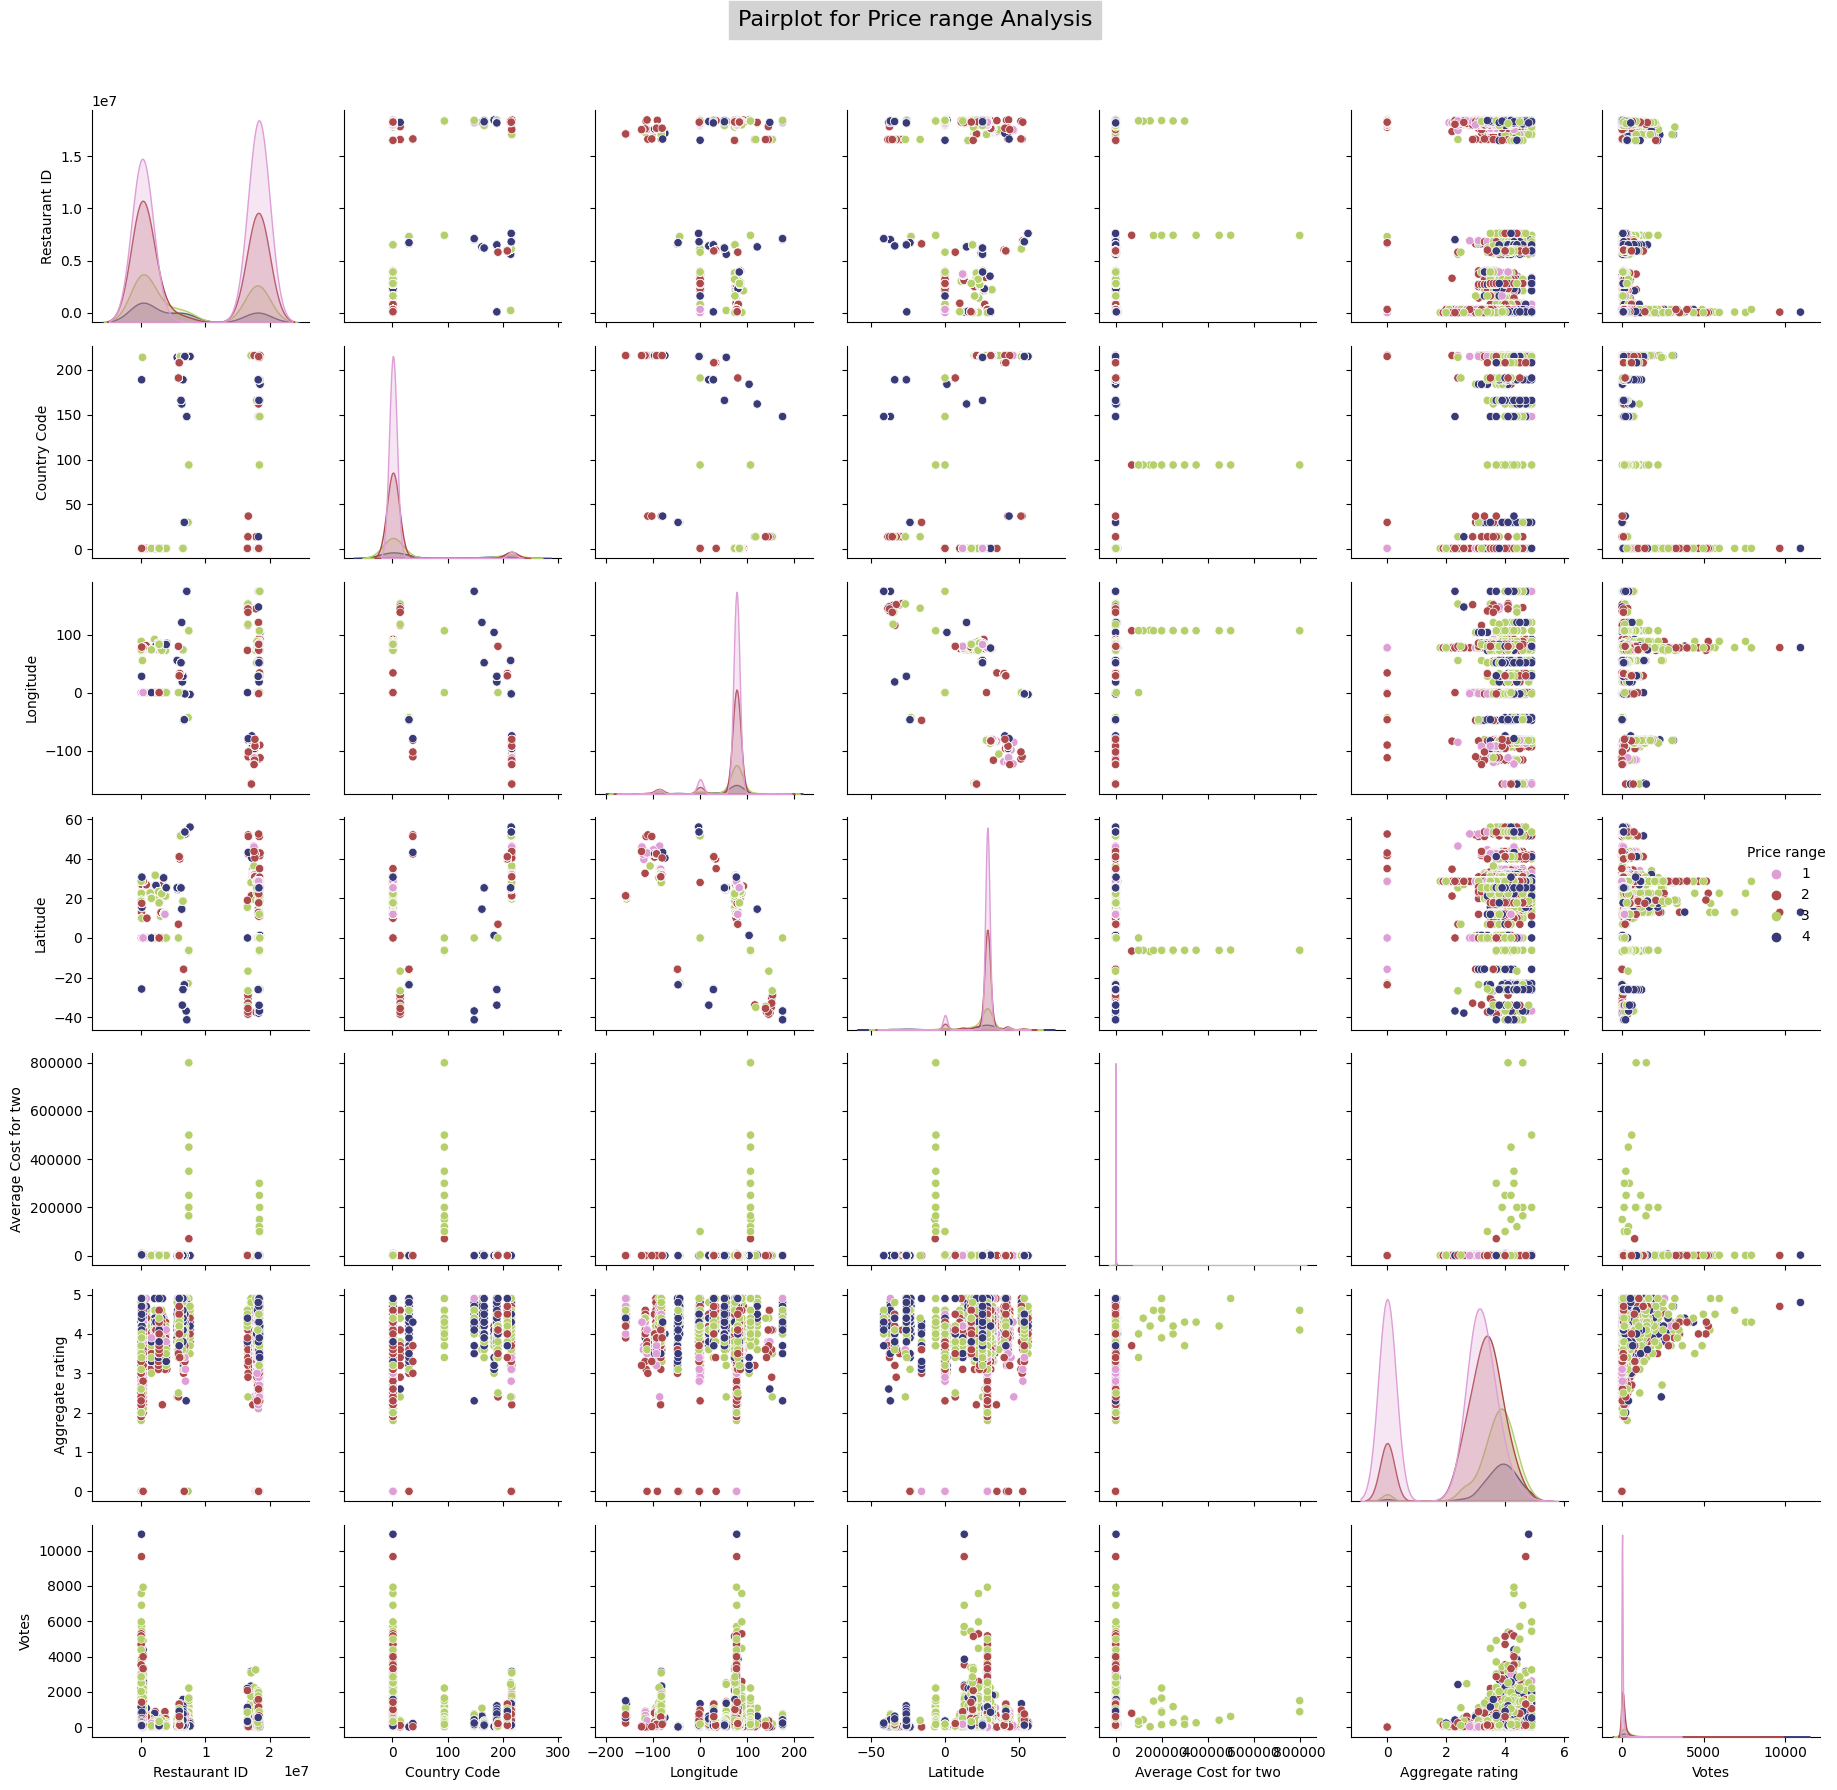

In [106]:
plt.figure(figsize=(5,5))
g = sns.pairplot(df, hue="Price range", palette='tab20b_r', diag_kind="kde")

g.fig.suptitle("Pairplot for Price range Analysis", backgroundcolor='Lightgray', y=1.02, fontsize=16)

g.fig.tight_layout()

plt.show()


The distribution of values in the 'Price range'with others column reveals that certain price ranges are more prevalent than others in the dataset. The most common price range, denoted as 1, appears frequently, followed by other price ranges like 2, 3, and 4. This distribution offers insights into the predominant pricing categories among the restaurants, indicating a higher concentration in the lower-priced ranges (1 and 2) compared to the higher-priced ones (3 and 4).

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Outliers Detection & Handling</b>
 </div>

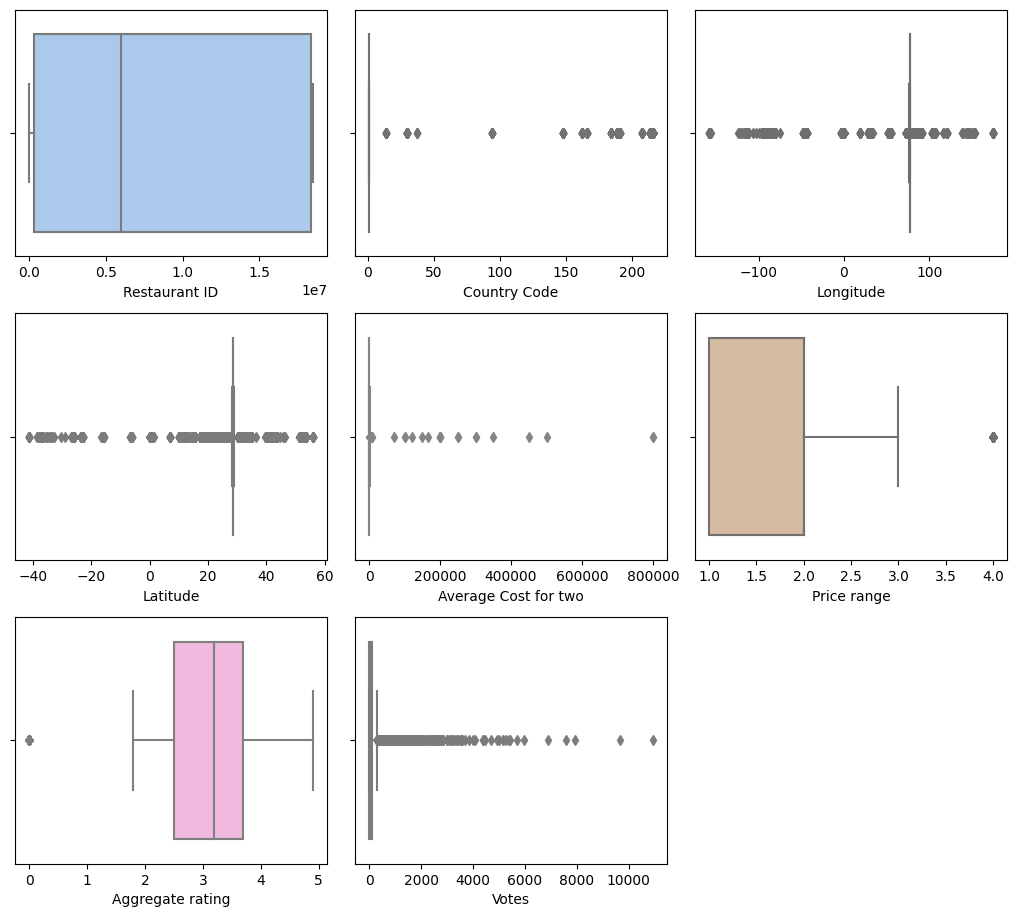

In [107]:
num_cols = len(numerical_cols)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

fig, ax = plt.subplots(ncols=3, nrows=num_rows, figsize=(10, 3 * num_rows))
ax = ax.flatten()

pastel_palette = sns.color_palette('pastel')

for i, col in enumerate(numerical_cols):
    # To handle the case with fewer than 3 numerical columns
    if i >= num_cols:
        break
    # Ensure we don't go out of bounds
    color_idx = i % len(pastel_palette)
    sns.boxplot(x=df[col], ax=ax[i], palette=[pastel_palette[color_idx]])

# If there are remaining subplots, remove them
for j in range(num_cols, 3 * num_rows):
    fig.delaxes(ax[j])

plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

### zscore Method:-

In [108]:
# Features containing outliers
features = df[['Country Code','Longitude','Latitude','Aggregate rating','Votes']]

z=np.abs(zscore(features))

z

Country Code  Longitude  Latitude  Aggregate rating     Votes
0         2.531111   1.372269  1.025581          1.407131  0.365202
1         2.531111   1.371945  1.026647          1.209281  1.009168
2         2.531111   1.372975  1.024131          1.143331  0.262911
3         2.531111   1.372966  1.023775          1.473081  0.483766
4         2.531111   1.372991  1.023854          1.407131  0.167595
...            ...        ...       ...               ...       ...
9546      3.341718   0.847685  1.378025          0.945480  1.467151
9547      3.341718   0.846144  1.376849          1.011430  2.039049
9548      3.341718   0.846305  1.381025          0.681680  1.171903
9549      3.341718   0.846272  1.381221          0.879530  1.729853
9550      3.341718   0.846513  1.374571          0.879530  1.009168

[9551 rows x 5 columns]

In [109]:
threshold = 3
np.where(z>3)
df_new = df[(z<3).all(axis=1)]
df_new.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes      Country  
0   Excellent    314  Phillipines  
1   Excellent    591  Phillipines  
2   Very Good    270  Phillipines  
3   Excellent    365  Phillipines  
4   Excellent    229  Phillipines

In [110]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df_new.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df_new.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (9551, 22)
Shape of the dataframe after removing outliers:  (8581, 22)
Percentage of data loss post outlier removal:  10.15600460684745


### IQR Method

In [111]:
#1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

#IQR
IQR=Q3 - Q1
df2=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [112]:

print("Old DataFrame data in Rows and Column:",df.shape)
print("\nNew DataFrame data in Rows and Column:",df.shape)
print("\nTotal Dropped rows:",df.shape[0]-df2.shape[0])
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df2.shape[0])/df.shape[0]*100)

Old DataFrame data in Rows and Column: (9551, 22)

New DataFrame data in Rows and Column: (9551, 22)

Total Dropped rows: 4438
Percentage of data loss post outlier removal:  46.46633860328762


A total of 46.47% of the data was eliminated when using the IQR method to
remove outliers. Therefore, the IQR method may not be the suitable choice for outlier removal, and we will opt for the Z-score method instead as data loss is only 10.16%.

* Outliers have removed from numerical columns as the concept of outliers is more applicable to numerical data, where values can be quantitatively measured and compared. Object columns, with their non-numeric nature, don't fit the traditional definition of outliers. Instead, dealing with object columns involves strategies like encoding categorical data, handling missing values, or preserving the unique characteristics of the data.

In [113]:
# Dropped the 'Restaurant ID' as it is holding unique identifiers numbers onl, which are not directly related to target variable.
df_new.drop("Restaurant ID",axis=1,inplace=True)

In [114]:
# The 'Switch to order menu' feature is represented solely by the value 'No' in the dataset, and it has limited relevance or contribution to the target variable.
df_new.drop("Switch to order menu",axis=1,inplace=True)

In [115]:
# The 'Restaurant Name' column is being excluded from the analysis as it contains only unique values and represents individual restaurant names,
# which may not contribute significantly to the overall insights or patterns in the dataset.
df_new.drop("Restaurant Name",axis=1,inplace=True)

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Checking the Skewness</b>
 </div>

In [117]:
df_new.skew()

Country Code            10.805559
Longitude               -3.496889
Latitude                -3.149880
Average Cost for two    36.956533
Price range              1.022024
Aggregate rating        -0.878228
Votes                    3.627893
dtype: float64

#'Price range'  and 'Average Cost for two' : price range data are behaving as categorical type and 'Average Cost for two'target. Hence, I will not remove the skewness from thses columns.

In [132]:
df_1 = copy.deepcopy(df_new)
df_1.head()

Country Code              City  \
0           162       Makati City   
1           162       Makati City   
2           162  Mandaluyong City   
3           162  Mandaluyong City   
4           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  Price range  \
0               Yes                  No                No            3   
1               Yes                  No                No            3   
2               Yes                  No                No            4   
3                No                  No                No            4   
4               Yes                  No                No            4   

   Aggregate rating Rating color Rating text  Votes      Country  
0               4.8   Dark Green   Excellent    314  Phillipines  
1               4.5   Dark Green   Excellent    591  Phillipines  
2               4.4        Green   Very Good    270  Phillipines  
3               4.9   Dark Green   Excellent    365  Phillipines  
4               4.8   Dark Green   Excellent    229  Phillipines

In [133]:
PT = PowerTransformer(method='yeo-johnson')

df_1[['Country Code','Longitude','Latitude', 'Aggregate rating','Votes']] = PT.fit_transform(df_1[['Country Code','Longitude','Latitude','Aggregate rating','Votes']].values)

df_1.head()

Country Code              City  \
0     10.374018       Makati City   
1     10.374018       Makati City   
2     10.374018  Mandaluyong City   
3     10.374018  Mandaluyong City   
4     10.374018  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose  Longitude  Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...   6.847510 -2.827800   
1  Little Tokyo, Legaspi Village, Makati City, Ma...   6.844856 -2.828685   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...   6.853300 -2.826593   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...   6.853230 -2.826297   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...   6.853434 -2.826363   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  Price range  \
0               Yes                  No                No            3   
1               Yes                  No                No            3   
2               Yes                  No                No            4   
3                No                  No                No            4   
4               Yes                  No                No            4   

   Aggregate rating Rating color Rating text     Votes      Country  
0          1.968643   Dark Green   Excellent  1.406296  Phillipines  
1          1.645483   Dark Green   Excellent  1.749111  Phillipines  
2          1.540419        Green   Very Good  1.325017  Phillipines  
3          2.078995   Dark Green   Excellent  1.487542  Phillipines  
4          1.968643   Dark Green   Excellent  1.236603  Phillipines

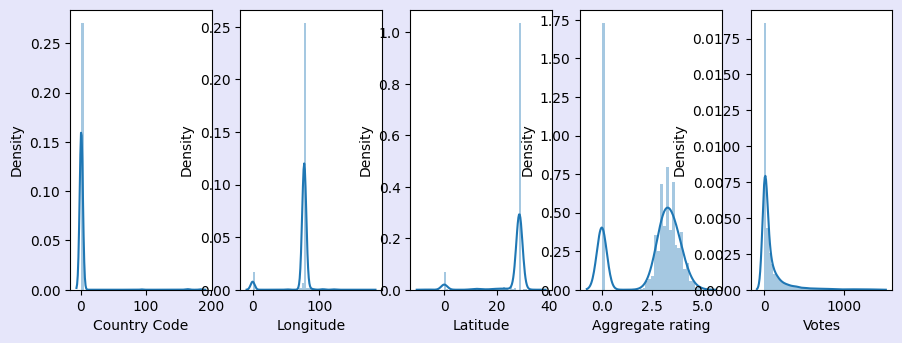

In [134]:
plt.figure(figsize=(15,8), facecolor='lavender')
plotnumber = 1

for column in df_1[['Country Code','Longitude','Latitude' ,'Aggregate rating','Votes']]:
    if plotnumber<=9:
        ax = plt.subplot(2,7,plotnumber)
        sns.distplot(df_new[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()


Skewness is now more balanced compared to previous conditions.

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Transforming Categorical Data with LabelEncoder</b>
 </div>

In [136]:
# Use LabelEncoder for other columns
en = LabelEncoder()
for column in df_1.columns:
    if df_1[column].dtypes == "object" and column != 'Price range':
        df_1[column] = en.fit_transform(df_1[column].values)

# Display the modified DataFrame
df_1.head()

Country Code  City  Address  Locality  Locality Verbose  Longitude  \
0     10.374018    30     7747       101               102   6.847510   
1     10.374018    30     5259       385               393   6.844856   
2     10.374018    31     3956       189               195   6.853300   
3     10.374018    31     7752       560               573   6.853230   
4     10.374018    31     7751       560               573   6.853434   

   Latitude  Cuisines  Average Cost for two  Currency  Has Table booking  \
0 -2.827800       663                  1100         0                  1   
1 -2.828685       791                  1200         0                  1   
2 -2.826593      1281                  4000         0                  1   
3 -2.826297       802                  1500         0                  0   
4 -2.826363       801                  1500         0                  1   

   Has Online delivery  Is delivering now  Price range  Aggregate rating  \
0                    0                  0            3          1.968643   
1                    0                  0            3          1.645483   
2                    0                  0            4          1.540419   
3                    0                  0            4          2.078995   
4                    0                  0            4          1.968643   

   Rating color  Rating text     Votes  Country  
0             0            1  1.406296        3  
1             0            1  1.749111        3  
2             1            5  1.325017        3  
3             0            1  1.487542        3  
4             0            1  1.236603        3

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Checking the Correlation</b>
 </div>

In [138]:
df_1.corr()

Country Code      City   Address  Locality  \
Country Code              1.000000 -0.007163 -0.012291 -0.030490   
City                     -0.007163  1.000000 -0.096701 -0.027897   
Address                  -0.012291 -0.096701  1.000000  0.150242   
Locality                 -0.030490 -0.027897  0.150242  1.000000   
Locality Verbose         -0.029502 -0.032088  0.151993  0.999028   
Longitude                 0.325017  0.043267 -0.021322 -0.028808   
Latitude                 -0.239886  0.089090  0.015635  0.017860   
Cuisines                 -0.017370  0.014592 -0.016084 -0.014457   
Average Cost for two      0.372625 -0.040157  0.014823 -0.010197   
Currency                  0.089340 -0.142463  0.013012 -0.017597   
Has Table booking         0.019185 -0.000907 -0.011060 -0.069709   
Has Online delivery      -0.059493 -0.015403 -0.008652 -0.048989   
Is delivering now        -0.006080 -0.023488  0.029232 -0.011213   
Price range               0.191982 -0.113655 -0.017543 -0.100549   
Aggregate rating          0.117949 -0.113102 -0.097476 -0.155074   
Rating color             -0.082153  0.070507  0.055086  0.006116   
Rating text               0.054642 -0.058228  0.049306 -0.000507   
Votes                     0.095649 -0.100725 -0.126780 -0.178238   
Country                   0.921275  0.019232 -0.026790 -0.032059   

                      Locality Verbose  Longitude  Latitude  Cuisines  \
Country Code                 -0.029502   0.325017 -0.239886 -0.017370   
City                         -0.032088   0.043267  0.089090  0.014592   
Address                       0.151993  -0.021322  0.015635 -0.016084   
Locality                      0.999028  -0.028808  0.017860 -0.014457   
Locality Verbose              1.000000  -0.029541  0.016844 -0.015593   
Longitude                    -0.029541   1.000000  0.552348  0.003749   
Latitude                      0.016844   0.552348  1.000000  0.037844   
Cuisines                     -0.015593   0.003749  0.037844  1.000000   
Average Cost for two         -0.009689   0.149406 -0.113185 -0.002251   
Currency                     -0.015902  -0.244376  0.047092  0.026152   
Has Table booking            -0.068735   0.075554  0.052300  0.039827   
Has Online delivery          -0.049339   0.100140  0.163170 -0.039916   
Is delivering now            -0.011162   0.010594  0.022718  0.005148   
Price range                  -0.097486   0.091691 -0.132604  0.020394   
Aggregate rating             -0.153835   0.181875 -0.033536 -0.056146   
Rating color                  0.006701  -0.110052 -0.001172 -0.047743   
Rating text                   0.001226  -0.067196 -0.188908 -0.060822   
Votes                        -0.176247   0.194237 -0.024558 -0.029642   
Country                      -0.031168   0.258103 -0.211880 -0.020644   

                      Average Cost for two  Currency  Has Table booking  \
Country Code                      0.372625  0.089340           0.019185   
City                             -0.040157 -0.142463          -0.000907   
Address                           0.014823  0.013012          -0.011060   
Locality                         -0.010197 -0.017597          -0.069709   
Locality Verbose                 -0.009689 -0.015902          -0.068735   
Longitude                         0.149406 -0.244376           0.075554   
Latitude                         -0.113185  0.047092           0.052300   
Cuisines                         -0.002251  0.026152           0.039827   
Average Cost for two              1.000000  0.186505           0.012262   
Currency                          0.186505  1.000000          -0.049867   
Has Table booking                 0.012262 -0.049867           1.000000   
Has Online delivery              -0.019524 -0.005315           0.079014   
Is delivering now                -0.001874 -0.000543          -0.018131   
Price range                       0.087162  0.019422           0.571240   
Aggregate rating                  0.066908  0.005944           0.227108   


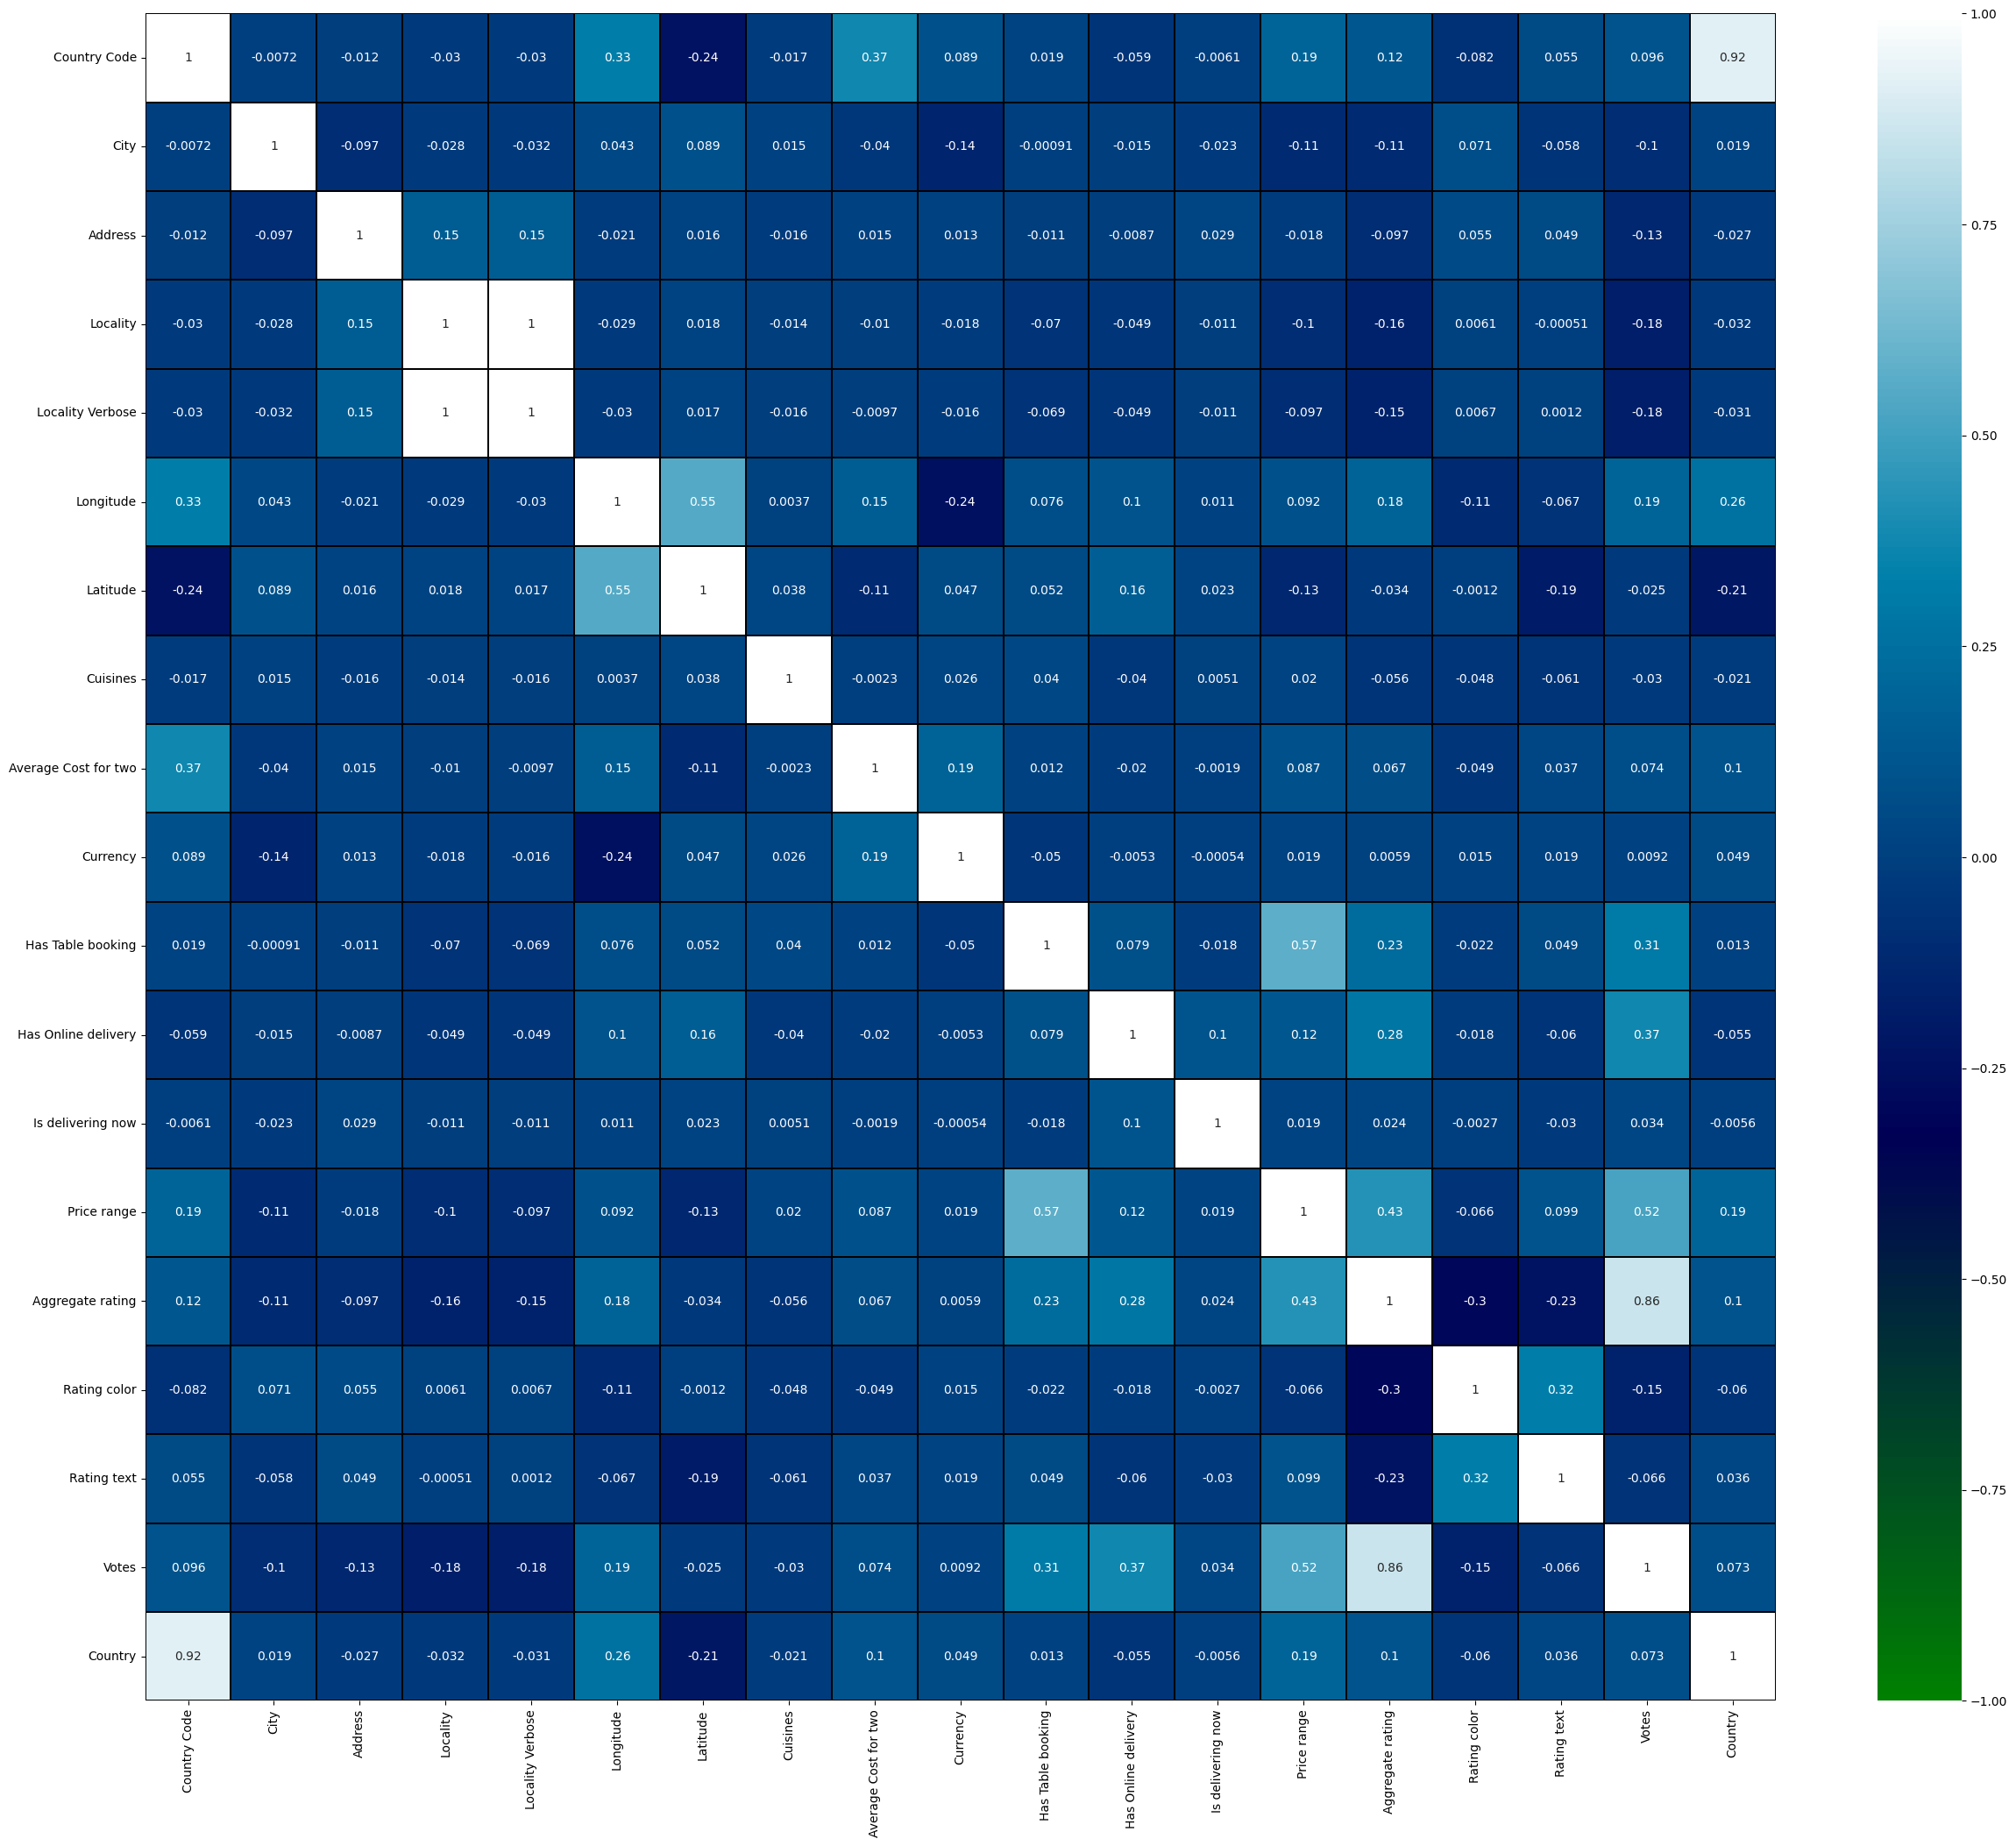

In [139]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(30,25))
sns.heatmap(df_1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':10},cmap="ocean")
plt.yticks(rotation=0);

**Observations from the correlation matrix:**

**Strong Positive Correlations:**

* "Country" has a very strong positive correlation with "Country Code" (0.921275).
* "Longitude" and "Latitude" have a moderately strong positive correlation (0.552348).
* "Has Table booking" and "Price range" show a moderate positive correlation (0.571240).

**Moderate Positive Correlations:**

* "Aggregate rating" has a moderate positive correlation with "Votes" (0.857934) and "Price range" (0.429045).
* "Country Code" and "Longitude" (0.325017) have a moderate positive correlation.
* "Votes" and "Has Online delivery" have a moderate positive correlation (0.367275).

**Moderate Negative Correlations:**

* "Aggregate rating" has a moderate negative correlation with "Rating text" (-0.300195).

**Strong Negative Correlations:**

* "Longitude" has a strong negative correlation with "Latitude" (-0.239886).
* "Rating text" and "Aggregate rating" have a strong negative correlation (-0.300195).
* "Country" has a strong negative correlation with "Latitude" (-0.211880).

**Other Observations:**

* Features such as "Has Online delivery," "Is delivering now," and "Address" show weak correlations with most other features.
* "Currency" has a weak positive correlation with "Country Code" (0.089340).
* "Average Cost for two" has a weak positive correlation with "Aggregate rating" (0.066908) and "Votes" (0.073699).
* "Price range" has a weak positive correlation with "Country" (0.100105).
* "Rating color" has a weak positive correlation with "Country Code" (-0.082153).

Latitude               -0.113185
Rating color           -0.049277
City                   -0.040157
Has Online delivery    -0.019524
Locality               -0.010197
Locality Verbose       -0.009689
Cuisines               -0.002251
Is delivering now      -0.001874
Has Table booking       0.012262
Address                 0.014823
Rating text             0.036571
Aggregate rating        0.066908
Votes                   0.073699
Price range             0.087162
Country                 0.100105
Longitude               0.149406
Currency                0.186505
Country Code            0.372625
Average Cost for two    1.000000
Name: Average Cost for two, dtype: float64


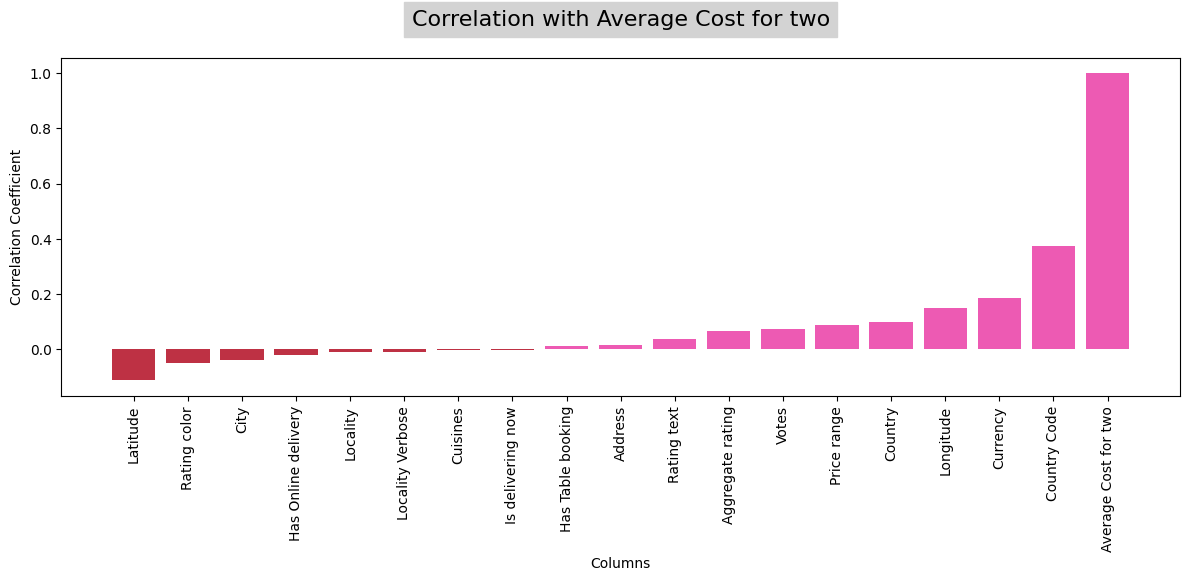

In [141]:
# Correlation of columns with Target variable 'Average Cost for two'
correlations = df_1.corr()['Average Cost for two'].sort_values()
print(correlations)

colors = ['#BE3144' if c < 0 else '#ED5AB3' for c in correlations]
plt.figure(figsize=(12,6))
plt.bar(correlations.index, correlations, color=colors)
plt.title('Correlation with Average Cost for two', backgroundcolor='lightgray', y=1.07, fontsize=16)
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observations for correlation with respect to the target variable (Average Cost for two):**

* The feature with the highest positive correlation to the target variable (Average Cost for two) is "Country Code" (0.372625).
* Following that, "Currency" (0.186505), "Longitude" (0.149406), and "Country" (0.100105) also show positive correlations with the target.
* Features such as "Votes" (0.073699), "Aggregate rating" (0.066908), and "Rating text" (0.036571) have moderate positive correlations with the target.
* On the negative side, the features "Latitude" (-0.113185), "Rating color" (-0.049277), and "City" (-0.040157) exhibit negative correlations with the target variable.
* Other features such as "Has Online delivery," "Locality," "Locality Verbose," "Cuisines," "Is delivering now," "Has Table booking," "Address," and "Price range" have relatively low correlations with the target variable.

Latitude               -0.132604
City                   -0.113655
Locality               -0.100549
Locality Verbose       -0.097486
Rating color           -0.066323
Address                -0.017543
Is delivering now       0.018727
Currency                0.019422
Cuisines                0.020394
Average Cost for two    0.087162
Longitude               0.091691
Rating text             0.099497
Has Online delivery     0.123895
Country                 0.188576
Country Code            0.191982
Aggregate rating        0.429045
Votes                   0.516381
Has Table booking       0.571240
Price range             1.000000
Name: Price range, dtype: float64


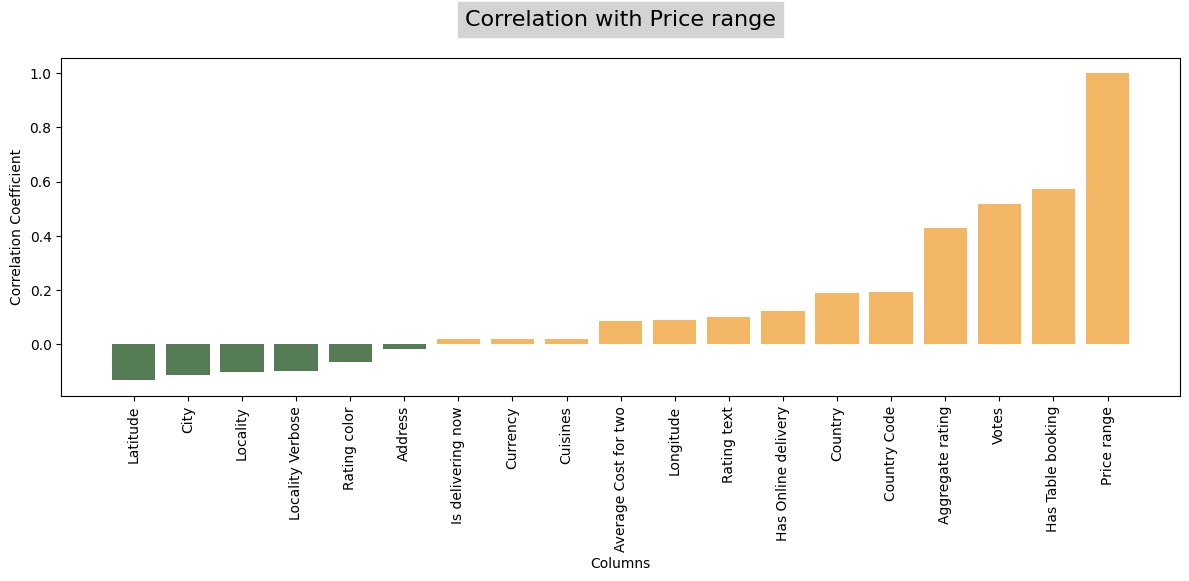

In [143]:
# Correlation of columns with Target variable 'Average Cost for two'
correlations = df_1.corr()['Price range'].sort_values()
print(correlations)

colors = ['#557C55' if c < 0 else '#F3B664' for c in correlations]
plt.figure(figsize=(12,6))
plt.bar(correlations.index, correlations, color=colors)
plt.title('Correlation with Price range', backgroundcolor='lightgray', y=1.07, fontsize=16)
plt.xlabel('Columns')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observations for correlation with respect to the target variable (Price range)**:

* The feature with the highest positive correlation to the target variable (Price range) is "Has Table booking" (0.571240).

* Following that, "Votes" (0.516381), "Aggregate rating" (0.429045), and "Country Code" (0.191982) also show positive correlations with the target.
On the negative side, the features "Latitude" (-0.132604), "City" (-0.113655), "Locality" (-0.100549), and "Locality Verbose" (-0.097486) exhibit relatively stronger negative correlations with the target variable.

* Other features such as "Rating color," "Address," "Is delivering now," "Currency," "Cuisines," "Average Cost for two," "Longitude," "Rating text," "Has Online delivery," and "Country" have moderate to low correlations with the target variable.

### Task 1: Regression Problem: Predicting Average Cost for Two

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Splitting Dataset for Train & Test</b>
 </div>

In [144]:
# Splitting data in target and dependent feature
X = df_1.drop(['Average Cost for two'], axis =1)
Y = df_1['Average Cost for two']

X.shape, Y.shape

((8581, 18), (8581,))

In [145]:
sc=StandardScaler()

X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X

Country Code      City   Address  Locality  Locality Verbose  Longitude  \
0        10.374018 -0.443653  1.612367 -1.601718         -1.569456   6.847510   
1        10.374018 -0.443653  0.525727 -0.274418         -0.305613   6.844856   
2        10.374018 -0.333548 -0.043362 -1.190442         -1.165547   6.853300   
3        10.374018 -0.333548  1.614551  0.543460          0.476145   6.853230   
4        10.374018 -0.333548  1.614115  0.543460          0.476145   6.853434   
...            ...       ...       ...       ...               ...        ...   
8576     10.374018 -2.095227 -1.184160  1.347317          1.396882  -2.040730   
8577     10.374018 -2.095227 -1.406467  1.436115          1.479401  -2.040507   
8578     10.374018 -2.095227  0.283329  1.464157          1.505460  -2.041612   
8579     10.374018 -2.095227 -0.368306  1.543608          1.587978  -2.039578   
8580     10.374018 -2.095227  1.551659  1.543608          1.587978  -2.039441   

      Latitude  Cuisines   Currency  Has Table booking  Has Online delivery  \
0    -2.827800 -0.167073 -10.565592           2.655131            -0.617182   
1    -2.828685  0.150511 -10.565592           2.655131            -0.617182   
2    -2.826593  1.366261 -10.565592           2.655131            -0.617182   
3    -2.826297  0.177803 -10.565592          -0.376629            -0.617182   
4    -2.826363  0.175322 -10.565592           2.655131            -0.617182   
...        ...       ...        ...                ...                  ...   
8576 -0.893083 -0.427591  15.826858          -0.376629            -0.617182   
8577 -0.884401 -0.010762  15.826858          -0.376629            -0.617182   
8578 -0.908127  1.601968  15.826858          -0.376629            -0.617182   
8579 -0.909135 -0.008281  15.826858          -0.376629            -0.617182   
8580 -0.905949 -0.020687  15.826858          -0.376629            -0.617182   

      Is delivering now  Price range  Aggregate rating  Rating color  \
0             -0.063071     1.502436          1.968643     -2.197932   
1             -0.063071     1.502436          1.645483     -2.197932   
2             -0.063071     2.673515          1.540419     -1.479630   
3             -0.063071     2.673515          2.078995     -2.197932   
4             -0.063071     2.673515          1.968643     -2.197932   
...                 ...          ...               ...           ...   
8576          -0.063071     2.673515          1.035361      1.393578   
8577          -0.063071     2.673515          1.540419     -1.479630   
8578          -0.063071     2.673515          1.436696     -1.479630   
8579          -0.063071     2.673515          1.645483     -2.197932   
8580          -0.063071     2.673515          1.035361      1.393578   

      Rating text     Votes    Country  
0       -0.397745  1.406296   8.570784  
1       -0.397745  1.749111   8.570784  
2        2.080417  1.325017   8.570784  
3       -0.397745  1.487542   8.570784  
4       -0.397745  1.236603   8.570784  
...           ...       ...        ...  
8576     0.221796  1.156044  11.457314  
8577     2.080417  0.586465  11.457314  
8578     2.080417  0.631203  11.457314  
8579    -0.397745  0.992766  11.457314  
8580     0.221796  0.841683  11.457314  

[8581 rows x 18 columns]

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Checking the Multicollinearity</b>
 </div>

In [146]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif["FEATURES"]=X.columns
    print(vif)
vif_cal()

    VIF FACTOR             FEATURES
0     9.166323         Country Code
1     1.088351                 City
2     1.060854              Address
3   524.046195             Locality
4   524.024186     Locality Verbose
5     3.234973            Longitude
6     2.901701             Latitude
7     1.024228             Cuisines
8     1.439883             Currency
9     1.580140    Has Table booking
10    1.236498  Has Online delivery
11    1.014658    Is delivering now
12    2.030662          Price range
13    4.733177     Aggregate rating
14    1.244518         Rating color
15    1.317395          Rating text
16    5.089959                Votes
17    7.227592              Country


In [147]:
X.drop("Locality",axis=1,inplace=True)

In [148]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif["FEATURES"]=X.columns
    print(vif)
vif_cal()

    VIF FACTOR             FEATURES
0     9.165897         Country Code
1     1.081732                 City
2     1.059847              Address
3     1.055332     Locality Verbose
4     3.233489            Longitude
5     2.900895             Latitude
6     1.023626             Cuisines
7     1.439745             Currency
8     1.579779    Has Table booking
9     1.235712  Has Online delivery
10    1.014658    Is delivering now
11    2.027239          Price range
12    4.731814     Aggregate rating
13    1.244411         Rating color
14    1.317021          Rating text
15    5.084902                Votes
16    7.227561              Country


We can now confirm that multicollinearity has been successfully addressed in all columns, as the VIF values for each column are now below 10. With this issue resolved, we are ready to proceed with model development.

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Model Devlopments</b>
 </div>

Model: Linear_Regression
R2 score: 0.4371776386512428
Mean absolute error: 1100.6000212719628
Mean squared error: 164157212.27437228
Root Mean Squared Error: 12812.385112631147
Best R2 Score: 0.8532595745852578
Best Random State: 94


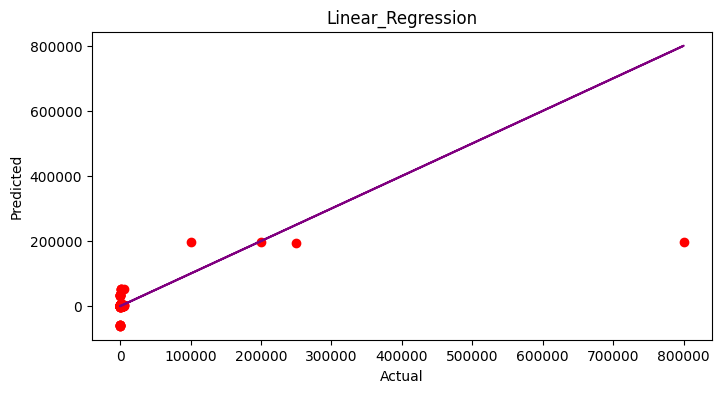

Model: Ridge_
R2 score: 0.43691462063596276
Mean absolute error: 1099.1014434646959
Mean squared error: 164233926.1847131
Root Mean Squared Error: 12815.378503372935
Best R2 Score: 0.8530950222354778
Best Random State: 94


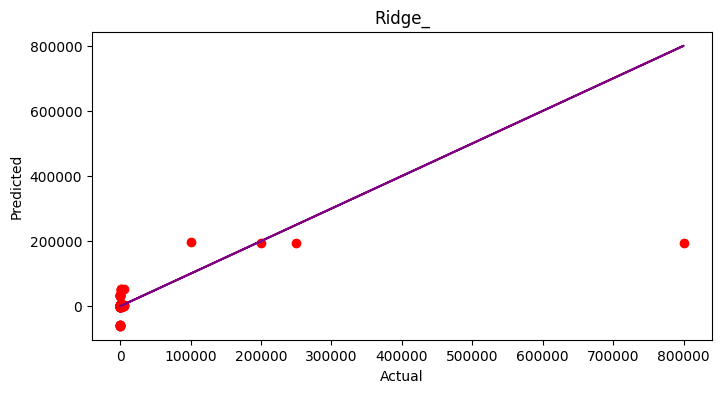

Model: Lasso_
R2 score: 0.4371322848267446
Mean absolute error: 1097.5139283543815
Mean squared error: 164170440.52880368
Root Mean Squared Error: 12812.901331423875
Best R2 Score: 0.8532467862617261
Best Random State: 94


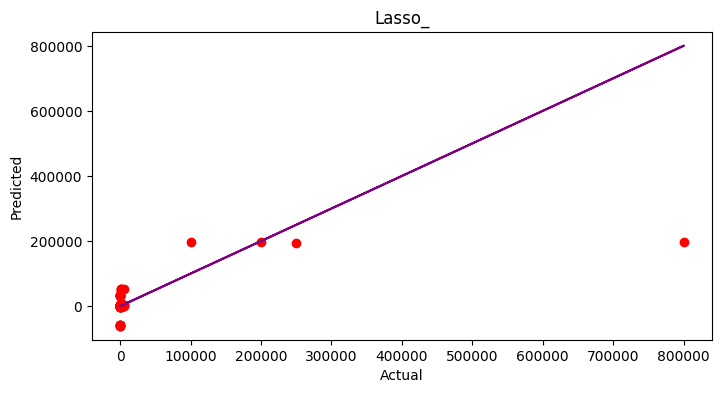

Model: Elastic_Net
R2 score: 0.15822630609588506
Mean absolute error: 1182.7867126825076
Mean squared error: 245518359.6935552
Root Mean Squared Error: 15669.025486403269
Best R2 Score: 0.47600521291626685
Best Random State: 5


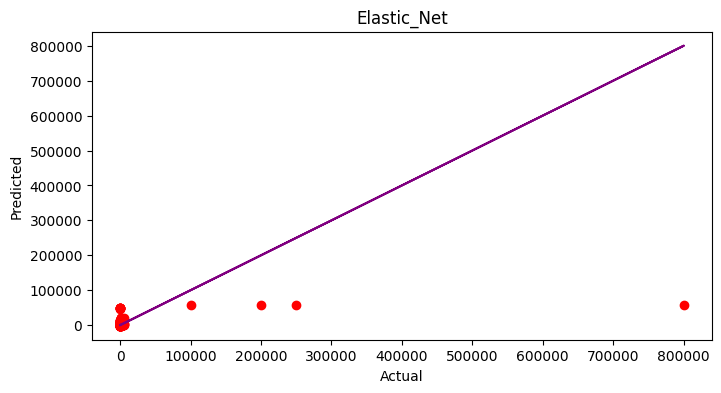

Model: SGD_Regressor
R2 score: 0.3812394504627581
Mean absolute error: 1582.9821671369216
Mean squared error: 180472585.76219067
Root Mean Squared Error: 13434.008551515466
Best R2 Score: 0.8521740142739911
Best Random State: 94


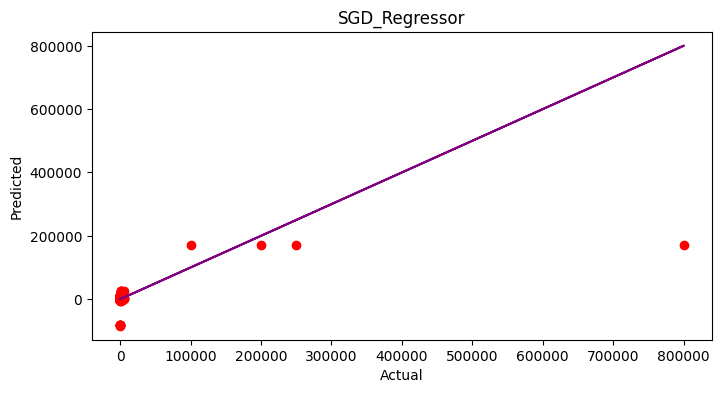

Model: Decision_Tree_Regressor
R2 score: 0.19356690824091438
Mean absolute error: 569.4970873786408
Mean squared error: 235210640.72815534
Root Mean Squared Error: 15336.578520913827
Best R2 Score: 0.9980749908705733
Best Random State: 71


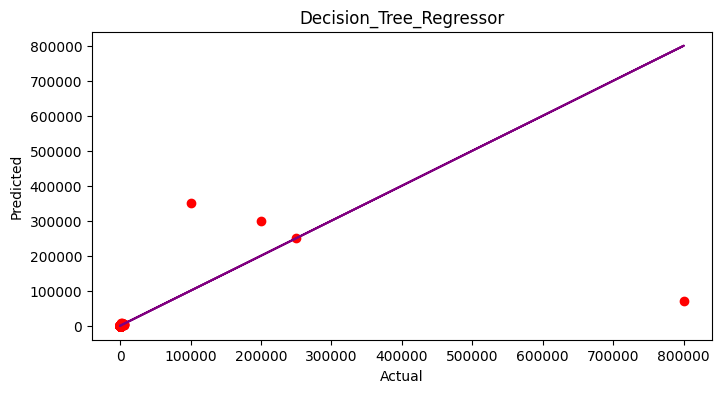

Model: Random_Forest_Regressor
R2 score: 0.443371066739479
Mean absolute error: 480.933566343042
Mean squared error: 162350788.15335792
Root Mean Squared Error: 12741.694869732124
Best R2 Score: 0.9897660533149215
Best Random State: 98


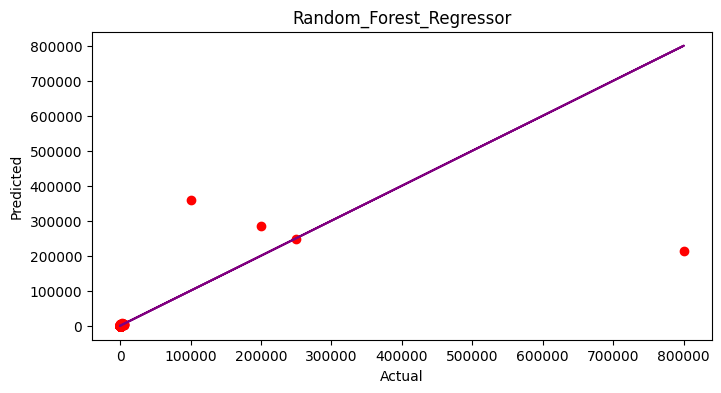

Model: Gradient_Boosting_Regressor
R2 score: 0.27329282336580285
Mean absolute error: 554.4161235702954
Mean squared error: 211957151.0452622
Root Mean Squared Error: 14558.748265055694
Best R2 Score: 0.9593282531228297
Best Random State: 77


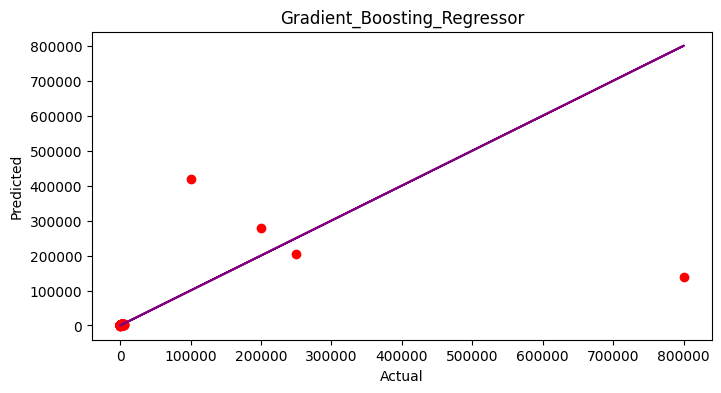

Model: AdaBoost_Regressor
R2 score: 0.31427325702611375
Mean absolute error: 651.1107597098859
Mean squared error: 200004474.30486006
Root Mean Squared Error: 14142.293813411601
Best R2 Score: 0.9744753210628164
Best Random State: 68


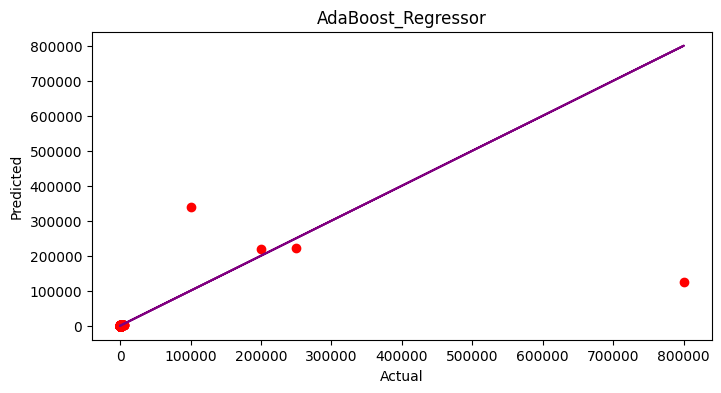

Model: Bagging_Regressor
R2 score: 0.526375146076231
Mean absolute error: 499.03631067961163
Mean squared error: 138141163.22184467
Root Mean Squared Error: 11753.34689447413
Best R2 Score: 0.989880784620731
Best Random State: 74


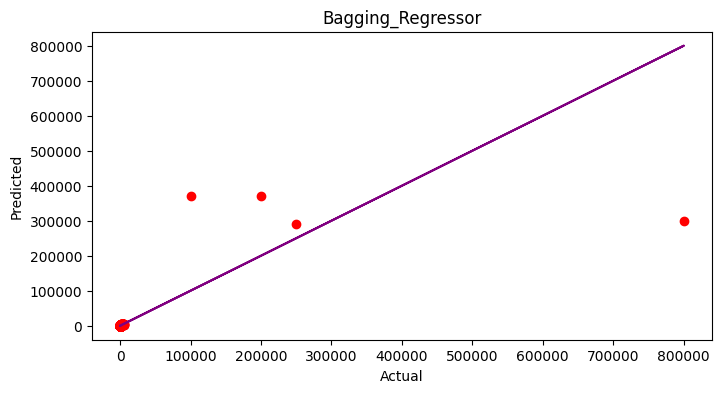

Model: XGBoost_Regressor
R2 score: 0.35825364889002187
Mean absolute error: 532.3522222807801
Mean squared error: 187176806.07609203
Root Mean Squared Error: 13681.257474226995
Best R2 Score: 0.9835136238104366
Best Random State: 64


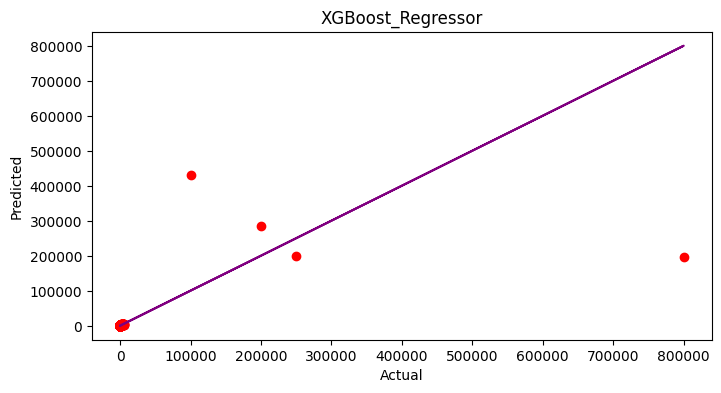

Model: SVR_Linear
R2 score: 0.0014502490485117647
Mean absolute error: 674.0621477161104
Mean squared error: 291244901.92721975
Root Mean Squared Error: 17065.89880220845
Best R2 Score: 0.7269282631954336
Best Random State: 91


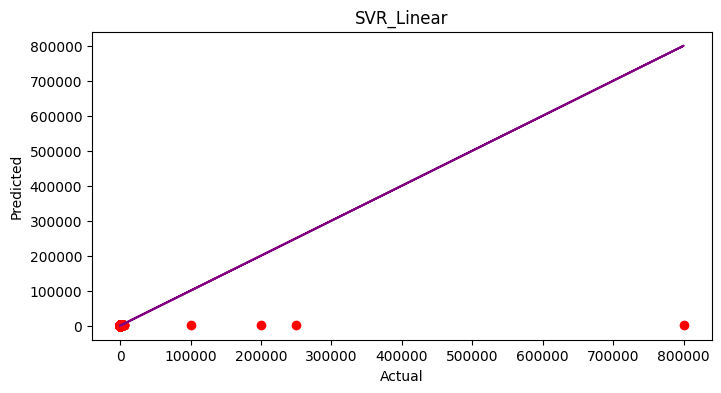

Model: SVR_Polynomial
R2 score: 0.030116308897133348
Mean absolute error: 762.1472915040376
Mean squared error: 282883932.6502295
Root Mean Squared Error: 16819.15374358144
Best R2 Score: 0.32010022094521906
Best Random State: 91


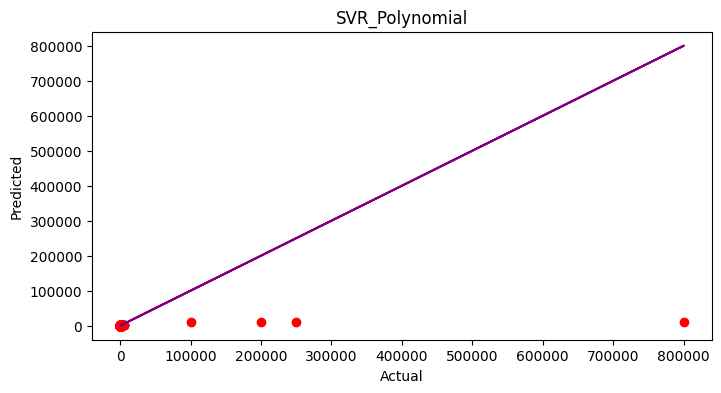

Model: SVR_RBF
R2 score: -0.0005502134264858682
Mean absolute error: 753.8540730730251
Mean squared error: 291828372.60235095
Root Mean Squared Error: 17082.984885620866
Best R2 Score: 0.3015175140536833
Best Random State: 1


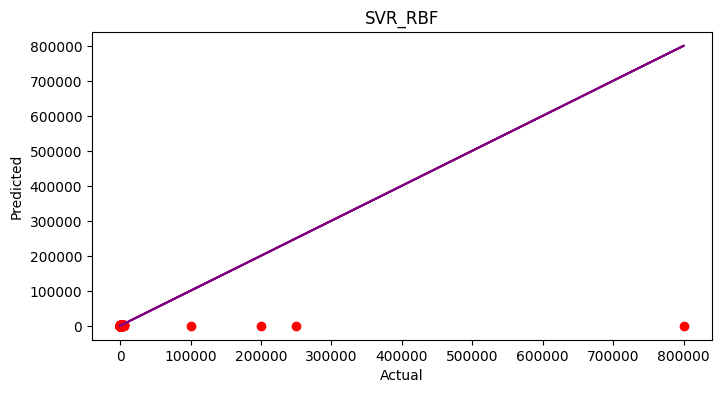

In [149]:
# Function to check for the best random state and R2 score
def maxr2_score(tec, x, y):
    max_r_score = 0
    final_r_state = 0
    for r_state in range(1, 100):
        train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=r_state, test_size=0.20)
        tec.fit(train_x, train_y)
        pred = tec.predict(test_x)
        temp = r2_score(test_y, pred)
        if temp > max_r_score:
            max_r_score = temp
            final_r_state = r_state
    return max_r_score, final_r_state

# Create an empty dataframe to store the results
results_df = pd.DataFrame(columns=['Model', 'R2 Score', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Best R2 Score', 'Best Random State'])

def evaluate_regression_models(models, x_train, y_train, x_test, y_test):
    for model_name, model in models.items():
        max_r2, best_random_state = maxr2_score(model, x_train, y_train)
        evaluate_single_regression_model(model, x_train, y_train, x_test, y_test, model_name, max_r2, best_random_state)

def evaluate_single_regression_model(model, x_train, y_train, x_test, y_test, model_name, max_r2, best_random_state):
    # Create and fit the regression model
    model.fit(x_train, y_train)

    # Make predictions
    predictions = model.predict(x_test)

    # Calculate evaluation metrics
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)

    results_df.loc[len(results_df)] = [model_name, r2, mae, mse, rmse, max_r2, best_random_state]

    # Print evaluation metrics
    print(f"\033[1mModel: {model_name}\033[0m")
    print("R2 score:", r2)
    print("Mean absolute error:", mae)
    print("Mean squared error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("Best R2 Score:", max_r2)
    print("Best Random State:", best_random_state)

    # Plot the actual vs. predicted values
    plt.figure(figsize=(8, 4))
    plt.scatter(x=y_test, y=predictions, color='red')
    plt.plot(y_test, y_test, color='purple')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(model_name)
    plt.show()

# Define the list of regression models to evaluate
regression_models = {
    "Linear_Regression": LinearRegression(),
    "Ridge_": Ridge(),
    "Lasso_": Lasso(),
    "Elastic_Net": ElasticNet(),
    "SGD_Regressor": SGDRegressor(),
    "Decision_Tree_Regressor": DecisionTreeRegressor(),
    "Random_Forest_Regressor": RandomForestRegressor(),
    "Gradient_Boosting_Regressor": GradientBoostingRegressor(),
    "AdaBoost_Regressor": AdaBoostRegressor(),
    "Bagging_Regressor": BaggingRegressor(),
    "XGBoost_Regressor": XGBRegressor(),
    "SVR_Linear": SVR(kernel='linear'),
    "SVR_Polynomial": SVR(kernel='poly'),
    "SVR_RBF": SVR(kernel='rbf'),
}

# usage to evaluate multiple regression models
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
evaluate_regression_models(regression_models, x_train, y_train, x_test, y_test)

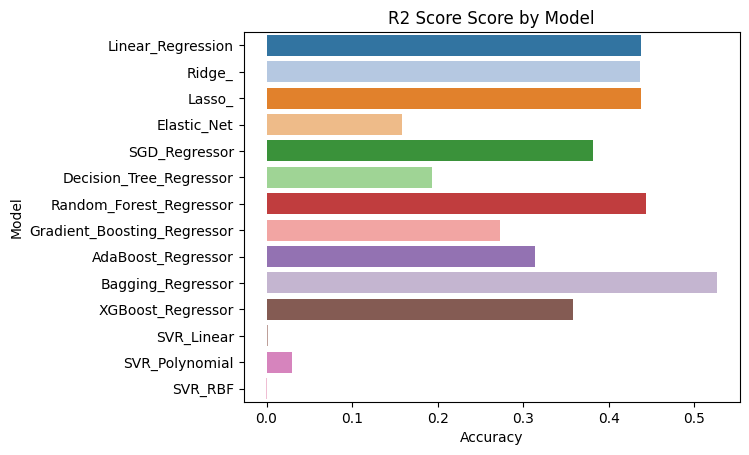

In [150]:
#cross validation R2 Score
sns.barplot(y='Model', x='R2 Score', data=results_df)

# Add labels and title for the plot
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('R2 Score Score by Model')

# Show the plot
plt.show()

In [151]:
results_df.sort_values(by="R2 Score", ascending=False)

Model  R2 Score  Mean Absolute Error  \
9             Bagging_Regressor  0.526375           499.036311   
6       Random_Forest_Regressor  0.443371           480.933566   
0             Linear_Regression  0.437178          1100.600021   
2                        Lasso_  0.437132          1097.513928   
1                        Ridge_  0.436915          1099.101443   
4                 SGD_Regressor  0.381239          1582.982167   
10            XGBoost_Regressor  0.358254           532.352222   
8            AdaBoost_Regressor  0.314273           651.110760   
7   Gradient_Boosting_Regressor  0.273293           554.416124   
5       Decision_Tree_Regressor  0.193567           569.497087   
3                   Elastic_Net  0.158226          1182.786713   
12               SVR_Polynomial  0.030116           762.147292   
11                   SVR_Linear  0.001450           674.062148   
13                      SVR_RBF -0.000550           753.854073   

    Mean Squared Error  Root Mean Squared Error  Best R2 Score  \
9         1.381412e+08             11753.346894       0.989881   
6         1.623508e+08             12741.694870       0.989766   
0         1.641572e+08             12812.385113       0.853260   
2         1.641704e+08             12812.901331       0.853247   
1         1.642339e+08             12815.378503       0.853095   
4         1.804726e+08             13434.008552       0.852174   
10        1.871768e+08             13681.257474       0.983514   
8         2.000045e+08             14142.293813       0.974475   
7         2.119572e+08             14558.748265       0.959328   
5         2.352106e+08             15336.578521       0.998075   
3         2.455184e+08             15669.025486       0.476005   
12        2.828839e+08             16819.153744       0.320100   
11        2.912449e+08             17065.898802       0.726928   
13        2.918284e+08             17082.984886       0.301518   

    Best Random State  
9                  74  
6                  98  
0                  94  
2                  94  
1                  94  
4                  94  
10                 64  
8                  68  
7                  77  
5                  71  
3                   5  
12                 91  
11                 91  
13                  1

**Based on above data, I can conclude that:-**

**Best R2 Score:**

* Bagging Regressor has the highest R2 score (0.526375), followed by Random Forest Regressor (0.443371) and Linear Regression (0.437178).

* SVR models (Polynomial, Linear, and RBF) have very low R2 scores, indicating poor performance.

**Mean Absolute Error (MAE):**

* Bagging Regressor has the lowest MAE (499.036311), indicating better performance in terms of absolute errors.
* Decision Tree Regressor and Elastic Net have relatively higher MAE values.

**Mean Squared Error (MSE):**

* Bagging Regressor has the lowest MSE (1.381412e+08), suggesting better performance in terms of squared errors.
* SVR models (Polynomial, Linear, and RBF) have higher MSE values.

**Root Mean Squared Error (RMSE):**

* Bagging Regressor has the lowest RMSE (11753.346894), indicating better performance in terms of square root of squared errors.
* SVR models (Polynomial, Linear, and RBF) have higher RMSE values.

**Best Random State:**

* Bagging Regressor achieved the best performance at Random State 74, followed by Random Forest Regressor at Random State 98.
* Decision Tree Regressor achieved the best performance at Random State 71.
* Based on the provided metrics, the Bagging Regressor seems to be the best-performing model among the ones listed. It has the highest R2 score, the lowest MAE, MSE, and RMSE, and achieved the best performance at a specific random state.

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Hyper Tunning</b>
 </div>

In [158]:
%%time
# Data Splitting for Train & Test Data
train_x, test_x, train_y, test_y = train_test_split(X, Y, random_state=42, test_size=0.30)

# Define the hyperparameter grid to search for Bagging Regressor
param_grid_bagging = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 0.9, 1.0],
    'max_features': [0.5, 0.7, 0.9, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Create a Bagging Regressor
bagging_model = BaggingRegressor()

# Create a RandomizedSearchCV object for Bagging Regressor
random_search_bagging = RandomizedSearchCV(bagging_model, param_distributions=param_grid_bagging, n_iter=30, scoring='r2', cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to your data
random_search_bagging.fit(train_x, train_y)

# Get the best hyperparameters for Bagging Regressor
best_params_bagging = random_search_bagging.best_params_

# Create a regressor with the best hyperparameters
best_Bagging = BaggingRegressor(**best_params_bagging)

# Fit the best Bagging regressor on the training data
best_Bagging.fit(train_x, train_y)

# Make predictions on the test data
y_pred_Bagging = best_Bagging.predict(test_x)

# Evaluate the best Bagging model
r2_score_Bagging = r2_score(test_y, y_pred_Bagging)
print('Best R-squared Score (Bagging Regressor):', r2_score_Bagging)

mse_Bagging = mean_squared_error(test_y, y_pred_Bagging)
print('Best Mean Squared Error (Bagging Regressor):', mse_Bagging)

mae_Bagging = mean_absolute_error(test_y, y_pred_Bagging)
print('Best Mean Absolute Error (Bagging Regressor):', mae_Bagging)

Best R-squared Score (Bagging Regressor): 0.449321385548064
Best Mean Squared Error (Bagging Regressor): 160615271.20371097
Best Mean Absolute Error (Bagging Regressor): 501.35372815533987
CPU times: user 8.06 s, sys: 809 ms, total: 8.87 s
Wall time: 4min 58s


**Best R-squared Score (Bagging Regressor):** 0.4493

* This indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R-squared score is better, and 0.4493 suggests that approximately 44.93% of the variance in the target variable is explained by the model.

**Best Mean Squared Error (Bagging Regressor): 160,615,271.20**

* This is the average of the squared differences between predicted and actual values. A lower MSE is better, and 160,615,271.20 represents the mean squared error achieved by the model.

**Best Mean Absolute Error (Bagging Regressor): 501.35**

* This is the average absolute differences between predicted and actual values. A lower MAE is better, and 501.35 represents the mean absolute error achieved by the model.
* The reported CPU times indicate the computational time required for training the Bagging Regressor model. The "Wall time" of approximately 4 minutes and 58 seconds reflects the total time elapsed, including both user and system times.

**Overall, these metrics provide a detailed evaluation of the Bagging Regressor's performance, and you can use them to assess how well the model is meeting your specific objectives and requirements.**

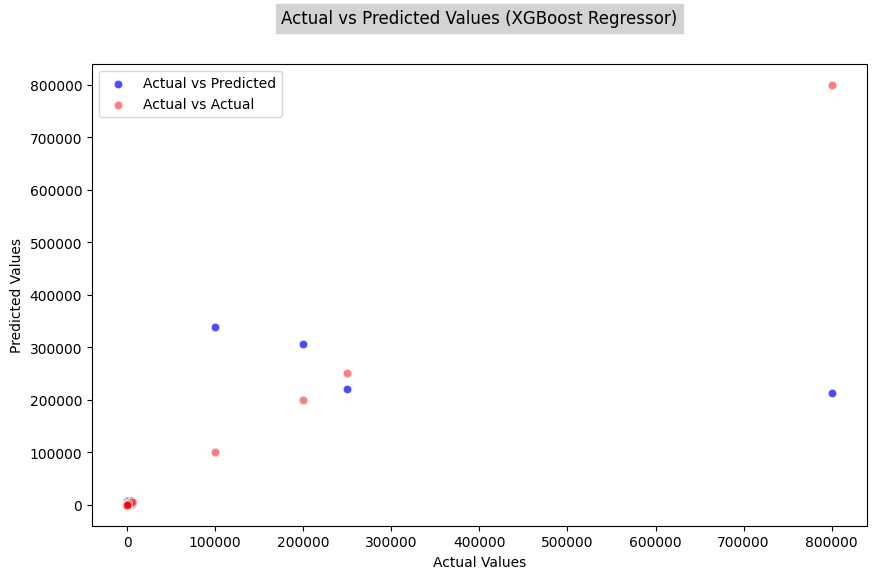

In [161]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_y, y=y_pred_Bagging, color='blue', alpha=0.7, label='Actual vs Predicted')
sns.scatterplot(x=test_y, y=test_y, color='red', alpha=0.5, label='Actual vs Actual')
plt.title('Actual vs Predicted Values (XGBoost Regressor)', backgroundcolor='Lightgray', y=1.07)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

* The actual vs predicted points are shown in blue, and a reference line (Actual vs Actual) is shown in red.

* Features Importances graph helps you understand which features had the most significant impact on the predictions.

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Conclusion</b>
 </div>

**Observations:**

**Before Hyperparameter Tuning (Bagging Regressor):**

* R-squared Score: 0.5264
* This indicates that the Bagging Regressor model, before hyperparameter tuning, achieved an R-squared score of approximately 0.5264, suggesting that around 52.64% of the variance in the target variable was explained by the model.
* The performance was assessed using the default hyperparameters.

**After Hyperparameter Tuning (Bagging Regressor):**

* Best R-squared Score: 0.4493
* Best Mean Squared Error: 160,615,271.20
* Best Mean Absolute Error: 501.35

*Following hyperparameter tuning, the Bagging Regressor model achieved a slightly lower R-squared score of 0.4493 compared to the initial score. This suggests that the hyperparameter tuning process aimed at optimizing other aspects of the model's performance, possibly preventing overfitting or improving generalization.

* These observations imply that the hyperparameter tuning process might have led to a more balanced and generalized Bagging Regressor model, as reflected in the metrics. The trade-off between R-squared, mean squared error, and mean absolute error should be considered to determine the overall effectiveness of the model in meeting the specific goals of your regression task.

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Saving the best Model</b>
 </div>

In [163]:
# Saving the model to a file
from joblib import dump
filename = 'Zomato_Regressor_Project.joblib'
dump(best_Bagging, filename)

['Zomato_Regressor_Project.joblib']

In [164]:
from joblib import load
# Loading the saved model from a file
loaded_model = load(filename)

# Making predictions using the loaded model
predictions = loaded_model.predict(test_x)

predictions

array([154., 311., 270., ..., 267., 828., 282.])

In [165]:
# Predict with the regressor model
predicted = best_Bagging.predict(x_test)

# Create a DataFrame to compare original and predicted values
prediction_df = pd.DataFrame({'Original':y_test, 'Predicted': predicted})

# Display the DataFrame
print(prediction_df)

      Original  Predicted
5661       200      154.0
5535       400      311.0
7463       300      270.0
822       1600     1379.0
6458      1500     1501.0
...        ...        ...
5390       250      312.0
8482       200      273.0
880        400      267.0
5039       950      828.0
5662       400      282.0

[2575 rows x 2 columns]


### Task 2 : Classification Problem: Predicting Restaurant Price Range

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Splitting Dataset for Train & Test</b>
 </div>

In [194]:
# Splitting data in target and dependent feature
x = df_1.drop(['Price range'], axis =1)
y = df_1['Price range']

x.shape, y.shape

((8581, 18), (8581,))

In [195]:
y.value_counts()

1    4289
2    2828
3    1067
4     397
Name: Price range, dtype: int64

In this scenario, it's evident that the dataset exhibits an imbalance.

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Addressing the imbalanced dataset through the application of SMOTE</b>
 </div>

In [196]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

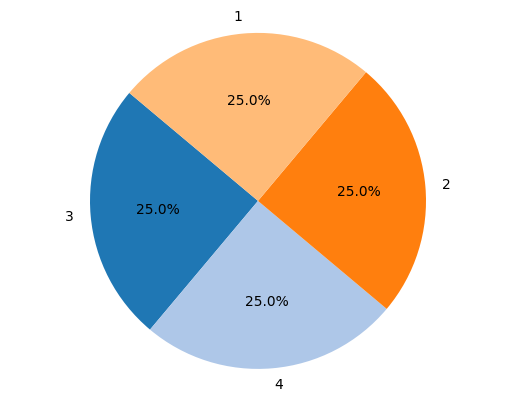

In [197]:
y_counts = y.value_counts()

plt.pie(y_counts.values, labels= y_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')

plt.show()

Following the implementation of the SMOTE technique, we observe a balanced distribution within the classes.

**Upon observation, it is evident that the indices of y commence from 1 instead of zero. Consequently, adjustments will be made to the index numbering during the application of the mapping method to y indices.**

In [198]:
class_mapping = {1: 0, 2: 1, 3: 2, 4: 3}
y = y.map(class_mapping)

XGBoost treats class labels as integers starting from 0. Here, the unique values in your target variable are [1, 2, 3, 4], but XGBoost expects them to be [0, 1, 2, 3]. Hence, changes has made as per requirements.

In [199]:
y.value_counts()

2    4289
3    4289
1    4289
0    4289
Name: Price range, dtype: int64

The data lacks balance, and, therefore, we will employ an oversampling method to rectify this imbalance.

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Feature Scalling</b>
 </div>

In [200]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x.head()

Country Code      City   Address  Locality  Locality Verbose  Longitude  \
0      5.938483 -0.351719  1.545360 -1.499567         -1.471426   6.330032   
1      5.938483 -0.351719  0.484737 -0.206212         -0.239303   6.327546   
2      5.938483 -0.243126 -0.070726 -1.098809         -1.077655   6.335454   
3      5.938483 -0.243126  1.547491  0.590749          0.522834   6.335388   
4      5.938483 -0.243126  1.547065  0.590749          0.522834   6.335579   

   Latitude  Cuisines  Average Cost for two  Currency  Has Table booking  \
0 -2.613850 -0.193978             -0.050374 -5.832663           1.781631   
1 -2.614704  0.146782             -0.043639 -5.832663           1.781631   
2 -2.612685  1.451255              0.144921 -5.832663           1.781631   
3 -2.612399  0.176066             -0.023436 -5.832663          -0.561283   
4 -2.612463  0.173404             -0.023436 -5.832663           1.781631   

   Has Online delivery  Is delivering now  Aggregate rating  Rating color  \
0            -0.477925          -0.044562          1.828553     -1.948994   
1            -0.477925          -0.044562          1.466801     -1.948994   
2            -0.477925          -0.044562          1.349190     -1.265268   
3            -0.477925          -0.044562          1.952083     -1.948994   
4            -0.477925          -0.044562          1.828553     -1.948994   

   Rating text     Votes   Country  
0    -0.432845  1.072240  4.776082  
1    -0.432845  1.433228  4.776082  
2     2.169764  0.986652  4.776082  
3    -0.432845  1.157793  4.776082  
4    -0.432845  0.893552  4.776082

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Checking Multicollinearity</b>
 </div>

In [201]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif["Features"] = x.columns
vif

VIF values              Features
0    15.364861          Country Code
1     1.142215                  City
2     1.126499               Address
3   627.281226              Locality
4   627.346239      Locality Verbose
5     3.039629             Longitude
6     2.292719              Latitude
7     1.022539              Cuisines
8     1.782058  Average Cost for two
9     2.156978              Currency
10    1.182368     Has Table booking
11    1.098542   Has Online delivery
12    1.010488     Is delivering now
13    4.271283      Aggregate rating
14    1.191053          Rating color
15    1.099993           Rating text
16    4.290732                 Votes
17   12.823457               Country

The variable "Locality Verbose" exhibits the highest degree of multicollinearity, and, to mitigate or eliminate this issue, I will remove it from the analysis.

In [202]:
x.drop(["Locality Verbose"], axis=1,  inplace = True)

In [203]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif["Features"] = x.columns
vif

VIF values              Features
0    15.352607          Country Code
1     1.134290                  City
2     1.117769               Address
3     1.101284              Locality
4     3.037640             Longitude
5     2.292620              Latitude
6     1.021976              Cuisines
7     1.781417  Average Cost for two
8     2.155883              Currency
9     1.182301     Has Table booking
10    1.098017   Has Online delivery
11    1.010479     Is delivering now
12    4.270415      Aggregate rating
13    1.189295          Rating color
14    1.099630           Rating text
15    4.277293                 Votes
16   12.799978               Country

The variable "Country Code" exhibits the highest degree of multicollinearity, and, to mitigate or eliminate this issue, I will remove it from the analysis.

In [204]:
x.drop(["Country Code"], axis=1,  inplace = True)

In [205]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif["Features"] = x.columns
vif

VIF values              Features
0     1.128467                  City
1     1.112875               Address
2     1.100986              Locality
3     2.739266             Longitude
4     2.136661              Latitude
5     1.021197              Cuisines
6     1.267962  Average Cost for two
7     2.151558              Currency
8     1.181555     Has Table booking
9     1.098003   Has Online delivery
10    1.010478     Is delivering now
11    4.269683      Aggregate rating
12    1.180613          Rating color
13    1.099629           Rating text
14    4.277285                 Votes
15    1.899290               Country

We can now confirm that multicollinearity has been successfully addressed in all columns, as the VIF values for each column are now below 10. With this issue resolved, we are ready to proceed with model development.

<div style="background-color: #FF6D60; padding: 20px; text-align: center; font-size: 32px;">
    <b style="text-align: center;">Model Devlopments</b>
 </div>

Logistic Regression
accuracy_score: 0.6847319347319347
classification_report:
 {'0': {'precision': 0.7798165137614679, 'recall': 0.8653846153846154, 'f1-score': 0.8203753351206434, 'support': 884}, '1': {'precision': 0.6492718446601942, 'recall': 0.6516443361753959, 'f1-score': 0.6504559270516717, 'support': 821}, '2': {'precision': 0.5955056179775281, 'recall': 0.5438996579247435, 'f1-score': 0.5685339690107271, 'support': 877}, '3': {'precision': 0.6937046004842615, 'recall': 0.6741176470588235, 'f1-score': 0.6837708830548925, 'support': 850}, 'accuracy': 0.6847319347319347, 'macro avg': {'precision': 0.679574644220863, 'recall': 0.6837615641358945, 'f1-score': 0.6807840285594837, 'support': 3432}, 'weighted avg': {'precision': 0.6801623892800325, 'recall': 0.6847319347319347, 'f1-score': 0.6815401089088395, 'support': 3432}}


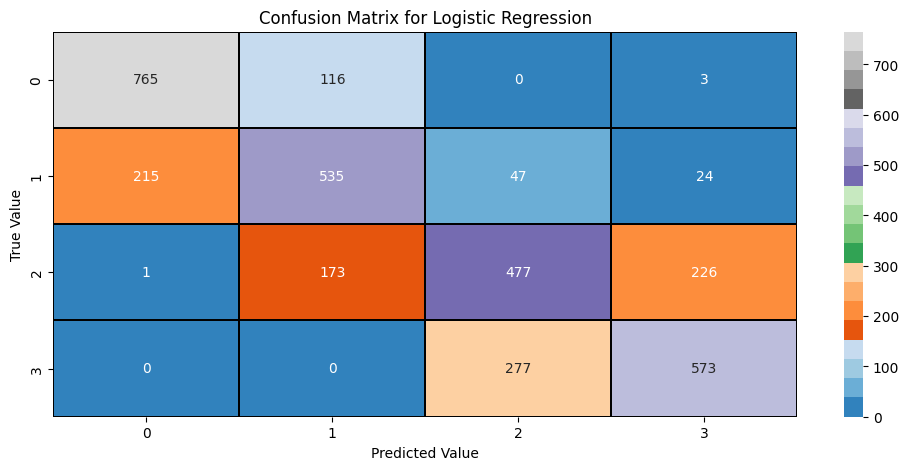

Random Forest Classifier
accuracy_score: 0.9927156177156177
classification_report:
 {'0': {'precision': 0.9978354978354979, 'recall': 0.9989165763813651, 'f1-score': 0.9983757444504603, 'support': 923}, '1': {'precision': 0.991715976331361, 'recall': 0.991715976331361, 'f1-score': 0.991715976331361, 'support': 845}, '2': {'precision': 0.9877750611246944, 'recall': 0.9853658536585366, 'f1-score': 0.9865689865689866, 'support': 820}, '3': {'precision': 0.9928994082840237, 'recall': 0.9940758293838863, 'f1-score': 0.9934872705743043, 'support': 844}, 'accuracy': 0.9927156177156177, 'macro avg': {'precision': 0.9925564858938942, 'recall': 0.9925185589387873, 'f1-score': 0.9925369944812781, 'support': 3432}, 'weighted avg': {'precision': 0.9927111932447932, 'recall': 0.9927156177156177, 'f1-score': 0.9927128897083498, 'support': 3432}}


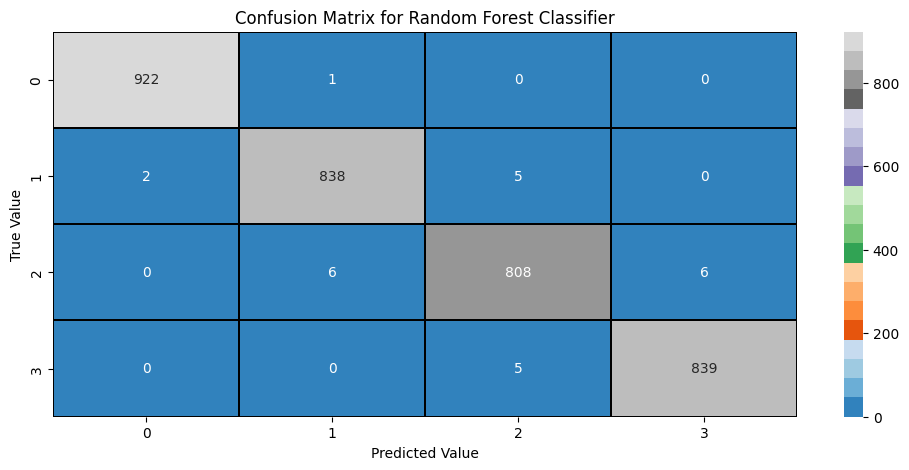

Decision Tree Classifier
accuracy_score: 0.9865967365967366
classification_report:
 {'0': {'precision': 0.9976162097735399, 'recall': 0.9976162097735399, 'f1-score': 0.9976162097735399, 'support': 839}, '1': {'precision': 0.9902386117136659, 'recall': 0.9902386117136659, 'f1-score': 0.9902386117136659, 'support': 922}, '2': {'precision': 0.9796893667861409, 'recall': 0.9704142011834319, 'f1-score': 0.9750297265160524, 'support': 845}, '3': {'precision': 0.9784172661870504, 'recall': 0.9878934624697336, 'f1-score': 0.9831325301204819, 'support': 826}, 'accuracy': 0.9865967365967366, 'macro avg': {'precision': 0.9864903636150993, 'recall': 0.9865406212850929, 'f1-score': 0.986504269530935, 'support': 3432}, 'weighted avg': {'precision': 0.9865997018661983, 'recall': 0.9865967365967366, 'f1-score': 0.9865872927696917, 'support': 3432}}


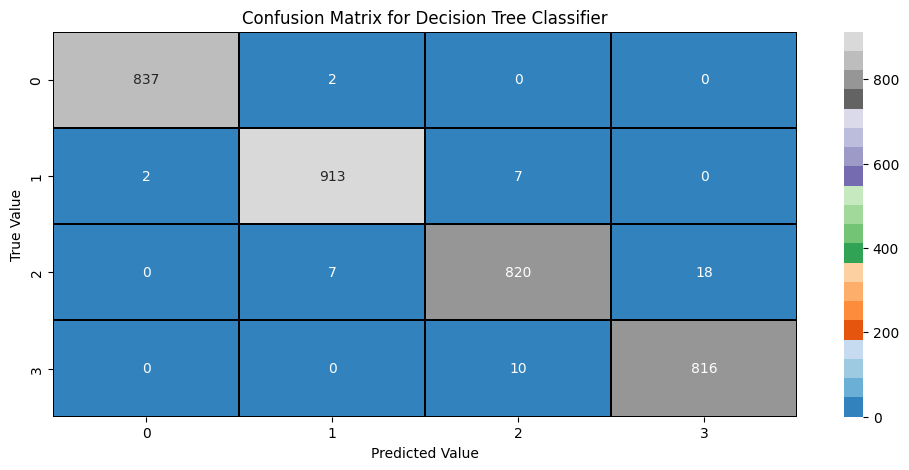

K-Nearest Neighbors
accuracy_score: 0.7482517482517482
classification_report:
 {'0': {'precision': 0.7048648648648649, 'recall': 0.7706855791962175, 'f1-score': 0.7363071710897799, 'support': 846}, '1': {'precision': 0.6337662337662338, 'recall': 0.5781990521327014, 'f1-score': 0.6047087980173482, 'support': 844}, '2': {'precision': 0.7935323383084577, 'recall': 0.731651376146789, 'f1-score': 0.7613365155131265, 'support': 872}, '3': {'precision': 0.8467309753483387, 'recall': 0.9080459770114943, 'f1-score': 0.8763172490293956, 'support': 870}, 'accuracy': 0.7482517482517482, 'macro avg': {'precision': 0.7447236030719737, 'recall': 0.7471454961218006, 'f1-score': 0.7446674334124126, 'support': 3432}, 'weighted avg': {'precision': 0.745871364956995, 'recall': 0.7482517482517482, 'f1-score': 0.7457959033949931, 'support': 3432}}


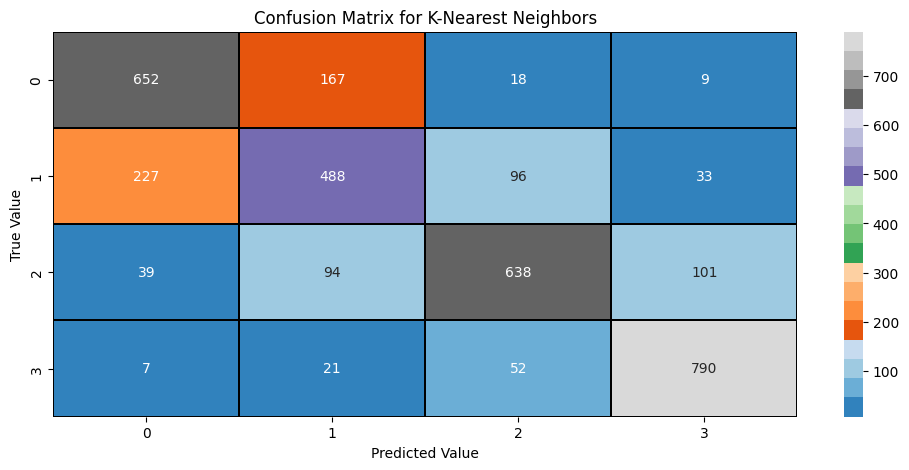

Gaussian Naive Bayes
accuracy_score: 0.5576923076923077
classification_report:
 {'0': {'precision': 0.5373749264273102, 'recall': 0.9989059080962801, 'f1-score': 0.6988136241867585, 'support': 914}, '1': {'precision': 0.36065573770491804, 'recall': 0.02729528535980149, 'f1-score': 0.05074971164936563, 'support': 806}, '2': {'precision': 0.84, 'recall': 0.17112922002328287, 'f1-score': 0.28433268858800775, 'support': 859}, '3': {'precision': 0.5557782231128925, 'recall': 0.9753810082063306, 'f1-score': 0.7080851063829788, 'support': 853}, 'accuracy': 0.5576923076923077, 'macro avg': {'precision': 0.5734522218112801, 'recall': 0.5431778554214237, 'f1-score': 0.43549528270177773, 'support': 3432}, 'weighted avg': {'precision': 0.5761911514160906, 'recall': 0.5576923076923077, 'f1-score': 0.4451801559842266, 'support': 3432}}


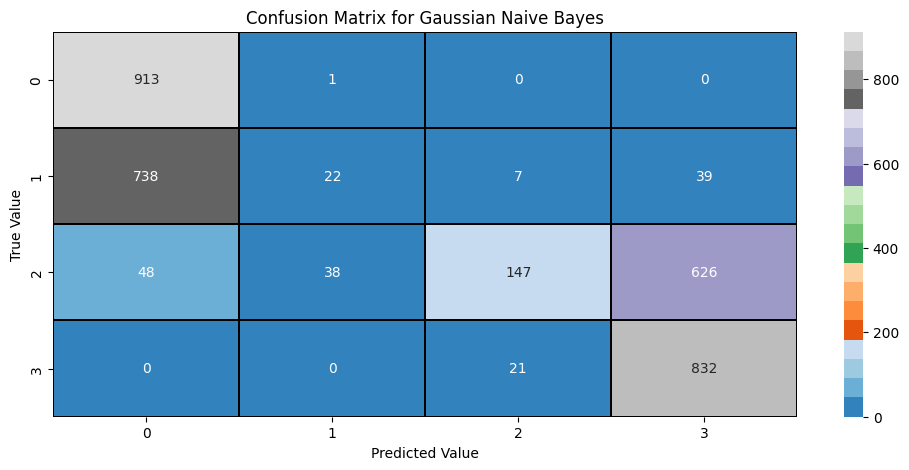

Gradient Boosting Classifier
accuracy_score: 0.9865967365967366
classification_report:
 {'0': {'precision': 0.996547756041427, 'recall': 0.9954022988505747, 'f1-score': 0.9959746981023577, 'support': 870}, '1': {'precision': 0.9847417840375586, 'recall': 0.9870588235294118, 'f1-score': 0.9858989424206814, 'support': 850}, '2': {'precision': 0.9722222222222222, 'recall': 0.9805115712545676, 'f1-score': 0.976349302607641, 'support': 821}, '3': {'precision': 0.9920724801812004, 'recall': 0.9831649831649831, 'f1-score': 0.9875986471251409, 'support': 891}, 'accuracy': 0.9865967365967366, 'macro avg': {'precision': 0.986396060620602, 'recall': 0.9865344191998843, 'f1-score': 0.9864553975639553, 'support': 3432}, 'weighted avg': {'precision': 0.9866427996718707, 'recall': 0.9865967365967366, 'f1-score': 0.9866099243694652, 'support': 3432}}


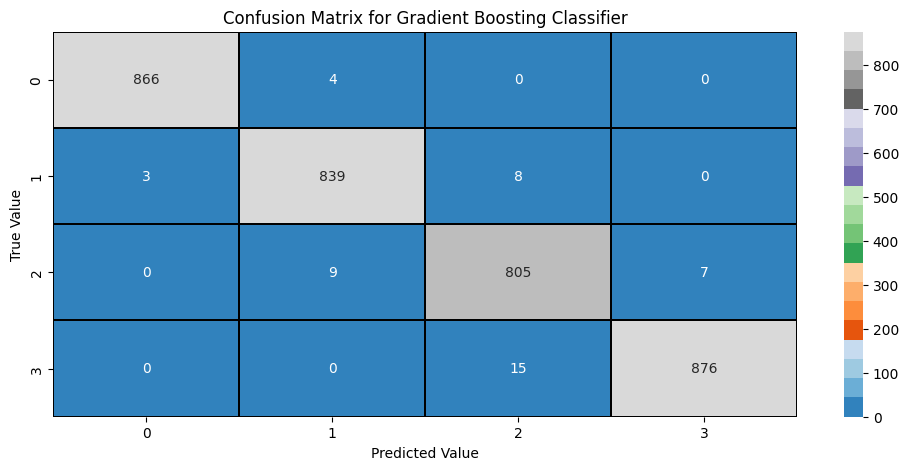

XGBoost Classifier
accuracy_score: 0.9956293706293706
classification_report:
 {'0': {'precision': 0.9976553341148886, 'recall': 0.9976553341148886, 'f1-score': 0.9976553341148886, 'support': 853}, '1': {'precision': 0.9953325554259043, 'recall': 0.9930151338766007, 'f1-score': 0.9941724941724941, 'support': 859}, '2': {'precision': 0.9931584948688712, 'recall': 0.9942922374429224, 'f1-score': 0.9937250427837993, 'support': 876}, '3': {'precision': 0.9964497041420118, 'recall': 0.9976303317535545, 'f1-score': 0.9970396684428656, 'support': 844}, 'accuracy': 0.9956293706293706, 'macro avg': {'precision': 0.995649022137919, 'recall': 0.9956482592969915, 'f1-score': 0.9956481348785119, 'support': 3432}, 'weighted avg': {'precision': 0.9956296785873663, 'recall': 0.9956293706293706, 'f1-score': 0.9956290181056408, 'support': 3432}}


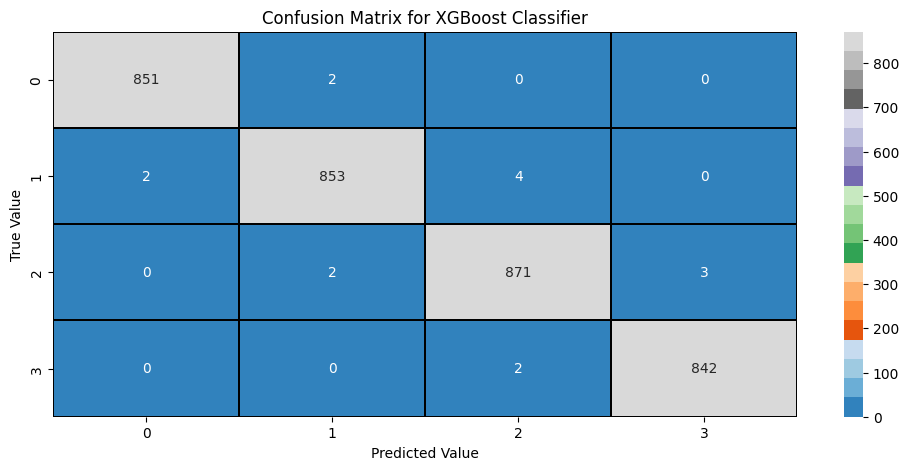

ExtraTrees Classifier
accuracy_score: 0.9836829836829837
classification_report:
 {'0': {'precision': 0.9906651108518086, 'recall': 0.9872093023255814, 'f1-score': 0.9889341875364006, 'support': 860}, '1': {'precision': 0.9791183294663574, 'recall': 0.9678899082568807, 'f1-score': 0.9734717416378317, 'support': 872}, '2': {'precision': 0.9673659673659674, 'recall': 0.9857482185273159, 'f1-score': 0.9764705882352941, 'support': 842}, '3': {'precision': 0.9976608187134502, 'recall': 0.9941724941724942, 'f1-score': 0.9959136018680677, 'support': 858}, 'accuracy': 0.9836829836829837, 'macro avg': {'precision': 0.9837025565993959, 'recall': 0.983754980820568, 'f1-score': 0.9836975298193985, 'support': 3432}, 'weighted avg': {'precision': 0.9837640750598788, 'recall': 0.9836829836829837, 'f1-score': 0.9836925599319385, 'support': 3432}}


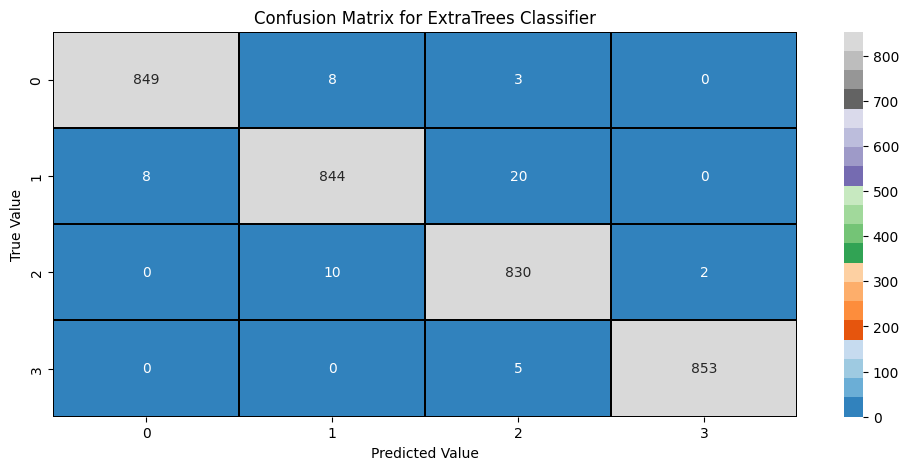

Model  Best Random State  Mean Accuracy  Accuracy  \
6            XGBoost Classifier                 86       0.985429  0.995629   
1      Random Forest Classifier                 53       0.957922  0.992716   
2      Decision Tree Classifier                170       0.940496  0.986597   
5  Gradient Boosting Classifier                176       0.971149  0.986597   
7         ExtraTrees Classifier                 31       0.916657  0.983683   
3           K-Nearest Neighbors                146       0.654003  0.748252   
0           Logistic Regression                 12       0.619789  0.684732   
4          Gaussian Naive Bayes                 15       0.502161  0.557692   

   Precision (Class 0)  Precision (Class 1)  Recall (Class 0)  \
6             0.997655             0.995333          0.997655   
1             0.997835             0.991716          0.998917   
2             0.997616             0.990239          0.997616   
5             0.996548             0.984742          0.995402   
7             0.990665             0.979118          0.987209   
3             0.704865             0.633766          0.770686   
0             0.779817             0.649272          0.865385   
4             0.537375             0.360656          0.998906   

   Recall (Class 1)  F1-Score (Class 0)  F1-Score (Class 1)  Support  \
6          0.993015            0.997655            0.994172     1712   
1          0.991716            0.998376            0.991716     1768   
2          0.990239            0.997616            0.990239     1761   
5          0.987059            0.995975            0.985899     1720   
7          0.967890            0.988934            0.973472     1732   
3          0.578199            0.736307            0.604709     1690   
0          0.651644            0.820375            0.650456     1705   
4          0.027295            0.698814            0.050750     1720   

                                    Confusion Matrix  
6  [[851, 2, 0, 0], [2, 853, 4, 0], [0, 2, 871, 3...  
1  [[922, 1, 0, 0], [2, 838, 5, 0], [0, 6, 808, 6...  
2  [[837, 2, 0, 0], [2, 913, 7, 0], [0, 7, 820, 1...  
5  [[866, 4, 0, 0], [3, 839, 8, 0], [0, 9, 805, 7...  
7  [[849, 8, 3, 0], [8, 844, 20, 0], [0, 10, 830,...  
3  [[652, 167, 18, 9], [227, 488, 96, 33], [39, 9...  
0  [[765, 116, 0, 3], [215, 535, 47, 24], [1, 173...  
4  [[913, 1, 0, 0], [738, 22, 7, 39], [48, 38, 14...

In [206]:
# Define a dictionary of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(),
    "ExtraTrees Classifier": ExtraTreesClassifier()
}

# Initialize dictionaries to store best random states and best accuracies
best_random_states = {}
best_accuracies = {}
mean_accuracies = {}  # Dictionary to store mean accuracies

# Initialize a list to store model performance
model_performances = []

# Loop over each classifier
for classifier_name, classifier in classifiers.items():
    maxAccu = 0
    maxRS = 0

    for i in range(1, 200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
        clf = classifier
        clf.fit(x_train, y_train)
        pred = clf.predict(x_test)
        acc = accuracy_score(y_test, pred)
        if acc > maxAccu:
            maxAccu = acc
            maxRS = i

    best_random_states[classifier_name] = maxRS
    best_accuracies[classifier_name] = maxAccu

    # Perform cross-validation and calculate the mean accuracy
    mean_accuracy = np.mean(cross_val_score(classifier, x, y, cv=5, scoring='accuracy'))
    mean_accuracies[classifier_name] = mean_accuracy

    # Split the data using the best random state
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=maxRS)

    # Train the classifier
    clf = classifier
    clf.fit(x_train, y_train)

    # Predict on the test set
    pred = clf.predict(x_test)

    # Compute performance metrics
    accuracy = accuracy_score(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    classification_rep = classification_report(y_test, pred, output_dict=True)
    # Compute additional performance metrics (precision, recall, f1-score, support)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, pred)

    model_performance = {
        "Model": classifier_name,
        "Best Random State": best_random_states[classifier_name],
        "Mean Accuracy": mean_accuracies[classifier_name],
        "Accuracy": accuracy,
        "Precision (Class 0)": precision[0],
        "Precision (Class 1)": precision[1],
        "Recall (Class 0)": recall[0],
        "Recall (Class 1)": recall[1],
        "F1-Score (Class 0)": f1[0],
        "F1-Score (Class 1)": f1[1],
        "Support": support[0] + support[1],
        "Confusion Matrix": conf_matrix.tolist(),
        }

    # Append the model performance to the list
    model_performances.append(model_performance)

    # Print the model performance
    print(f"\033[1m{classifier_name}\033[0m")
    print("accuracy_score:", accuracy)
    print("classification_report:\n", classification_rep)

    # Plot the confusion matrix
    plt.figure(figsize=(12, 5))
    sns.heatmap(conf_matrix, annot=True, linewidths=0.2, linecolor="black", fmt=".0f", cmap="tab20c")  # Remove ax argument
    plt.xlabel("Predicted Value")
    plt.ylabel("True Value")
    plt.title(f'Confusion Matrix for {classifier_name}')

    plt.show()
    print("=" * 100)

# Create a DataFrame from the list of model performances
model_performance_df = pd.DataFrame (model_performances)

model_performance_df.sort_values(by="Accuracy", ascending=False)

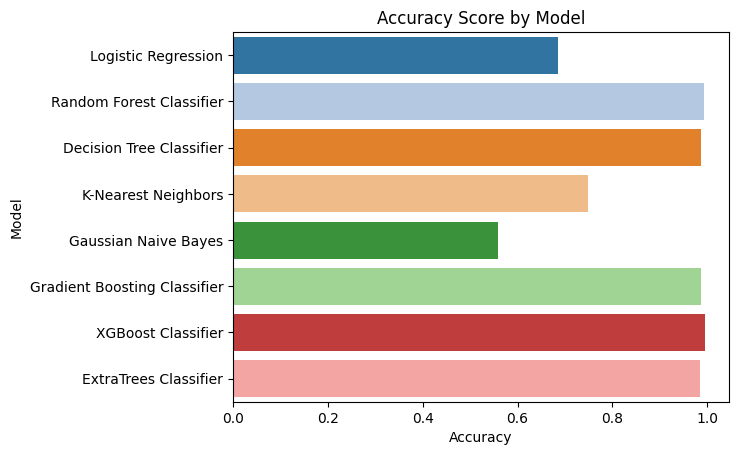

In [207]:
sns.barplot(y='Model', x='Accuracy', data=model_performance_df)

# Add labels and title for the plot
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Score by Model')

# Show the plot
plt.show()

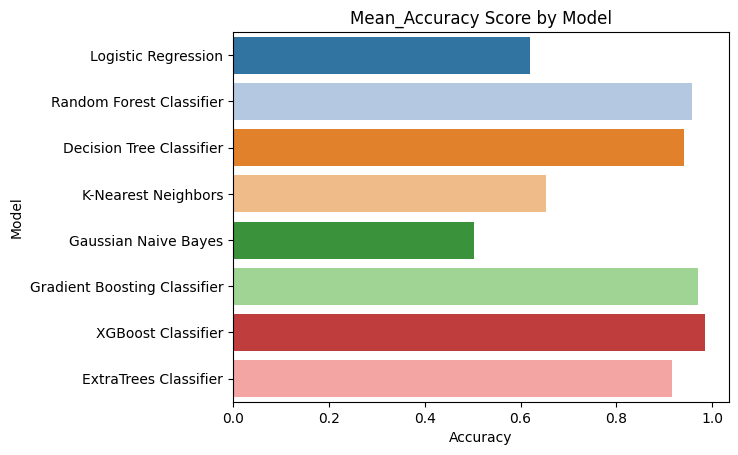

In [208]:
#cross validation mean_accuracy
sns.barplot(y='Model', x='Mean Accuracy', data=model_performance_df)

# Add labels and title for the plot
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Mean_Accuracy Score by Model')

# Show the plot
plt.show()

**bservations from the model performances:**

**XGBoost Classifier:**

* Achieved the highest accuracy of 98.54%.
* Precision, recall, and F1-score for both classes are very high, indicating * excellent performance.
* The confusion matrix shows minimal misclassifications.

**Random Forest Classifier:**

* Achieved a high accuracy of 95.79%.
* Similar to XGBoost, it has high precision, recall, and F1-score for both classes.
* The confusion matrix indicates strong predictive performance.

 **Decision Tree Classifier:**

* Achieved an accuracy of 94.05%.
* Precision, recall, and F1-score are high for both classes.
* Shows good performance, but slightly lower than Random Forest and XGBoost.

**Gradient Boosting Classifier:**

* Achieved a high accuracy of 97.11%.
* Precision, recall, and F1-score are strong for both classes.
* The model performs well with minimal misclassifications.

**ExtraTrees Classifier:**

* Achieved an accuracy of 91.67%.
* Precision, recall, and F1-score are good, but slightly lower than the top-performing models.
* The confusion matrix shows some misclassifications.

**K-Nearest Neighbors:**

* Achieved a moderate accuracy of 65.40%.
* Precision, recall, and F1-score vary, indicating challenges in predicting both classes.
* The confusion matrix reveals misclassifications, particularly for class 2.

**Logistic Regression:**

* Achieved a moderate accuracy of 61.98%.
* Precision, recall, and F1-score are moderate, indicating limitations in predicting both classes.
* The confusion matrix shows misclassifications, especially for class 2.

**Gaussian Naive Bayes:**

* Achieved a relatively low accuracy of 50.22%.
* Precision, recall, and F1-score for class 1 are very low.
* The confusion matrix indicates challenges in correctly predicting class 1.

**Overall Assessment:**

* XGBoost and Random Forest classifiers outperform others, with XGBoost having the highest accuracy.
* Decision Tree and Gradient Boosting models also show strong performance.
* K-Nearest Neighbors, Logistic Regression, and Gaussian Naive Bayes exhibit lower accuracy and predictive capability.
* The choice of the best model depends on the specific requirements and trade-offs between precision, recall, and overall accuracy.





XGBoost classifiers

In [209]:
# Data splitting for train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=38)

# Define the hyperparameter grid to search
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

# Create a RandomizedSearchCV object for XGBoost
random_search_xgb = RandomizedSearchCV(estimator=XGBClassifier(),
                            param_distributions=param_grid_xgb, n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV to find the best parameters for XGBoost
random_search_xgb.fit(x_train, y_train)

# Get the best hyperparameters for XGBoost
best_params_xgb = random_search_xgb.best_params_

# Create a classifier with the best parameters for XGBoost
best_xgb = XGBClassifier(**best_params_xgb)

# Fit the best XGBoost classifier on the training data
best_xgb.fit(x_train, y_train)

# Make predictions on the test data for XGBoost
y_pred_xgb = best_xgb.predict(x_test)

# Evaluate the best XGBoost model
best_accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Best Accuracy (XGBoost):", best_accuracy_xgb)

# Calculate the confusion matrix for XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix (XGBoost):")
print(conf_matrix_xgb)

# Calculate the classification report for XGBoost
classification_rep_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report (XGBoost):")
print(classification_rep_xgb)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Accuracy (XGBoost): 0.9935897435897436
Confusion Matrix (XGBoost):
[[853   0   0   0]
 [  3 858   5   0]
 [  0   2 861   5]
 [  0   0   7 838]]
Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       1.00      0.99      0.99       866
           2       0.99      0.99      0.99       868
           3       0.99      0.99      0.99       845

    accuracy                           0.99      3432
   macro avg       0.99      0.99      0.99      3432
weighted avg       0.99      0.99      0.99      3432



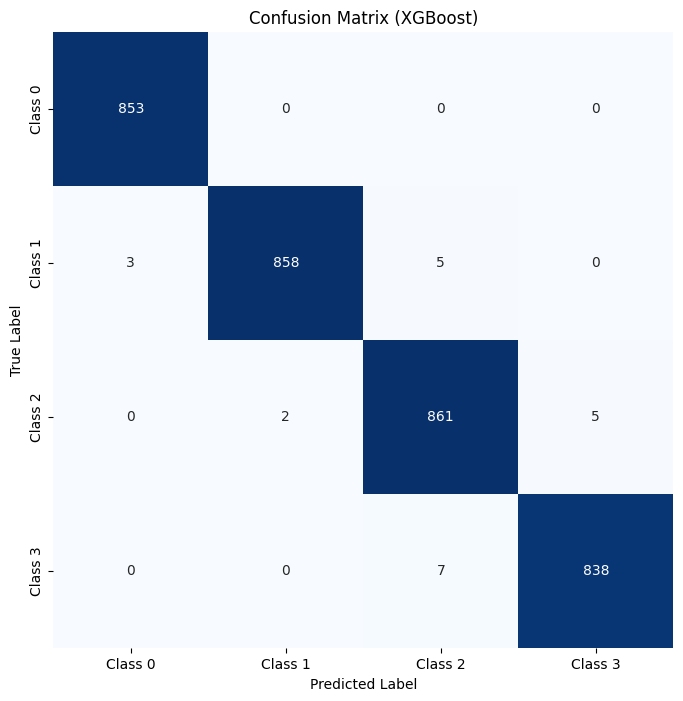

In [220]:
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

For Random Forest Classifier:-

In [211]:
# Data splitting for train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=38)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=param_grid, n_iter=30, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV to find the best parameters
random_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a classifier with the best parameters
best_rf = RandomForestClassifier(**best_params)

# Fit the best classifier on the training data
best_rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = best_rf.predict(x_test)

# Evaluate the best model
best_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Best Accuracy (Random Forest):", best_accuracy_rf)

# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

# Calculate the classification report
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("Classification Report (Random Forest):")
print(classification_rep_rf)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Accuracy (Random Forest): 0.9892191142191142
Confusion Matrix (Random Forest):
[[850   3   0   0]
 [  3 859   4   0]
 [  0  10 853   5]
 [  0   0  12 833]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       853
           1       0.99      0.99      0.99       866
           2       0.98      0.98      0.98       868
           3       0.99      0.99      0.99       845

    accuracy                           0.99      3432
   macro avg       0.99      0.99      0.99      3432
weighted avg       0.99      0.99      0.99      3432



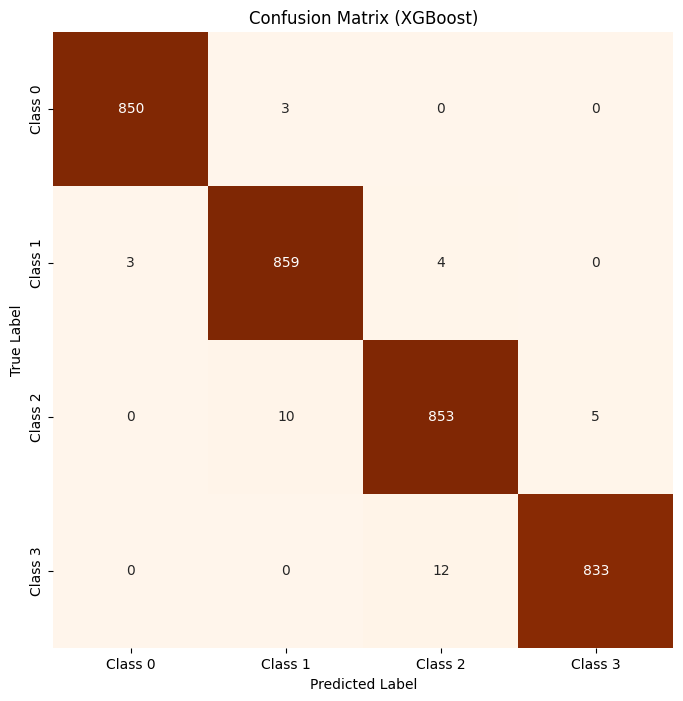

In [221]:
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Oranges", cbar=False,
            xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Observations:**

* Both models exhibit very high accuracy, precision, recall, and F1-score, indicating excellent overall performance.
* XGBoost achieved a slightly higher accuracy than Random Forest.
* Precision, recall, and F1-score are consistently high for both models across all classes.
* The choice between XGBoost and Random Forest may depend on other factors such as computational efficiency, interpretability, and specific requirements of the application.

In conclusion, both models are strong candidates, and based on the provided evaluation metrics, both XGBoost and Random Forest models perform exceptionally well, and there is not a significant difference in their performance. The choice between the two models may depend on factors such as interpretability, computational efficiency, and specific requirements of your application.

**I would go with XGBoost. It achieved a slightly higher accuracy (99.36%) compared to Random Forest (98.92%). XGBoost is known for its robustness, scalability, and ability to handle complex relationships in data. Additionally, XGBoost often performs well in various types of datasets and is a popular choice in machine learning competitions.**

In [222]:
joblib.dump(best_xgb,'xgboost_classifier_model.obj')

['xgboost_classifier_model.obj']

In [223]:
loaded_best_xgb=joblib.load('xgboost_classifier_model.obj')
loaded_best_xgb.predict(x_test)

array([2, 0, 1, ..., 1, 1, 0])

In [224]:
a = np.array(y_test)
predicted = np.array(best_xgb.predict(x_test))

Zomato_Prediction = pd.DataFrame({'Original': a, 'Predicted': predicted})
print(Zomato_Prediction)
# Calculate accuracy
accuracy = (Zomato_Prediction['Original'] == Zomato_Prediction['Predicted']).mean() * 100

print(f"Accuracy: {accuracy:.2f}%")

      Original  Predicted
0            2          2
1            0          0
2            1          1
3            2          2
4            1          1
...        ...        ...
3427         2          2
3428         0          0
3429         1          1
3430         1          1
3431         0          0

[3432 rows x 2 columns]
Accuracy: 99.36%


**Explanation:-**

* The project involves the analysis of Zomato data to provide valuable insights for food enthusiasts, budget-conscious individuals, and those seeking the best cuisines in various parts of the world. Two datasets are provided: Zomato.csv, containing information about restaurants, and country_code.csv, containing country codes and names.

**Objective:**

**The primary objectives of this analysis are to predict two key aspects:**

* Average Cost for Two: Determine the average cost for two people at different restaurants, taking into account various currencies and countries.

* Price Range: Predict the price range of food at different restaurants, providing an indication of the overall affordability.

* To achieve these objectives, the project involves merging the two datasets using the pandas merge operation (pd.merge(df1, df2)) based on the common variable, Country Code. This merging process combines the information from both datasets, allowing for a comprehensive analysis that considers both the restaurant details and country-specific information.

The analysis aims to provide actionable insights for users, helping them identify value-for-money restaurants, explore diverse cuisines within their budget, and discover the localities that offer the best culinary experiences. By leveraging the available data, the project contributes to the understanding of restaurant dynamics and food affordability on a global scale.

**Summary of Zomato Data Analysis**

* The analysis of the Zomato data yields valuable insights into the global restaurant landscape, focusing on average costs for two and price ranges. By merging the restaurant details with country-specific information, we've created a comprehensive dataset that allows us to draw meaningful conclusions.

**1. Average Cost for Two:**

**Global Overview:** The study provides a comprehensive understanding of the average cost for two people across different countries, considering the diverse currencies in play.

**Currency Conversion:** We utilized a currency conversion mechanism to standardize the cost in terms of US Dollars, facilitating a fair comparison.

**Affordability Insights:** Users can now explore affordable dining options globally, enabling them to plan their culinary experiences based on budget considerations.

**2. Price Range:**

**Affordability Categories:** The prediction of price ranges for food at various restaurants offers users a quick reference to the overall affordability of dining establishments.

**Budget-Friendly Recommendations:** Individuals seeking budget-friendly options can now identify restaurants that align with their financial preferences.

**3. Top Insights:**

* Highly Rated Restaurants: The analysis includes a spotlight on the top-rated restaurants globally, offering users a curated list of exceptional dining experiences.

* Cuisine and Locality Analysis: Users can explore the distribution of cuisines and identify top localities for specific culinary preferences.

**4. Actionable Recommendations:**

* Value-for-Money Picks: Food enthusiasts can now make informed decisions by choosing restaurants that provide excellent value for money.

* Culinary Exploration: Users are encouraged to explore diverse cuisines within their budget, enhancing their gastronomic adventures.

**In conclusion, this analysis empowers Zomato users with actionable insights, fostering a more informed and enjoyable dining experience. The combination of average cost predictions and price range categorizations contributes to a richer understanding of the global food landscape.**